In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
print(np.__version__)

# OCR Packages
# The paddleocr whl package will automatically download the ppocr lightweight model(PP-OCRv3) as the default model
from paddleocr import PaddleOCR, draw_ocr

1.19.5


/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/skimage/filters/rank/generic.py:1: DeprecationWarning: invalid escape sequence \-
  """


# Example to show how to use pp_ocr module:

let's first visualize the origianl input image

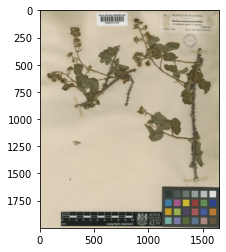

In [3]:
# import all those helper function from utils. We will be using data loader to load all the images 
import pp_ocr_deployment
SRC_DIR = "/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/"
f_name = "912570867.jpg"
# SRC_DIR = "/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/drago_testdata/images/test/1228540653.jpg"
save_dir = '/usr4/dl523/dong760/CS549_Herbarium_Project/ml-herbarium/PaddleOCR/output'
img_path = os.path.join(SRC_DIR, f_name)
pp_ocr_deployment.display_img_with_img_path(img_path=img_path)

Now, let's use pp-ocr to perform the detection and recognition:

[[list([[1212.0, 33.0], [1495.0, 38.0], [1495.0, 67.0], [1211.0, 62.0]])
  ('PLANTAE NEAPOLITANAE', 0.9877490997314453)]
 [list([[542.0, 38.0], [655.0, 38.0], [655.0, 58.0], [542.0, 58.0]])
  ('ROYAL BOTANI', 0.952165424823761)]
 [list([[1131.0, 35.0], [1170.0, 35.0], [1170.0, 58.0], [1131.0, 58.0]])
  ('313', 0.9955403208732605)]
 [list([[1212.0, 85.0], [1499.0, 94.0], [1498.0, 121.0], [1211.0, 112.0]])
  ('Rubus uncinatus Nobis.', 0.9772447943687439)]
 [list([[602.0, 110.0], [724.0, 110.0], [724.0, 125.0], [602.0, 125.0]])
  ('K000737705', 0.9668992161750793)]
 [list([[1216.0, 112.0], [1495.0, 121.0], [1494.0, 150.0], [1215.0, 141.0]])
  ('In dumetis supra S. Stefano,', 0.9819989800453186)]
 [list([[1473.0, 141.0], [1566.0, 146.0], [1564.0, 169.0], [1472.0, 164.0]])
  ('Calabriae', 0.8854371905326843)]
 [list([[1136.0, 160.0], [1249.0, 165.0], [1248.0, 188.0], [1135.0, 183.0]])
  ('29 Jun.1856.', 0.9652020335197449)]
 [list([[1328.0, 164.0], [1569.0, 169.0], [1569.0, 198.0], [1327.0,

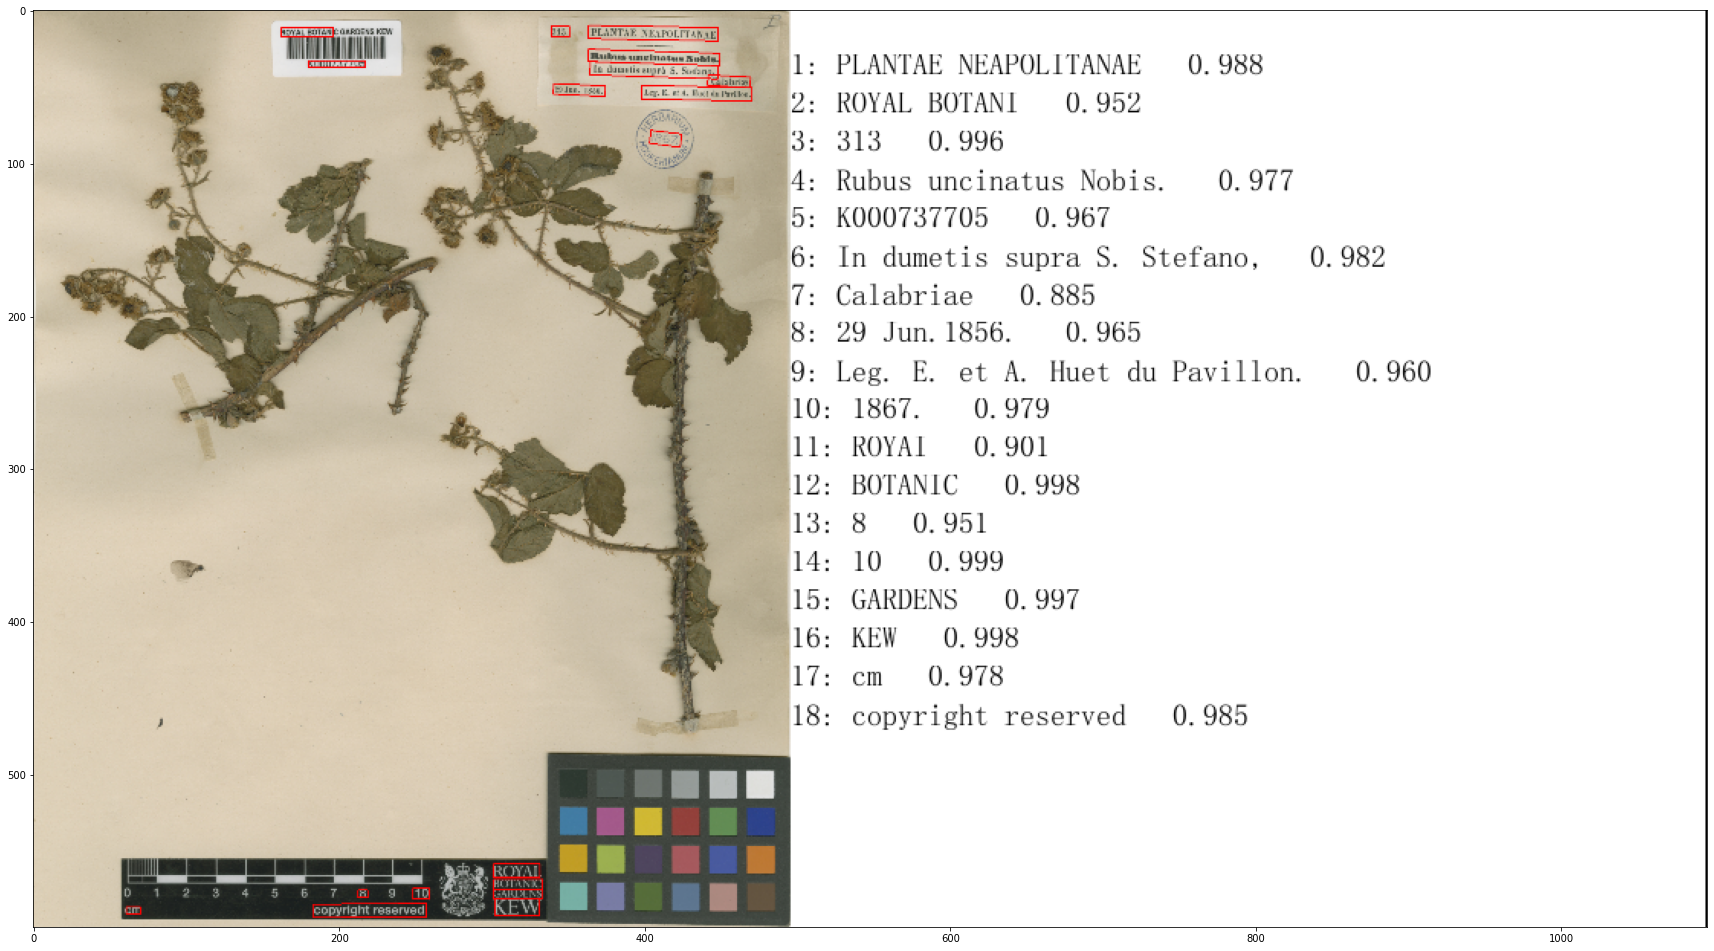

In [3]:
pp_ocr_deployment.display_OCR_result_with_img_path(img_dir=SRC_DIR, img_name=f_name, save_dir=save_dir, display_result=True)

If you prefer with the command line, you can run it with following command shown below, and the result will be saved into the directory that you provided

In [4]:
!python pp_ocr_deployment.py -d /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/ -f 912082001.jpg -r /usr4/dl523/dong760/CS549_Herbarium_Project/ml-herbarium/PaddleOCR/output

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/skimage/filters/rank/generic.py:1: DeprecationWarning: invalid escape sequence \-
  """
args: Namespace(display_result='n', img_dir='/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/', img_name='912082001.jpg', save_dir='/usr4/dl523/dong760/CS549_Herbarium_Project/ml-herbarium/PaddleOCR/output')
[[list([[389.0, 69.0], [412.0, 69.0], [412.0, 83.0], [389.0, 83.0]])
  ('61', 0.8236742615699768)]
 [list([[334.0, 90.0], [476.0, 87.0], [477.0, 110.0], [335.0, 113.0]])
  ('H2004/0a232', 0.7764654755592346)]
 [list([[389.0, 131.0], [429.0, 131.0], [429.0, 146.0], [389.0, 146.0]])
  ('KEW', 0.9964563846588135)]
 [list([[652.0, 1365.0], [895.0, 1362.0], [895.0, 1385.0], [652.0, 1388.0]])
  ('HERB. HORT.BOT.REG. KEW.', 0.9611942172050476)]
 [list([[692.0, 1425.0], [748.0, 1425.0], [748.0, 1446.0], [692.0, 1446.0]])
  ('16324', 0.9963390231132507)]
 [list([[690.0, 1444.0], [897.0, 1444.0], [

# Example how to perform batch evaluation

Reading all images id into a list...

4 of original images obtained.

All invalid imageID: []
 All imgIds read from given path: ['1019531437', '1019752371', '1038924603', '1038926232']
First image shape: (4879, 4294, 3)


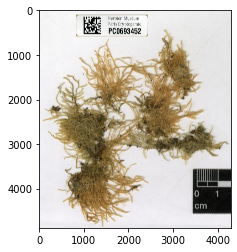

In [5]:
from utils import My_DataLoader 
# Dataloader for working with gpu's
batch_size= 4
# SRC_DIR = "/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/drago_testdata/images/test/"
SRC_DIR = "/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching"
# Read image in batch
data_loader = My_DataLoader(SRC_DIR, batch_size)
batch_dict, label_list = data_loader.get_next_batch()
print(f" All imgIds read from given path: {label_list}")
print(f"First image shape: {batch_dict[label_list[0]].shape}")
img = batch_dict[label_list[0]]
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Read image one by one
# data_loader[fId]

This customize dataloader support batch processing. In other, for a large image dataset, you don't have to load every into memory at once, and you can perform any task in a batch manner. 

Above, what you see is the result of first image in the first batch.  You can call 

```python
batch_dict, label_list = data_loader.get_next_batch()
```
to get next batch of images.


Now, let's use the data_loader to get specific image and do inference with pp-ocr

In [6]:
# Making Prediction
model_dir = "/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/PP_OCR_data/pretrain_models"
ocr = PaddleOCR(use_angle_cls=True, 
                cls_model_dir="./cls/en_ppocr_mobile_v2.0_cls_infer.tar",
                det_algorithm="DB",          # ['DB', "EAST"]
                rec_algorithm="CRNN",  # ['CRNN', 'SVTR_LCNet'], ....Rosetta、CRNN、STAR-Net、RARE
                # det_model_dir=model_dir, # det_mv3_db_v2.0_train, det_r50_drrg_ctw_train.tar
                # rec_model_dir=model_dir,
                use_gpu=True, 
                lang='en',
                show_log=False) # need to run only once to download and load model into memory
fId = '912570867' # 1228540653, 1019531437
img = data_loader[fId]
predicted_result = ocr.ocr(img)
predicted_result

[[[[[1212.0, 33.0], [1495.0, 38.0], [1495.0, 67.0], [1211.0, 62.0]],
   ('PLANTAE NEAPOLITANAE', 0.9877488017082214)],
  [[[542.0, 38.0], [655.0, 38.0], [655.0, 58.0], [542.0, 58.0]],
   ('ROYAL BOTANI', 0.9521653652191162)],
  [[[1131.0, 35.0], [1170.0, 35.0], [1170.0, 58.0], [1131.0, 58.0]],
   ('313', 0.9955400824546814)],
  [[[1212.0, 85.0], [1499.0, 94.0], [1498.0, 121.0], [1211.0, 112.0]],
   ('Rubus uncinatus Nobis.', 0.9772446155548096)],
  [[[602.0, 110.0], [724.0, 110.0], [724.0, 125.0], [602.0, 125.0]],
   ('K000737705', 0.9668989181518555)],
  [[[1216.0, 112.0], [1495.0, 121.0], [1494.0, 150.0], [1215.0, 141.0]],
   ('In dumetis supra S. Stefano,', 0.9819989204406738)],
  [[[1473.0, 141.0], [1566.0, 146.0], [1564.0, 169.0], [1472.0, 164.0]],
   ('Calabriae', 0.8854373097419739)],
  [[[1136.0, 160.0], [1249.0, 165.0], [1248.0, 188.0], [1135.0, 183.0]],
   ('29 Jun.1856.', 0.9652020335197449)],
  [[[1328.0, 164.0], [1569.0, 169.0], [1569.0, 198.0], [1327.0, 194.0]],
   ('Leg.

What you see above are all the predicted result from the given image. It returns a list of predicted result. Each item contains bbox for detected text, a tuple consisted of (predicted text, and confidence level)



Now, let's perform the evaluation on a batch of simple image:

In [ ]:
# Dataloader for working with gpu's
batch_size= 4
# SRC_DIR = "/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/drago_testdata/images/" # Has about 1000 images
SRC_DIR = "/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220621-052943" # Has lass image, just for experimental purpose
# SRC_DIR = "/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching" # Has about 1000 images


# Read image in batch
from utils import My_DataLoader
data_loader = My_DataLoader(SRC_DIR, batch_size)
# print(data_loader.imgIds_list)

# Get next batch of image
# batch_dict, label_list = data_loader.get_next_batch()
# print(f" All imgIds read from given path: {label_list}")
# print(f"First image shape: {batch_dict[label_list[0]].shape}")

# Get all gt label
gt_dict = data_loader.get_gt_dict()
# print(gt_dict)

all_corpus_set = data_loader.get_all_corpus_set()

with_gpu = True
model_dir = "/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/PP_OCR_data/pretrain_models"
ocr = PaddleOCR(use_angle_cls=True, 
            cls_model_dir="./cls/en_ppocr_mobile_v2.0_cls_infer.tar",
            det_algorithm="DB",          # ['DB', "EAST"]
            rec_algorithm="CRNN",  # ['CRNN', 'SVTR_LCNet'], ....Rosetta、CRNN、STAR-Net、RARE
            # det_model_dir=model_dir, # det_mv3_db_v2.0_train, det_r50_drrg_ctw_train.tar
            # rec_model_dir=model_dir,
            use_gpu=with_gpu, 
            lang='en',
            show_log=False) # need to run only once to download and load model into memory

pp_ocr_deployment.batch_evaluation(ocr, data_loader, gt_dict, all_corpus_set)

Reading all images id into a list...
taxon_corpus_set: (870757,), geography_corpus_set: (6535,), collector_corpus_set: (823,)
Corrected Prediction Format:  Pred_category(corr_count/total_count): gt_result || predicted_result || imgID 
taxon          Liatris virgata || Liatris graminifolia || 1456077691 
geography      United States of America || Iran, Fars || 1456077691 
collector      J. Donnell Smith || R. K. Godfrey || 1456077691 
imgId: 1456077691, elapse: 0.0 sec
taxon          Ostericum palustre || Detris tenella || 1697607518 
geography      Russian Federation || Guadeloupe, Grande Terre || 1697607518 
collector      Kats N.|Kats S. || Hock A. || 1697607518 
imgId: 1697607518, elapse: 0.0 sec
taxon          Didymodoxa caffra || Onoseris isotypus || 1699810828 
geography      Tanzania, United Republic of || Germany, Hamburg || 1699810828 
collector      Volkens, G. || Lemmon Herbarium || 1699810828 
imgId: 1699810828, elapse: 0.0 sec
taxon          Erythrina standleyana || Erythr

It takes too long to finish the running, a completed result is shown below:

==========================> Loading moudule for Project Environment
===========================> Checking OS Information
LSB Version:	:core-4.1-amd64:core-4.1-noarch:cxx-4.1-amd64:cxx-4.1-noarch:desktop-4.1-amd64:desktop-4.1-noarch:languages-4.1-amd64:languages-4.1-noarch:printing-4.1-amd64:printing-4.1-noarch
Distributor ID:	CentOS
Description:	CentOS Linux release 7.9.2009 (Core)
Release:	7.9.2009
Codename:	Core
x86_64
CentOS Linux release 7.9.2009 (Core)
NAME="CentOS Linux"
VERSION="7 (Core)"
ID="centos"
ID_LIKE="rhel fedora"
VERSION_ID="7"
PRETTY_NAME="CentOS Linux 7 (Core)"
ANSI_COLOR="0;31"
CPE_NAME="cpe:/o:centos:centos:7"
HOME_URL="https://www.centos.org/"
BUG_REPORT_URL="https://bugs.centos.org/"

CENTOS_MANTISBT_PROJECT="CentOS-7"
CENTOS_MANTISBT_PROJECT_VERSION="7"
REDHAT_SUPPORT_PRODUCT="centos"
REDHAT_SUPPORT_PRODUCT_VERSION="7"

CentOS Linux release 7.9.2009 (Core)
CentOS Linux release 7.9.2009 (Core)
===========================> Checking CPU Information
Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                32
On-line CPU(s) list:   0-31
Thread(s) per core:    1
Core(s) per socket:    16
Socket(s):             2
NUMA node(s):          4
Vendor ID:             GenuineIntel
CPU family:            ddd6
Model:                 85
Model name:            Intel(R) Xeon(R) Gold 6242 CPU @ 2.80GHz
Stepping:              7
CPU MHz:               3472.827
CPU max MHz:           3900.0000
CPU min MHz:           1200.0000
BogoMIPS:              5600.00
Virtualization:        VT-x
L1d cache:             32K
L1i cache:             32K
L2 cache:              1024K
L3 cache:              22528K
NUMA node0 CPU(s):     0,4,8,12,16,20,24,28
NUMA node1 CPU(s):     1,5,9,13,17,21,25,29
NUMA node2 CPU(s):     2,6,10,14,18,22,26,30
NUMA node3 CPU(s):     3,7,11,15,19,23,27,31
Flags:                 fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc aperfmperf eagerfpu pni pclmulqdq dtes64 monitor ds_cpl vmx smx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid dca sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm abm 3dnowprefetch epb cat_l3 cdp_l3 invpcid_single intel_ppin intel_pt ssbd mba ibrs ibpb stibp ibrs_enhanced tpr_shadow vnmi flexpriority ept vpid fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm cqm mpx rdt_a avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 cqm_llc cqm_occup_llc cqm_mbm_total cqm_mbm_local dtherm ida arat pln pts pku ospke avx512_vnni md_clear spec_ctrl intel_stibp flush_l1d arch_capabilities
===========================> Checking GPU Configuration
Tue Nov 22 12:22:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.07    Driver Version: 515.65.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:3B:00.0 Off |                    0 |
| N/A   64C    P0   266W / 250W |  16041MiB / 16384MiB |     92%   E. Process |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:D8:00.0 Off |                    0 |
| N/A   33C    P0    24W / 250W |      0MiB / 16384MiB |      0%   E. Process |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU   GI   CI        PID   Type   Process name                  GPU Memory |
|        ID   ID                                                   Usage      |
|=============================================================================|
|    0   N/A  N/A    216851      C   python                          16037MiB |
+-----------------------------------------------------------------------------+
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Mon_May__3_19:15:13_PDT_2021
Cuda compilation tools, release 11.3, V11.3.109
Build cuda_11.3.r11.3/compiler.29920130_0
Linux scc-q25 3.10.0-1160.71.1.el7.x86_64 #1 SMP Tue Jun 28 15:37:28 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux
==========================> Checking SCC Quota Usage
                                      quota     quota       usage     usage
project space                          (GB)    (files)       (GB)   (files)
-----------------------------------  ------  ---------  ---------  --------
/projectnb/sparkgrp                    5000   33554432    2474.80  16481168
/rproject/sparkgrp                       50    1638400       0.00         1
/rprojectnb/sparkgrp                     50    1638400       1.51       614
Home Directory Usage and Quota:
Name           GB    quota    limit in_doubt    grace |    files    quota    limit in_doubt    grace
dong760   7.40154     10.0     11.0      0.2     none |   76,161  200,000  200,000      215     none
job-ID  prior   name       user         state submit/start at     queue                          slots ja-task-ID 
-----------------------------------------------------------------------------------------------------------------
8724577 0.13578 QRLOGIN    dong760      r     11/22/2022 09:42:48 academic-gpu@scc-202.scc.bu.ed     1        
8726650 0.10033 ppocr_on_d dong760      r     11/22/2022 12:11:25 csgpu@scc-q27.scc.bu.edu           2        
8726730 0.10017 ppocr_on_d dong760      r     11/22/2022 12:22:38 csgpu@scc-q25.scc.bu.edu           2        

Currently Loaded Modules:
  1) python3/3.8.10   2) opencv/4.5.0   3) cuda/11.3

 

==========================> Activate Env
==========================> Verify correct Env
/usr4/dl523/dong760/CS549_Herbarium_Project/.env/bin:/share/pkg.7/cuda/11.3/install/nsight-compute-2021.1.1:/share/pkg.7/cuda/11.3/install/nsight-systems-2021.1.3/bin:/share/pkg.7/cuda/11.3/install/bin:/share/pkg.7/opencv/4.5.0/install/bin:/share/pkg.7/python3/3.8.10/install/bin:/scratch/8726730.1.csgpu:/usr4/dl523/dong760/CS549_Herbarium_Project/.env/bin:/share/pkg.7/cuda/11.6/install/nsight-compute-2022.1.1:/share/pkg.7/cuda/11.6/install/nsight-systems-2021.5.2/bin:/share/pkg.7/cuda/11.6/install/bin:/share/pkg.7/tensorflow/2.5.0/install/bin:/share/pkg.7/cuda/11.1.1/install/bin:/share/pkg.7/libicu/71.1/install/sbin:/share/pkg.7/libicu/71.1/install/bin:/share/pkg.7/leptonica/1.82.0/install/bin:/usr4/dl523/dong760/.vscode-server/bin/6261075646f055b99068d3688932416f2346dd3b/bin/remote-cli:/share/pkg.7/pytorch/1.9.0/install/bin:/usr/java/default/jre/bin:/usr/java/default/bin:/usr/lib64/qt-3.3/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin:/opt/dell/srvadmin/bin:/bin:/usr4/dl523/dong760/bin:.


Python 3.8.10
/share/pkg.7/python3/3.8.10/install/bin/python
/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/skimage/filters/rank/generic.py:1: DeprecationWarning: invalid escape sequence \-
  """
1.19.5
Reading all images id into a list...
taxon_corpus_set: (870757,), geography_corpus_set: (6535,), collector_corpus_set: (823,)
Corrected Prediction Format: [92m Pred_category(corr_count/total_count): gt_result || predicted_result || imgID [0m
pd.Series(txts).shape: (4,)
taxon          Isopterygium nivescens || Corydalis cryptogama || 1019531437 
geography      Cameroon || Serbia || 1019531437 
collector      Jungner, J.R. || Herb Posthumus L || 1019531437 
imgId: 1019531437, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Siler montanum || Rubus corbieri || 1019752371 
geography      France || Serbia || 1019752371 
collector      Coste, H. || Lemmon Herbarium || 1019752371 
imgId: 1019752371, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(1/3):     Eriophorum tenellum || Eriophorum tenellum || 1038924603
geography      United States of America || United States of America, Connecticut || 1038924603 
collector      Charles A. Weatherby || Sloff JG || 1038924603 
imgId: 1038924603, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(2/4):     Solidago patula || Solidago patula || 1038926232
geography      United States of America || United States of America, Connecticut || 1038926232 
collector      Hugh S. Clark || C. H. Bissell || 1038926232 
imgId: 1038926232, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Nuttallanthus canadensis || Rosa duplicata || 1038933447 
geography      United States of America || United States of America, North Carolina, Duplin County || 1038933447 
collector      Hugh S. Clark || Lemmon Herbarium || 1038933447 
imgId: 1038933447, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Suaeda linearis || Ipomoea st-nicolai || 1038967579 
geography      United States of America || United States of America, North Carolina, Guilford County || 1038967579 
collector      William R. Dudley || Lemmon Herbarium || 1038967579 
imgId: 1038967579, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Eriogonum brachypodum || Onoseris isotypus || 1038991156 
geography      United States of America || Thailand, Yala || 1038991156 
collector      Charles C. Parry || Daniel C. Eaton || 1038991156 
imgId: 1038991156, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon(3/8):     Chenopodium hybridum || Chenopodium hybridum || 1039025105
geography      United States of America || United States of America, Connecticut || 1039025105 
collector      Charles A. Weatherby || C. H. T. Townsend || 1039025105 
imgId: 1039025105, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Bidens cornuta || Lupinus edwardpalmeri || 1055366369 
geography(1/9): Mexico || Mexico || 1055366369
collector(1/9): Edward Palmer || Edward Palmer || 1055366369
imgId: 1055366369, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Mangifera duperreana || Ione kipgenii || 1056014429 
geography      Thailand || Canada, Saskatchewan, Indian Head No.156 || 1056014429 
collector      Arthur Francis George Kerr || A. F. G. Kerr || 1056014429 
imgId: 1056014429, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Calophyllum vitiense || Solanum seedii || 1056069802 
geography      Fiji || United States of America, Tennessee || 1056069802 
collector      Everard Ferdinand im Thurn || Lemmon Herbarium || 1056069802 
imgId: 1056069802, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Angraecum rostratum || Stelis subequalis || 1056306307 
geography(2/12): Madagascar || Madagascar || 1056306307
collector(2/12): Johann Maria Hildebrandt || Johann Maria Hildebrandt || 1056306307
imgId: 1056306307, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Calymmodon clavifer || Cacalia profundorum || 1057234135 
geography      Indonesia || Ecuador, Tungurahua || 1057234135 
collector      Gunnar Konstantin Kjellberg || Fruchard || 1057234135 
imgId: 1057234135, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Fumaria capreolata || Fumaria platycalyx || 1057260090 
geography      Algeria || Algeria, Alger || 1057260090 
collector      Auguste Nicolas Pomel || Pomel, A.N. || 1057260090 
imgId: 1057260090, elapse: 0.0 sec
pd.Series(txts).shape: (31,)
taxon          Psydrax schimperiana || Erica pedicellata || 1057464806 
geography      Uganda || Iceland || 1057464806 
collector      A G. Bagshawe || Kotschy, T. (no. 159) || 1057464806 
imgId: 1057464806, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Cladophora columbiana || Gardenia gardneri || 1057532849 
geography      United States of America || United States of America, California, Monterey County || 1057532849 
collector      Nathaniel Lyon Gardner || Gardner, Gérard || 1057532849 
imgId: 1057532849, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Cuspidaria simplicifolia || Cuspidaria tricuspis || 1057553687 
geography      Brazil || Mexico, Tabasco, Macuspana || 1057553687 
collector      Jacques Samuel Blanchet || G. B. Sudworth || 1057553687 
imgId: 1057553687, elapse: 0.0 sec
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1062492619.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1062492619.jpg'
pd.Series(txts).shape: (11,)
taxon          Frullania asagrayana || Syama lata || 1091063773 
geography      United States of America || United States of America, North Carolina || 1091063773 
collector      J. K. Small || John K. Small || 1091063773 
imgId: 1091063773, elapse: 0.0 sec
pd.Series(txts).shape: (1,)
taxon          Rhizomnium glabrescens || Allium rhizomatum || 1091087924 
geography      United States of America || Niue || 1091087924 
collector      W. J. Eyerdam || Axel Arrhenius || 1091087924 
imgId: 1091087924, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Centaurea tuntasia || Onoseris isotypus || 1135439455 
geography      Greece || Austria, Wien || 1135439455 
collector      Heldreich,T.H.H. von & Tuntas,B. || Lemmon Herbarium || 1135439455 
imgId: 1135439455, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Verbascum nigrum || Acer barbatum || 1144111060 
geography      Norway || Barbados || 1144111060 
collector      T. Lillefosse || Lemmon Herbarium || 1144111060 
imgId: 1144111060, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Verbascum thapsus || Bergeranthus katbergensis || 1144111255 
geography      Norway || United States of America, New Jersey, Bergen County || 1144111255 
collector(3/22): T. Lillefosse || T. Lillefosse || 1144111255
imgId: 1144111255, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Veronica agrestis || Aralia duplex || 1144111291 
geography      Norway || United States of America, North Carolina, Duplin County || 1144111291 
collector      Joh. Dyring || Lemmon Herbarium || 1144111291 
imgId: 1144111291, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Veronica serpyllifolia || Bergeranthus katbergensis || 1144113124 
geography      Norway || United States of America, New Jersey, Bergen County || 1144113124 
collector      Studentekskursjon || Bloembergen S || 1144113124 
imgId: 1144113124, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Valeriana excelsa || Phyllanthus embergeri || 1144116297 
geography      Norway || China, Sichuan, Sertar || 1144116297 
collector      Jens Holmboe || Axel Arrhenius || 1144116297 
imgId: 1144116297, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Succisa pratensis || Prestonia portobellensis || 1144116842 
geography      Norway || Germany, Bavaria, Oberbayern || 1144116842 
collector      T. Lillefosse || Chase A || 1144116842 
imgId: 1144116842, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Campanula patula || Bergeranthus katbergensis || 1144117269 
geography(3/27): Finland || Finland || 1144117269
collector(4/27): Harald Lindberg || Harald Lindberg || 1144117269
imgId: 1144117269, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Campanula rotundifolia || Dupineta hensii || 1144117467 
geography      Norway || China, Sichuan, Moupin || 1144117467 
collector      Joh. Dyring || Baum,H. || 1144117467 
imgId: 1144117467, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Jasione montana || Rosa norvegica || 1144117930 
geography      Norway || Norvegia || 1144117930 
collector      Knut Fægri || H. D. House || 1144117930 
imgId: 1144117930, elapse: 0.0 sec
Warning! No predicted text matched for image 1146138679
Warning! No predicted text matched for image 1146376618
pd.Series(txts).shape: (10,)
taxon          Tigridia pavonia || Pavonia varians || 1212567865 
geography      France || Costa Rica, Heredia || 1212567865 
collector      s.c. || H. and M. Dearing || 1212567865 
imgId: 1212567865, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(4/31):    Rumex crispus || Rumex crispus || 1212575663
geography      France || Serbia || 1212575663 
collector      Fournié, F. || Lemmon Herbarium || 1212575663 
imgId: 1212575663, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Croton cordiifolius || Trifolium blancheanum || 1228209830 
geography      Brazil || United States of America, Washington, Chelan County || 1228209830 
collector      J. S. Blanchet || Blanc || 1228209830 
imgId: 1228209830, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Myosotis laxa || Poa multnomae || 1228212556 
geography      United States of America || United States of America, Oregon, Multnomah County || 1228212556 
collector(5/33): E. P. Sheldon || E. P. Sheldon || 1228212556
imgId: 1228212556, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Salix eriocephala || Dalea fieldii || 1228251414 
geography      United States of America || United States of America, Montana, Garfield County || 1228251414 
collector      E. A. Mearns || Camfield, J.H. || 1228251414 
imgId: 1228251414, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Miconia eriocalyx || Acacia etbaica || 1228254314 
geography      Peru || Philippines, Mindoro Island, Oriental Mindoro || 1228254314 
collector      E. F. Poeppig || Lemmon Herbarium || 1228254314 
imgId: 1228254314, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Rorippa palustris || Elaterium coulteri || 1228276754 
geography      United States of America || United States of America, Michigan || 1228276754 
collector      C. A. Davis || Lemmon Herbarium || 1228276754 
imgId: 1228276754, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Juncus lesueurii || Whitfieldia striata || 1228306029 
geography      United States of America || United States of America, Georgia, Whitfield County || 1228306029 
collector      M. E. Peck || W. M. Whitfield || 1228306029 
imgId: 1228306029, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Carex pellita || Dalea fieldii || 1228315937 
geography      United States of America || United States of America, Colorado || 1228315937 
collector      H. N. Patterson || Camfield, J.H. || 1228315937 
imgId: 1228315937, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Solidago rigida || Arundo flora || 1228454849 
geography      United States of America || United States of America, Colorado, Denver County || 1228454849 
collector(6/39): I. W. Clokey || I. W. Clokey || 1228454849
imgId: 1228454849, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Anemopaegma arvense || Amarella amarella || 1228476543 
geography      Brazil || United States of America, Montana, Garfield County || 1228476543 
collector      Mello Barreto || Camfield, J.H. || 1228476543 
imgId: 1228476543, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(5/41):    Juncus interior || Juncus interior || 1228491932
geography      United States of America || United States of America, Illinois, Jasper County || 1228491932 
collector(7/41): G. L. Stout || G. L. Stout || 1228491932
imgId: 1228491932, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Juncus nodosus || Dalea fieldii || 1228576989 
geography      United States of America || United States of America, Montana, Garfield County || 1228576989 
collector(8/42): D. C. Peattie || D. C. Peattie || 1228576989
imgId: 1228576989, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon(6/43):    Astragalus austriacus || Astragalus austriacus || 1230475863
geography(4/43): Austria || Austria || 1230475863
collector      Hayne || Lemmon Herbarium || 1230475863 
imgId: 1230475863, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Clusia trochiformis || Licania platypus || 1230521660 
geography      Peru || Latvia || 1230521660 
collector      Spruce,R. || Heldreich THH von || 1230521660 
imgId: 1230521660, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Crotalaria densicephala || Maytenus mayana || 1230523158 
geography      Angola || Latvia || 1230523158 
collector      Baum,H. || Wilkes Expedition || 1230523158 
imgId: 1230523158, elapse: 0.0 sec
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1257613902.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1257613902.jpg'
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1257819684.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1257819684.jpg'
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1258000260.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1258000260.jpg'
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1258695135.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1258695135.jpg'
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1258765954.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1258765954.jpg'
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1259191398.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1259191398.jpg'
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1260164220.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1260164220.jpg'
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1260578109.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1260578109.jpg'
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1260899329.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1260899329.jpg'
pd.Series(txts).shape: (15,)
taxon          Poa juncifolia || Poa nevadensis || 1262195198 
geography      United States of America || United States of America, Iowa, Humboldt County || 1262195198 
collector      P. Train || Collector unknown || 1262195198 
imgId: 1262195198, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(7/47):    Mendoncia coccinea || Mendoncia coccinea || 1265483891
geography      Brazil || Brazil, Minas Gerais || 1265483891 
collector      Mexia, Y. || S. Flowers || 1265483891 
imgId: 1265483891, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Neea floribunda || Olea floribunda || 1265505301 
geography      Brazil || United Kingdom, Scotland, Highland County || 1265505301 
collector      Krukoff, B.A. || P. C. Standley || 1265505301 
imgId: 1265505301, elapse: 0.0 sec
pd.Series(txts).shape: (40,)
taxon(8/49):    Ranunculus fascicularis || Ranunculus fascicularis || 1269651682
geography      United States of America || Greenland || 1269651682 
collector      Clair A. Brown; Wayne L. Lenz || P. White || 1269651682 
imgId: 1269651682, elapse: 0.0 sec
pd.Series(txts).shape: (40,)
taxon          Seymeria deflexa || Cyanus cyanus || 1269720741 
geography      Mexico || Greenland || 1269720741 
collector      C. G. Pringle || P. White || 1269720741 
imgId: 1269720741, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Dicranopteris linearis || Reholttumia costata || 1317226844 
geography(5/51): Philippines || Philippines || 1317226844
collector(9/51): P. Bartsch || P. Bartsch || 1317226844
imgId: 1317226844, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Sidalcea asprella || Crusea rosea || 1317278320 
geography(6/52): United States of America || United States of America || 1317278320
collector      W. W. Eggleston || Chase A || 1317278320 
imgId: 1317278320, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Clermontia persicifolia || Aira hawaiiensis || 1317726996 
geography      United States of America || Hawaii || 1317726996 
collector(10/53): C. N. Forbes || C. N. Forbes || 1317726996
imgId: 1317726996, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Croton californicus || Randia wigginsii || 1317746297 
geography      Mexico || Mexico, Sonora || 1317746297 
collector(11/54): I. L. Wiggins || I. L. Wiggins || 1317746297
imgId: 1317746297, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(9/55):    Elymus hystrix || Elymus hystrix || 1317840733
geography      United States of America || United States of America, District of Columbia || 1317840733 
collector      A. S. Hitchcock & A. Chase || G. H. H. Tate || 1317840733 
imgId: 1317840733, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Pteris altissima || Palala bialata || 1317865686 
geography      Panama || Liberia || 1317865686 
collector      W. R. Maxon || Balansa B || 1317865686 
imgId: 1317865686, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Cuscuta gronovii || Washingtonia laxa || 1318027385 
geography      United States of America || United States of America, Minnesota, Steele County || 1318027385 
collector(12/57): E. S. Steele || E. S. Steele || 1318027385
imgId: 1318027385, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Ludwigia peploides || Ludwigia sericea || 1318062184 
geography      France || France, Hauts-de-France, Pas-de-Calais || 1318062184 
collector(13/58): E. Sennen || E. Sennen || 1318062184
imgId: 1318062184, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon(10/59):   Hohenbergia antillana || Hohenbergia antillana || 1318182025
geography      Puerto Rico || Mexico, Chiapas, Las Margaritas || 1318182025 
collector      N. L. Britton, E. G. Britton & M. S. Brown || Collector unknown || 1318182025 
imgId: 1318182025, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Cyathea squamipes || Uncinia austroamericana || 1318212360 
geography      Colombia || Austria || 1318212360 
collector(14/60): K. von Sneidern || K. von Sneidern || 1318212360
imgId: 1318212360, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Cordia sulcata || Eria leonardoi || 1318293083 
geography(7/61): Dominican Republic || Dominican Republic || 1318293083
collector      W. L. Abbott || E. C. Leonard || 1318293083 
imgId: 1318293083, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Pilea inaequalis || Thelypteris altitudinis || 1318334082 
geography(8/62): Dominican Republic || Dominican Republic || 1318334082
collector(15/62): W. L. Abbott || W. L. Abbott || 1318334082
imgId: 1318334082, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(11/63):   Carya glabra || Carya glabra || 1318345053
geography      United States of America || United States of America, Illinois, Washington County || 1318345053 
collector(16/63): L. F. Ward || L. F. Ward || 1318345053
imgId: 1318345053, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Miconia elaeagnoides || Elekmania samanensis || 1318373170 
geography      Haiti || El Salvador, Sonsonate || 1318373170 
collector(17/64): E. L. Ekman || E. L. Ekman || 1318373170
imgId: 1318373170, elapse: 0.0 sec
pd.Series(txts).shape: (33,)
taxon          Ditaxis argothamnoides || Argythamnia cochensis || 1318393575 
geography(9/65): Colombia || Colombia || 1318393575
collector      F. W. Pennell || J. R. Johnston || 1318393575 
imgId: 1318393575, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(12/66):   Epilobium ciliatum || Epilobium ciliatum || 1318477305
geography      United States of America || United States of America, Alaska, Sitka County || 1318477305 
collector      F. V. Coville & T. H. Kearney || Camus, A. || 1318477305 
imgId: 1318477305, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Tripsacum maizar || Landolphia macrantha || 1318526260 
geography      Mexico || United States of America, Indiana, Randolph County || 1318526260 
collector      -. Collins & -. Kempton || William Randolph Taylor || 1318526260 
imgId: 1318526260, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Viburnum prunifolium || Bidens sandvicensis || 1318724267 
geography      United States of America || United States of America, District of Columbia || 1318724267 
collector(18/68): W. McAtee || W. McAtee || 1318724267
imgId: 1318724267, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(13/69):   Drymaria cordata || Drymaria cordata || 1318797445
geography      Antigua and Barbuda || Canada, British Columbia || 1318797445 
collector      H. E. Box || Lemmon Herbarium || 1318797445 
imgId: 1318797445, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Adoxa moschatellina || Stellaria alaskana || 1318897823 
geography(10/70): United States of America || United States of America || 1318897823
collector      O. D. Clark || Lemmon Herbarium || 1318897823 
imgId: 1318897823, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon(14/71):   Phyllanthus acidus || Phyllanthus acidus || 1319210580
geography(11/71): Brazil || Brazil || 1319210580
collector(19/71): H. M. Curran || H. M. Curran || 1319210580
imgId: 1319210580, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(15/72):   Asclepias subverticillata || Asclepias subverticillata || 1319326174
geography      United States of America || United States of America, Texas, Ector County || 1319326174 
collector      E. A. Mearns || Collector unknown || 1319326174 
imgId: 1319326174, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Xanthium strumarium || Impatiens walongensis || 1319596167 
geography      United States of America || United States of America, Virginia, Fauquier County || 1319596167 
collector(20/73): H. A. Allard || H. A. Allard || 1319596167
imgId: 1319596167, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(16/74):   Physalis angulata || Physalis angulata || 1319648357
geography      Virgin Islands (U.S.) || United States of America || 1319648357 
collector      N. L. Britton, E. G. Britton & J. A. Shafer || Collector unknown || 1319648357 
imgId: 1319648357, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Asplenium platyneuron || Washingtonia laxa || 1319811635 
geography      United States of America || United States of America, Maryland, Baltimore County || 1319811635 
collector      H. A. Allard || G. H. H. Tate || 1319811635 
imgId: 1319811635, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Panicum itatiaiae || Onoseris isotypus || 1319864119 
geography(12/76): Brazil || Brazil || 1319864119
collector(21/76): A. Chase || A. Chase || 1319864119
imgId: 1319864119, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Sida jussieana || Sida jussiaeana || 1320104750 
geography      Panama || United States of America || 1320104750 
collector      P. C. Standley || F. Clements || 1320104750 
imgId: 1320104750, elapse: 0.0 sec
pd.Series(txts).shape: (28,)
taxon          Monopyle mexiae || Thelypteris altitudinis || 1320398138 
geography(13/78): Ecuador || Ecuador || 1320398138
collector      Y. Mexia || Mexia, Y. || 1320398138 
imgId: 1320398138, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Phyllanthus amarus || Statice aristata || 1320460457 
geography      Haiti || Haiti, L'Artibonite || 1320460457 
collector(22/79): E. C. Leonard || E. C. Leonard || 1320460457
imgId: 1320460457, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon(17/80):   Serjania subdentata || Serjania subdentata || 1320488541
geography      Cuba || Cuba, Cienfuegos || 1320488541 
collector      J. G. Jack || Wright || 1320488541 
imgId: 1320488541, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Lupinus truncatus || Breweria mollis || 1321333954 
geography      United States of America || United States of America, California || 1321333954 
collector(23/81): W. H. Brewer || W. H. Brewer || 1321333954
imgId: 1321333954, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Pteris semipinnata || Calanthe philippinensis || 1321443340 
geography(14/82): Philippines || Philippines || 1321443340
collector      E. D. Merrill || Lemmon Herbarium || 1321443340 
imgId: 1321443340, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Pinus pseudostrobus || Mammillaria perezdelarosae || 1321575246 
geography      Guatemala || United States of America || 1321575246 
collector      W. A. Kellerman || Lemmon Herbarium || 1321575246 
imgId: 1321575246, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Miconia coniophora || Allionia foliosa || 1321746477 
geography      Haiti || United States of America, Indiana, Vermillion County || 1321746477 
collector(24/84): E. L. Ekman || E. L. Ekman || 1321746477
imgId: 1321746477, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(18/85):   Marattia alata || Marattia alata || 1321842019
geography      Jamaica || Panama || 1321842019 
collector(25/85): G. F. Papenfuss || G. F. Papenfuss || 1321842019
imgId: 1321842019, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Melanthera parvifolia || Statice aristata || 1321991154 
geography      United States of America || United States of America, Texas, Morris County || 1321991154 
collector(26/86): C. L. Pollard || C. L. Pollard || 1321991154
imgId: 1321991154, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Frankenia palmeri || Guarea palmeri || 1321992876 
geography      Mexico || United States of America, Michigan, Ontonagon County || 1321992876 
collector(27/87): J. N. Rose || J. N. Rose || 1321992876
imgId: 1321992876, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Crepidomanes minutum || Rubus lohfauensis || 1321995468 
geography      China || United States of America, Missouri, Christian County || 1321995468 
collector      C. O. Levine || Lemmon Herbarium || 1321995468 
imgId: 1321995468, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon(19/89):   Chrysophyllum oliviforme || Chrysophyllum oliviforme || 1322099762
geography(15/89): Haiti || Haiti || 1322099762
collector      E. L. Ekman || Cronquist, Arthur || 1322099762 
imgId: 1322099762, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon(20/90):   Embelia pacifica || Embelia pacifica || 1322253698
geography      United States of America || Hawaii, Hawaii County || 1322253698 
collector(28/90): J. F. Rock || J. F. Rock || 1322253698
imgId: 1322253698, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Dalea floridana || Dammara selanica || 1322398916 
geography      United States of America || Sudan || 1322398916 
collector      J. K. Small || John K. Small || 1322398916 
imgId: 1322398916, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Tilia americana || Tilia lata || 1322630109 
geography      United States of America || United States of America, Missouri || 1322630109 
collector(29/92): E. J. Palmer || E. J. Palmer || 1322630109
imgId: 1322630109, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Ctenitis nigrovenia || Ficus costaricana || 1322650194 
geography(16/93): Costa Rica || Costa Rica || 1322650194
collector      H. E. Stork || Lemmon Herbarium || 1322650194 
imgId: 1322650194, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Asplenium macraei || Cancrinia lasiantha || 1322817564 
geography      United States of America || Hawaii || 1322817564 
collector      D. L. Topping || G. H. H. Tate || 1322817564 
imgId: 1322817564, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Varronia linnaei || Berberis comberi || 1322958063 
geography      Haiti || Liberia || 1322958063 
collector(30/95): E. C. Leonard || E. C. Leonard || 1322958063
imgId: 1322958063, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Cirriphyllum piliferum || Rosa norvegica || 1324415808 
geography      Norway || Norvegia || 1324415808 
collector      E. Ryan || A. J. Grout || 1324415808 
imgId: 1324415808, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Plagiomnium medium || Senecio tsoongianus || 1324416944 
geography      Norway || Norway, Nord-Trondelag, Snasa || 1324416944 
collector      N. Bryhn || S. Watson || 1324416944 
imgId: 1324416944, elapse: 0.0 sec
pd.Series(txts).shape: (33,)
taxon          Andryala nigricans || Rosa mairei || 1424540219 
geography      Tunisia || Bonaire || 1424540219 
collector(31/98): Pomel, A.N. || Pomel, A.N. || 1424540219
imgId: 1424540219, elapse: 0.0 sec
pd.Series(txts).shape: (30,)
taxon          Lactuca tenerrima || Rosa glaberrima || 1424543510 
geography      Morocco || Serbia || 1424543510 
collector(32/99): Font Quer, P. || Font Quer, P. || 1424543510
imgId: 1424543510, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Carex trichocarpa || Phytolacca oleracea || 1424769351 
geography      Canada || United States of America, Montana, Garfield County || 1424769351 
collector      J. Macoun || Camfield, J.H. || 1424769351 
imgId: 1424769351, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Persicaria sagittata || Polygonum arianum || 1424774269 
geography      United States of America || United States of America, Ohio, Richland County || 1424774269 
collector      R. Ridgway || Camfield, J.H. || 1424774269 
imgId: 1424774269, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Persicaria sagittata || Polygonum sagittatum || 1424774292 
geography      United States of America || United States of America, Montana, Garfield County || 1424774292 
collector      H. N. Patterson || Camfield, J.H. || 1424774292 
imgId: 1424774292, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Castilleja arachnoidea || Gentiana pennelliana || 1426052966 
geography      United States of America || United States of America, Oregon || 1426052966 
collector(33/103): Pennell, Francis Whittier || Pennell, Francis Whittier || 1426052966
imgId: 1426052966, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(21/104):  Dalea polygonoides || Dalea polygonoides || 1426166249
geography      United States of America || United States of America, Indiana, Grant County || 1426166249 
collector      Wright, Charles || M. L. Grant || 1426166249 
imgId: 1426166249, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Albizia niopoides || Agarista paraguayensis || 1426171668 
geography(17/105): Paraguay || Paraguay || 1426171668
collector(34/105): Jorgensen, P. || Jorgensen, P. || 1426171668
imgId: 1426171668, elapse: 0.0 sec
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/144838161.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/144838161.jpg'
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/144838164.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/144838164.jpg'
pd.Series(txts).shape: (9,)
taxon          Dactylorhiza sambucina || Piper llatanum || 144854485 
geography      Germany || United States of America, Texas, Young County || 144854485 
collector      Engler,A. || F. J. Youngberg || 144854485 
imgId: 144854485, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Vaccinium intermedium || Vaccinium interius || 144902385 
geography      Germany || China, Nei Mongol || 144902385 
collector      Ilse || H. Hiir || 144902385 
imgId: 144902385, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Eugenia oerstediana || Poa pedersenii || 1451072361 
geography      Panama || United States of America, New Jersey, Somerset County || 1451072361 
collector      Slayn, L. || O. Andersen || 1451072361 
imgId: 1451072361, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(22/109):  Polystichum acrostichoides || Polystichum acrostichoides || 1455174725
geography      Canada || Canada, Quebec Province, Argenteuil, MRC || 1455174725 
collector(35/109): J. B. McConnell || J. B. McConnell || 1455174725
imgId: 1455174725, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Tapirira obtusa || Tapirira marchandii || 1455960532 
geography      Brazil || United States of America || 1455960532 
collector(36/110): F. C. Hoehne || F. C. Hoehne || 1455960532
imgId: 1455960532, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon(23/111):  Bidens vulgata || Bidens vulgata || 1456001675
geography      United States of America || United States of America, Montana, Gallatin County || 1456001675 
collector(37/111): F. M. Uhler || F. M. Uhler || 1456001675
imgId: 1456001675, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Stevia serrata || Barbarea barbarea || 1456008930 
geography      Mexico || Barbados || 1456008930 
collector      C. Seler & E. Seler || Lemmon Herbarium || 1456008930 
imgId: 1456008930, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Bidens heterosperma || Lagenophora magellanica || 1456143688 
geography      United States of America || United States of America, Alabama, Geneva County || 1456143688 
collector      F. H. Knowlton || F. S. Earle || 1456143688 
imgId: 1456143688, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Coreopsis lanceolata || Lagenophora magellanica || 1456165342 
geography      United States of America || France, Normandie || 1456165342 
collector      C. Baker & -. Earle || J. M. Norman || 1456165342 
imgId: 1456165342, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Stenocephalum tragiaefolium || Mokof brasiliensis || 1456213805 
geography(18/115): Brazil || Brazil || 1456213805
collector      B. J. Pickel || E. P. Killip || 1456213805 
imgId: 1456213805, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Helenium puberulum || Ponaria pona || 1456250583 
geography      United States of America || Bonaire || 1456250583 
collector      L. Ward || O. Nagel || 1456250583 
imgId: 1456250583, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Solidago altissima || Solidago pallida || 1456276626 
geography      United States of America || United States of America, North Carolina || 1456276626 
collector      P. C. Standley || W. R. Taylor || 1456276626 
imgId: 1456276626, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(24/118):  Solidago stricta || Solidago stricta || 1456345670
geography      United States of America || Laos, Savannakhet || 1456345670 
collector(38/118): R. K. Godfrey || R. K. Godfrey || 1456345670
imgId: 1456345670, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Artemisia ludoviciana || Vanda hienii || 1456376042 
geography      United States of America || United States of America, Texas, Ector County || 1456376042 
collector      J. H. Sandberg, D. T. MacDougal & A. A. Heller || Collector unknown || 1456376042 
imgId: 1456376042, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Leontodon hispidus || Inula exsiccata || 1456402683 
geography(19/120): Bulgaria || Bulgaria || 1456402683
collector      -. Tamandjeff || A. S. Pease || 1456402683 
imgId: 1456402683, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Psilocarphus oregonus || Pinus nuttallii || 1456419962 
geography(20/121): United States of America || United States of America || 1456419962
collector      M. E. Jones || Marcus E. Jones, A.M. || 1456419962 
imgId: 1456419962, elapse: 0.0 sec
pd.Series(txts).shape: (25,)
taxon          Ilex opaca || Nani florida || 1457812021 
geography      United States of America || United States of America, Florida || 1457812021 
collector(39/122): J.B. McFarlin || J.B. McFarlin || 1457812021
imgId: 1457812021, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Didymoglossum godmanii || Gomesa petropolitana || 1500125084 
geography(21/123): Honduras || Honduras || 1500125084
collector      P. Wilson || Lemmon Herbarium || 1500125084 
imgId: 1500125084, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(25/124):  Asplenium viride || Asplenium viride || 1500170486
geography      United States of America || United States of America, Montana, Garfield County || 1500170486 
collector(40/124): C. G. Pringle || C. G. Pringle || 1500170486
imgId: 1500170486, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Diphasiastrum sitchense || Acer barbatum || 1503173489 
geography      United States of America || United States of America, Colorado, Weld County || 1503173489 
collector      E. F. Williams || Lemmon Herbarium || 1503173489 
imgId: 1503173489, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Cheilolejeunea clausa || Glochidion collectorum || 1563140142 
geography      United States of America || United States of America, Louisiana || 1563140142 
collector(41/126): Faith Pennebaker Mackaness || Faith Pennebaker Mackaness || 1563140142
imgId: 1563140142, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Acaciella angustissima || Noccaea petraea || 1563197526 
geography      United States of America || United States of America, New Mexico || 1563197526 
collector      P. C. Standley || P. White || 1563197526 
imgId: 1563197526, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Trifolium bifidum || Trifolium gracilentum || 1563210251 
geography      United States of America || United States of America, Washington || 1563210251 
collector(42/128): W. N. Suksdorf || W. N. Suksdorf || 1563210251
imgId: 1563210251, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Hieracium bifidum || Chloris chloridea || 1563210464 
geography      Sweden || Sweden, Stockholms || 1563210464 
collector(43/129): H. G. Dahlstedt || H. G. Dahlstedt || 1563210464
imgId: 1563210464, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Sophora alopecuroides || Vexibia alopecuroides || 1563221199 
geography      Tajikistan || United States of America || 1563221199 
collector      N. Nikiphorova || Lemmon Herbarium || 1563221199 
imgId: 1563221199, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Inga feuillei || Feuilleea feuillei || 1563240212 
geography(22/131): Peru || Peru || 1563240212
collector      O. F. Cook & G. B. Gilbert || Guillon, A. || 1563240212 
imgId: 1563240212, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Artemisia lactiflora || Nageia nagi || 1563245392 
geography      China || South Africa, Gauteng Province || 1563245392 
collector      C. O. Levine || O. Nagel || 1563245392 
imgId: 1563245392, elapse: 0.0 sec
pd.Series(txts).shape: (25,)
taxon          Packera streptanthifolia || Senecio streptanthifolius || 1563253027 
geography      United States of America || United States of America, Oregon || 1563253027 
collector      T. Howell || Collector unknown || 1563253027 
imgId: 1563253027, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Artemisia macrocephala || Gagea punjabica || 1563285661 
geography      India || India, Punjab || 1563285661 
collector      W. N. Koelz || Walter N. Koelz || 1563285661 
imgId: 1563285661, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Inga nobilis || Maytenus mayana || 1563299852 
geography      Brazil || United States of America || 1563299852 
collector      B. A. Krukoff || Sandwith CI; Sandwith NY || 1563299852 
imgId: 1563299852, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Pilosella hyperborea || Draba scandinavica || 1563323313 
geography      Norway || Scandinavia || 1563323313 
collector      W. Arnell || O. Nagel || 1563323313 
imgId: 1563323313, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Ambrosia artemisiifolia || Rosa eastwoodiae || 1563345611 
geography      United States of America || United States of America, California, Del Norte County || 1563345611 
collector(44/137): A. Eastwood || A. Eastwood || 1563345611
imgId: 1563345611, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Berberis poiretii || Berberis berberidifolia || 1584383967 
geography      China || Austria, Wien || 1584383967 
collector(45/138): Warburg,O. || Warburg,O. || 1584383967
imgId: 1584383967, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Barleria hochstetteri || Araschcoolia acaulis || 1638361821 
geography      Sudan || Austria, Carinthia || 1638361821 
collector      Kotschy, T. (no. 159) || Iboet || 1638361821 
imgId: 1638361821, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon(26/140):  Rubus amygdalanthus || Rubus amygdalanthus || 1638424637
geography      Germany || Iran, Fars || 1638424637 
collector(46/140): Hofmann,Hermann || Hofmann,Hermann || 1638424637
imgId: 1638424637, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Carex athrostachya || Lithops localis || 1675777378 
geography      United States of America || United States of America, California, Yolo County || 1675777378 
collector      G. W. Letterman || Callier AS; Callier R || 1675777378 
imgId: 1675777378, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Carex utriculata || Carex wrightii || 1675788663 
geography(23/142): United States of America || United States of America || 1675788663
collector      F. Wood || Collector unknown || 1675788663 
imgId: 1675788663, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(27/143):  Caesalpinia pulcherrima || Caesalpinia pulcherrima || 1675796841
geography      French Polynesia || United States of America || 1675796841 
collector(47/143): M. L. Grant || M. L. Grant || 1675796841
imgId: 1675796841, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon(28/144):  Carex normalis || Carex normalis || 1675819460
geography      United States of America || United States of America, Michigan, Washtenaw County || 1675819460 
collector(48/144): F. J. Hermann || F. J. Hermann || 1675819460
imgId: 1675819460, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Carex strigosa || Silene boullui || 1675861401 
geography      France || Papua New Guinea, National Capital || 1675861401 
collector(49/145): A. Boullu || A. Boullu || 1675861401
imgId: 1675861401, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Carex subspathacea || Miconia erikasplundii || 1675890176 
geography      Norway || United States of America, Alabama, Geneva County || 1675890176 
collector(50/146): E. Asplund || E. Asplund || 1675890176
imgId: 1675890176, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Carex holostoma || Hylandra suecica || 1675914558 
geography      Sweden || United States of America || 1675914558 
collector      E. Nordström || Lemmon Herbarium || 1675914558 
imgId: 1675914558, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(29/148):  Carex albonigra || Carex albonigra || 1675930631
geography      United States of America || United States of America, Colorado, Denver County || 1675930631 
collector(51/148): I. W. Clokey || I. W. Clokey || 1675930631
imgId: 1675930631, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon(30/149):  Polystichum lehmannii || Polystichum lehmannii || 1675940934
geography      Ecuador || Tonga, Tongatapu || 1675940934 
collector      G. Firmin || Biltmore Herbarium || 1675940934 
imgId: 1675940934, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(31/150):  Carex tumulicola || Carex tumulicola || 1675955089
geography      United States of America || United States of America, California, Mendocino County || 1675955089 
collector      A. Eastwood & J. T. Howell || A. Eastwood || 1675955089 
imgId: 1675955089, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(32/151):  Cyperus scariosus || Cyperus scariosus || 1675972550
geography      Australia || United States of America || 1675972550 
collector      S. T. Blake || H. T. Brown || 1675972550 
imgId: 1675972550, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Lespedeza virginica || Hedstromia latifolia || 1675973762 
geography(24/152): United States of America || United States of America || 1675973762
collector      C. T. Mohr || Collector unknown || 1675973762 
imgId: 1675973762, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Astragalus sparsiflorus || Montravelia montana || 1675999637 
geography      United States of America || United States of America, Oklahoma, Pittsburg County || 1675999637 
collector(52/153): E. H. Graham || E. H. Graham || 1675999637
imgId: 1675999637, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Carex muricata || Lagenophora magellanica || 1676047230 
geography      Germany || United States of America || 1676047230 
collector      -. Heiland || Lemmon Herbarium || 1676047230 
imgId: 1676047230, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(33/155):  Passiflora holosericea || Passiflora holosericea || 1676047656
geography      Mexico || Mexico, Oaxaca, San Juan del Estado || 1676047656 
collector(53/155): C. Conzatti || C. Conzatti || 1676047656
imgId: 1676047656, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon          Sanguisorba alpina || Vitis wuhanensis || 1697249295 
geography      Russian Federation || China, Hubei, Wuhan || 1697249295 
collector      Zolotovskiy M. || A. S. Pease || 1697249295 
imgId: 1697249295, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Euphrasia officinalis || Croton persicaria || 1697659851 
geography      Russian Federation || United States of America, Washington, Pend Oreille County || 1697659851 
collector      Nazarov M. I. || Lemmon Herbarium || 1697659851 
imgId: 1697659851, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Dimetia capitellata || Onoseris isotypus || 1699819061 
geography      Philippines || Germany, Hamburg || 1699819061 
collector      Elmer, A.D.E. || Wright || 1699819061 
imgId: 1699819061, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Lotononis stricta || Pleurothallis hamburgensis || 1699821443 
geography      South Africa || Serbia || 1699821443 
collector      Drège, J.F. || Lemmon Herbarium || 1699821443 
imgId: 1699821443, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon(34/160):  Hordeum jubatum || Hordeum jubatum || 1701231105
geography      Norway || Norvegia || 1701231105 
collector(54/160): Ralph Tambs Lyche || Ralph Tambs Lyche || 1701231105
imgId: 1701231105, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon(35/161):  Thalictrum simplex || Thalictrum simplex || 1701236914
geography      Norway || Norvegia || 1701236914 
collector(55/161): Olav Gjærevoll || Olav Gjærevoll || 1701236914
imgId: 1701236914, elapse: 0.0 sec
pd.Series(txts).shape: (28,)
taxon          Hieracium cruentifolium || Hieracium vulgatum || 1701266314 
geography      Norway || Norway, Buskerud || 1701266314 
collector      Anton Røstad || Magnus Frostad || 1701266314 
imgId: 1701266314, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Nepeta laevigata || Eugenia rostadonis || 1701276937 
geography      Norway || Norway, Oslo || 1701276937 
collector      Anton Røstad || Magnus Frostad || 1701276937 
imgId: 1701276937, elapse: 0.0 sec
pd.Series(txts).shape: (28,)
taxon          Silene flos-cuculi || Lychnis flos-cuculi || 1701285949 
geography      Norway || Norvegia || 1701285949 
collector      Johannes Musæus Norman || J. M. Norman || 1701285949 
imgId: 1701285949, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon(36/165):  Vicia dumetorum || Vicia dumetorum || 1701287735
geography      Sweden || Sweden, Ostergotlands || 1701287735 
collector(56/165): And. Neander || And. Neander || 1701287735
imgId: 1701287735, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(37/166):  Bunias orientalis || Bunias orientalis || 1701335898
geography      Norway || Peru, Tumbes, Tumbes || 1701335898 
collector(57/166): Henrik Printz || Henrik Printz || 1701335898
imgId: 1701335898, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Luzula multiflora || Eria multiflora || 1701470291 
geography      Norway || Sweden, Kalmar || 1701470291 
collector      Johs. Lid || Kjellman FR || 1701470291 
imgId: 1701470291, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Arabidopsis thaliana || Arabis thaliana || 1701477809 
geography      Norway || Norway, Ostfold || 1701477809 
collector      Jens Holmboe | Johannes Lid || C. T. Mohr || 1701477809 
imgId: 1701477809, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon(38/169):  Ranunculus nivalis || Ranunculus nivalis || 1701599986
geography      Svalbard and Jan Mayen || Iran || 1701599986 
collector      Levi Rygg || Smirnov V.I. || 1701599986 
imgId: 1701599986, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon(39/170):  Juncus triglumis || Juncus triglumis || 1701688454
geography      Norway || Norway, Sor-Trondelag || 1701688454 
collector(58/170): H. Resvoll-Holmsen || H. Resvoll-Holmsen || 1701688454
imgId: 1701688454, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(40/171):  Carex pulicaris || Carex pulicaris || 1701706120
geography      Norway || Norway, Akershus || 1701706120 
collector(59/171): J. E. Thomle || J. E. Thomle || 1701706120
imgId: 1701706120, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Cypripedium fasciculatum || Dalea fieldii || 1701729979 
geography      United States of America || United States of America, Montana, Garfield County || 1701729979 
collector      Mrs. R. M. Austin || Camfield, J.H. || 1701729979 
imgId: 1701729979, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon(41/173):  Ranunculus nivalis || Ranunculus nivalis || 1701766050
geography      Svalbard and Jan Mayen || United States of America, Utah, Davis County || 1701766050 
collector(60/173): Thorolf Vogt || Thorolf Vogt || 1701766050
imgId: 1701766050, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Polygonatum odoratum || Polygonum odoratum || 1701783462 
geography      Norway || Liechtenstein || 1701783462 
collector(61/174): Finn Ch. Sørlye || Finn Ch. Sørlye || 1701783462
imgId: 1701783462, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon(42/175):  Linaria vulgaris || Linaria vulgaris || 1701792313
geography      Norway || Bulgaria || 1701792313 
collector      Axel Arrhenius || Puiggari || 1701792313 
imgId: 1701792313, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Carex divisa || Rumex herba-britannicus || 1701811509 
geography      United Kingdom of Great Britain and Northern Ireland || Norway, Oslo || 1701811509 
collector      A. B. Jackson || Brass LJ; Fly River Expedition of the American Musem of Natural History || 1701811509 
imgId: 1701811509, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon(43/177):  Carex atrata || Carex atrata || 1701811884
geography      Norway || Oman || 1701811884 
collector      Olinus Nyhuus || Samat || 1701811884 
imgId: 1701811884, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon(44/178):  Epilobium palustre || Epilobium palustre || 1701852084
geography      Norway || Norway, Oppland || 1701852084 
collector(62/178): Axel Arrhenius || Axel Arrhenius || 1701852084
imgId: 1701852084, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Anthericum liliago || Mollinedia lowtheriana || 1701892850 
geography      Sweden || United States of America, Ohio, Athens County || 1701892850 
collector      Fr. Areschoug || Herb Oudemans || 1701892850 
imgId: 1701892850, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(45/180):  Lotus corniculatus || Lotus corniculatus || 1701896120
geography      Norway || Norway, Nordland || 1701896120 
collector(63/180): R. E. Fridtz || R. E. Fridtz || 1701896120
imgId: 1701896120, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Stellaria longifolia || Askellia nana || 1701973524 
geography      Norway || United States of America, Texas, Haskell County || 1701973524 
collector(64/181): Askell Røskeland || Askell Røskeland || 1701973524
imgId: 1701973524, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(46/182):  Linaria vulgaris || Linaria vulgaris || 1701976980
geography      Norway || Bulgaria || 1701976980 
collector(65/182): Odd J. Aalen || Odd J. Aalen || 1701976980
imgId: 1701976980, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Polygonatum verticillatum || Rosa norvegica || 1701991397 
geography      Norway || Norvegia || 1701991397 
collector(66/183): Torleiv Hannaas || Torleiv Hannaas || 1701991397
imgId: 1701991397, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(47/184):  Mentha arvensis || Mentha arvensis || 1702001459
geography      Norway || United States of America, Minnesota, Carver County || 1702001459 
collector      E. Jørgensen || Howe MA || 1702001459 
imgId: 1702001459, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Struthiopteris spicant || Blechnum spicant || 1702012844 
geography      Norway || United States of America, Missouri, Christian County || 1702012844 
collector      R. E. Fridtz || L. M. Umbach || 1702012844 
imgId: 1702012844, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Polystichum falcinellum || Hieracium christianiense || 1702040261 
geography      Portugal || United States of America, Missouri, Christian County || 1702040261 
collector      B. Esmark || Prater || 1702040261 
imgId: 1702040261, elapse: 0.0 sec
pd.Series(txts).shape: (30,)
taxon          Cerastium arcticum || Rosa norvegica || 1702233404 
geography      Norway || Norvegia || 1702233404 
collector(67/187): Hartvig Johnsen || Hartvig Johnsen || 1702233404
imgId: 1702233404, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Rubus grabowskii || Hylandra suecica || 1702235740 
geography      Sweden || Sweden, Blekinge || 1702235740 
collector(68/188): Johan Erikson || Johan Erikson || 1702235740
imgId: 1702235740, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Myrrhis odorata || Eugenia jonssonii || 1702237871 
geography      Sweden || Sweden, Skane || 1702237871 
collector(69/189): Gösta Jönsson || Gösta Jönsson || 1702237871
imgId: 1702237871, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Lipandra polysperma || Chenopodium polyspermum || 1702254438 
geography      Sweden || Sweden, Sodermanlands || 1702254438 
collector      O. G. Blomberg || J. Clemens || 1702254438 
imgId: 1702254438, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(48/191):  Phyllodoce caerulea || Phyllodoce caerulea || 1702263060
geography      Norway || Norway, More og Romsdal || 1702263060 
collector      Magnus Frostad || Callier AS; Callier R || 1702263060 
imgId: 1702263060, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(49/192):  Impatiens noli-tangere || Impatiens noli-tangere || 1702265667
geography      Norway || Jordan || 1702265667 
collector(70/192): T. Lillefosse || T. Lillefosse || 1702265667
imgId: 1702265667, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(50/193):  Digitalis purpurea || Digitalis purpurea || 1702311724
geography      Norway || Vietnam, Thanh Hoa || 1702311724 
collector(71/193): R. E. Fridtz || R. E. Fridtz || 1702311724
imgId: 1702311724, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon(51/194):  Mercurialis annua || Mercurialis annua || 1702324083
geography      Norway || Peru, Ancash, Bolognesi || 1702324083 
collector      Bernt Lynge || E. V. Ekstrand || 1702324083 
imgId: 1702324083, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(52/195):  Dryas octopetala || Dryas octopetala || 1702326021
geography      Norway || Finland || 1702326021 
collector      Ove Dahl || Utkin,L. || 1702326021 
imgId: 1702326021, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Carex bigelowii || Hieracium christianiense || 1702340583 
geography      Norway || United States of America, Missouri, Christian County || 1702340583 
collector(72/196): J. M. Norman || J. M. Norman || 1702340583
imgId: 1702340583, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Helichrysum luteoalbum || Pseudognaphalium luteoalbum || 1702352653 
geography      Sweden || Netherlands || 1702352653 
collector      E. V. Ekstrand || C. L. Lundell || 1702352653 
imgId: 1702352653, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon(53/198):  Euphorbia cyparissias || Euphorbia cyparissias || 1702357013
geography(25/198): Sweden || Sweden || 1702357013
collector      O. Hammar || F. Anderson || 1702357013 
imgId: 1702357013, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon(54/199):  Aquilegia vulgaris || Aquilegia vulgaris || 1702358167
geography      Norway || Norvegia || 1702358167 
collector(73/199): Signe Fransrud || Signe Fransrud || 1702358167
imgId: 1702358167, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon(55/200):  Gentianella amarella || Gentianella amarella || 1702359234
geography      Norway || Norway, Nordland || 1702359234 
collector      Joh. Dyring || De Giorgi S. || 1702359234 
imgId: 1702359234, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Woodsia ilvensis || Hieracium christianiense || 1702365209 
geography      Norway || Norway, Nordland || 1702365209 
collector(74/201): J. M. Norman || J. M. Norman || 1702365209
imgId: 1702365209, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon(56/202):  Asplenium marinum || Asplenium marinum || 1702371088
geography      Norway || Norway, Hordaland || 1702371088 
collector      H. Resvoll-Holmsen || E. Asplund || 1702371088 
imgId: 1702371088, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Micranthes nivalis || Saxifraga nivalis || 1702425560 
geography      Norway || Norway, Finnmark || 1702425560 
collector      Ove Dahl || De Giorgi S. || 1702425560 
imgId: 1702425560, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon(57/204):  Sparganium emersum || Sparganium emersum || 1702438076
geography      Norway || Norway, Troms || 1702438076 
collector      Johs. Reiersen || I. F. Tidestrom || 1702438076 
imgId: 1702438076, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(58/205):  Kelloggia galioides || Kelloggia galioides || 1702754520
geography      United States of America || United States of America, California || 1702754520 
collector(75/205): S. F. Blake || S. F. Blake || 1702754520
imgId: 1702754520, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Carex bigelowii || Smithsonia maculata || 1702798423 
geography      Russian Federation || United States of America || 1702798423 
collector      N. H. Nilsson || H. O'Neill || 1702798423 
imgId: 1702798423, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Chiococca alba || Lagenophora magellanica || 1702827727 
geography      Mexico || Mexico, Yucatan || 1702827727 
collector(76/207): C. L. Lundell || C. L. Lundell || 1702827727
imgId: 1702827727, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(59/208):  Paederia foetida || Paederia foetida || 1702837908
geography      China || Aruba || 1702837908 
collector(77/208): C. S. Fan & Y. Y. Li || C. S. Fan & Y. Y. Li || 1702837908
imgId: 1702837908, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Carex capillaris || Acer grosseri || 1702847152 
geography      Sweden || Brazil, Mato Grosso || 1702847152 
collector      J. Lundequist || Georg Roth || 1702847152 
imgId: 1702847152, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Palicourea elata || Lagenophora magellanica || 1702851818 
geography(26/210): Costa Rica || Costa Rica || 1702851818
collector      P. C. Standley & R. Torres Rojas || -. Heiland || 1702851818 
imgId: 1702851818, elapse: 0.0 sec
pd.Series(txts).shape: (3,)
taxon          Syzygium aqueum || Acer javanicum || 1801453407 
geography      Indonesia || United States of America, Missouri, Bollinger County || 1801453407 
collector      Zollinger, H. || Prelinger || 1801453407 
imgId: 1801453407, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Nertera granadensis || Hedera maderensis || 1802552799 
geography      Colombia || Paraguay, Cordillera || 1802552799 
collector      F. W. Pennell & E. P. Killip || E. P. Killip || 1802552799 
imgId: 1802552799, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Lobelia flexuosa || Calanthe mexicana || 1802569032 
geography      Mexico || Spain, Guadalajara || 1802569032 
collector(78/213): C. G. Pringle || C. G. Pringle || 1802569032
imgId: 1802569032, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Jasione humilis || Elaeis occidentalis || 1802583431 
geography      France || Philippines, Misamis Occidental || 1802583431 
collector(79/214): J. Ball || J. Ball || 1802583431
imgId: 1802583431, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Apodanthera undulata || Lagenophora magellanica || 1802596511 
geography      Mexico || United States of America, Texas, Ector County || 1802596511 
collector      E. A. Mearns || Collector unknown || 1802596511 
imgId: 1802596511, elapse: 0.0 sec
pd.Series(txts).shape: (27,)
taxon(60/216):  Equisetum variegatum || Equisetum variegatum || 1804372890
geography(27/216): Canada || Canada || 1804372890
collector      Dutilly, Arthème H. || Blake, S.T. || 1804372890 
imgId: 1804372890, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Thysananthus auriculatus || Pilosella universitatis || 1805292273 
geography      United States of America || Malaysia, East Malaysia, Sarawak, Samarahan Division || 1805292273 
collector      John K. Small || J. K. Small || 1805292273 
imgId: 1805292273, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Haplohymenium triste || Hieracium anomodon || 1805292635 
geography      United States of America || United States of America, California, Modoc County || 1805292635 
collector      John M. Holzinger || Lemmon Herbarium || 1805292635 
imgId: 1805292635, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Tritomaria exsectiformis || Mokof quinquepartit || 1805297621 
geography      Canada || Canada, Saskatchewan, Tisdale No. 427 || 1805297621 
collector(80/219): Alexander W. Evans || Alexander W. Evans || 1805297621
imgId: 1805297621, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Frullania eboracensis || Hepatica americana || 1805298355 
geography      United States of America || United States of America, Illinois, Alexander County || 1805298355 
collector      Daniel C. Eaton || Alexander W. Evans || 1805298355 
imgId: 1805298355, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Scorpidium revolvens || Cymbidium × bennett-poei || 1805431168 
geography      United States of America || United States of America, Michigan, Cheboygan County || 1805431168 
collector(81/221): George E. Nichols || George E. Nichols || 1805431168
imgId: 1805431168, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Sphagnum subnitens || Draba subnitens || 1805440196 
geography      United States of America || Thailand, Lampang, Chae Hom || 1805440196 
collector(82/222): Edwin Faxon || Edwin Faxon || 1805440196
imgId: 1805440196, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon          Gurania lobata || Rapanea linearis || 1823454475 
geography      Bolivia (Plurinational State of) || Bolivia, Cochabamba, Chapare || 1823454475 
collector(83/223): W. J. Eyerdam || W. J. Eyerdam || 1823454475
imgId: 1823454475, elapse: 0.0 sec
pd.Series(txts).shape: (29,)
taxon          Neodolichomitra yunnanensis || Anthemis handel-mazzettii || 1830992236 
geography      China || United States of America, Texas, Titus County || 1830992236 
collector(84/224): Handel-Mazzetti,H.R.E. von || Handel-Mazzetti,H.R.E. von || 1830992236
imgId: 1830992236, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Viburnum colebrookeanum || Andropogon clarkei || 1836712931 
geography      India || Canada, British Columbia || 1836712931 
collector(85/225): C. B. Clarke || C. B. Clarke || 1836712931
imgId: 1836712931, elapse: 0.0 sec
pd.Series(txts).shape: (30,)
taxon          Gaylussacia pallida || Anthurium bruxellense || 1839372103 
geography      Brazil || Haiti || 1839372103 
collector      Clausen P.C.D. || Claussen || 1839372103 
imgId: 1839372103, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Forsteronia graciloides || Anthurium bruxellense || 1839421989 
geography      Peru || Belgium || 1839421989 
collector      Spruce R. || Wright || 1839421989 
imgId: 1839421989, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(61/228):  Dischistocalyx thunbergiiflora || Dischistocalyx thunbergiiflora || 1839431691
geography      Congo, Democratic Republic of the || Belgium || 1839431691 
collector(86/228): Gilbert G.C. || Gilbert G.C. || 1839431691
imgId: 1839431691, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Cenchrus unisetus || Carex herbariorum || 1839435764 
geography      Congo, Democratic Republic of the || Belgium || 1839435764 
collector      Vanden Brande P.J.J. || Collector unspecified || 1839435764 
imgId: 1839435764, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Nervilia bicarinata || Lupsia galactites || 1839457423 
geography      Congo, Democratic Republic of the || Belgium || 1839457423 
collector(87/230): Luja P.E. || Luja P.E. || 1839457423
imgId: 1839457423, elapse: 0.0 sec
pd.Series(txts).shape: (31,)
taxon          Gaertnera longivaginalis || Motandra paniculata || 1839459389 
geography      Congo, Democratic Republic of the || Angola || 1839459389 
collector(88/231): Robyns W. || Robyns W. || 1839459389
imgId: 1839459389, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon(62/232):  Kohautia coccinea || Kohautia coccinea || 1839459560
geography      Congo, Democratic Republic of the || Central African Republic || 1839459560 
collector(89/232): Homblé H. || Homblé H. || 1839459560
imgId: 1839459560, elapse: 0.0 sec
pd.Series(txts).shape: (35,)
taxon          Varronia macrocephala || Cordia pringlei || 1839476976 
geography      Mexico || Spain, Las Palmas || 1839476976 
collector      Pringle C.G. || C. G. Pringle || 1839476976 
imgId: 1839476976, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Arabidopsis arenosa || Iris belgica || 1839619660 
geography(28/234): Belgium || Belgium || 1839619660
collector      Collector unknown || Lemmon Herbarium || 1839619660 
imgId: 1839619660, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(63/235):  Dialium pachyphyllum || Dialium pachyphyllum || 1839875557
geography      Congo, Democratic Republic of the || Belgium || 1839875557 
collector      Dubois L. || A. H. Armstrong || 1839875557 
imgId: 1839875557, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Solanum melongena || Solanum nanum || 1839899251 
geography      Congo, Democratic Republic of the || Niue || 1839899251 
collector(90/236): De Giorgi S. || De Giorgi S. || 1839899251
imgId: 1839899251, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Newbouldia laevis || Mentha benllochi || 1839928488 
geography      Congo, Democratic Republic of the || China, Sichuan, Yilong || 1839928488 
collector      Gillet Justin || Lemmon Herbarium || 1839928488 
imgId: 1839928488, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Tetracera alnifolia || Anthurium bruxellense || 1840055092 
geography      Congo, Democratic Republic of the || Ireland, Munster || 1840055092 
collector      Laurent M. || C. H. T. Townsend || 1840055092 
imgId: 1840055092, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Dovyalis macrocalyx || Anthurium bruxellense || 1840095043 
geography      Congo, Democratic Republic of the || Belgium || 1840095043 
collector      Hendrickx F.L. || Lemmon Herbarium || 1840095043 
imgId: 1840095043, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Neonotonia wightii || Glycine javanica || 1840203964 
geography      Congo, Democratic Republic of the || Belgium || 1840203964 
collector      Humbert H. || Humbert, H. || 1840203964 
imgId: 1840203964, elapse: 0.0 sec
pd.Series(txts).shape: (37,)
taxon          Bertiera naucleoides || Acacia cooleyi || 1840238220 
geography      Congo, Democratic Republic of the || Belgium || 1840238220 
collector      Louis J. || A. H. Armstrong || 1840238220 
imgId: 1840238220, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Bertiera thonneri || Taraxacum botanicorum || 1840286477 
geography      Congo, Democratic Republic of the || United States of America, Minnesota, Nicollet County || 1840286477 
collector(91/242): Jespersen K. || Jespersen K. || 1840286477
imgId: 1840286477, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Zanthoxylum leprieurii || Canarium horami || 1840405939 
geography      Central African Republic || United States of America, Vermont, Orleans County || 1840405939 
collector(92/243): Tisserant C. || Tisserant C. || 1840405939
imgId: 1840405939, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Psychotria goetzei || Psychotria macrophylla || 1840413408 
geography      Tanzania, United Republic of || Belgium || 1840413408 
collector(93/244): Greenway P. || Greenway P. || 1840413408
imgId: 1840413408, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(64/245):  Solanum jamesii || Solanum jamesii || 1843567618
geography      United States of America || Guam || 1843567618 
collector(94/245): P. C. Standley || P. C. Standley || 1843567618
imgId: 1843567618, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Moricandia arvensis || Salicornia californica || 1843863678 
geography      United States of America || United States of America, California || 1843863678 
collector      O.M. Clark || Bang, M. (no. 1005) || 1843863678 
imgId: 1843863678, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Solanum splendens || Iris hartwegii || 1852124166 
geography      Panama || Panama, Barro Colorado Island || 1852124166 
collector      L. Kenover || Collector unknown || 1852124166 
imgId: 1852124166, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Sanchezia parvibracteata || Procris crenata || 1852143901 
geography(29/248): Colombia || Colombia || 1852143901
collector(95/248): J. Cuatrecasas || J. Cuatrecasas || 1852143901
imgId: 1852143901, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(65/249):  Ophioglossum vulgatum || Ophioglossum vulgatum || 187209281
geography      Sweden || United States of America, Illinois, Kane County || 187209281 
collector(96/249): Anton Røstad || Anton Røstad || 187209281
imgId: 187209281, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Asplenium pumilum || Scirpus constitutionis || 1927787608 
geography      Antigua and Barbuda || Antigua and Barbuda, Antigua || 1927787608 
collector      J. N. Rose || L. Kenover || 1927787608 
imgId: 1927787608, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Echinopepon insularis || Gardenia densa || 1927799942 
geography      Mexico || United States of America, New York, New York County || 1927799942 
collector      E. Palmer || Edward Palmer || 1927799942 
imgId: 1927799942, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(66/252):  Salix nigra || Salix nigra || 1927886612
geography      United States of America || United States of America, New York, New York County || 1927886612 
collector(97/252): E. J. Palmer || E. J. Palmer || 1927886612
imgId: 1927886612, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Dalea jamesii || Comparettia newyorkorum || 1927910520 
geography      United States of America || United States of America, New York, New York County || 1927910520 
collector      F. S. Earle || Collector unknown || 1927910520 
imgId: 1927910520, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Sceptridium dissectum || Botrychium dissectum || 1927995752 
geography      United States of America || United States of America, New York, New York County || 1927995752 
collector      Collector unknown || Licent, E. || 1927995752 
imgId: 1927995752, elapse: 0.0 sec
pd.Series(txts).shape: (34,)
taxon(67/255):  Castilleja organorum || Castilleja organorum || 1928034398
geography      United States of America || United States of America, Nebraska, Garden County || 1928034398 
collector(98/255): P. C. Standley || P. C. Standley || 1928034398
imgId: 1928034398, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Liatris elegans || Gardenia densa || 1928095277 
geography      United States of America || United States of America, New York, New York County || 1928095277 
collector(99/256): J. Reverchon || J. Reverchon || 1928095277
imgId: 1928095277, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Carex leptalea || Comparettia newyorkorum || 1928097508 
geography      Canada || United States of America, New York, New York County || 1928097508 
collector(100/257): H. M. Raup || H. M. Raup || 1928097508
imgId: 1928097508, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Citharexylum spinosum || Citharexylum fruticosum || 1928175542 
geography      Puerto Rico || Serbia || 1928175542 
collector(101/258): A. A. Heller || A. A. Heller || 1928175542
imgId: 1928175542, elapse: 0.0 sec
pd.Series(txts).shape: (31,)
taxon(68/259):  Brachyotum nutans || Brachyotum nutans || 1928246346
geography      Peru || United States of America, Georgia, Bulloch County || 1928246346 
collector      F. W. Pennell || H. A. Gleason || 1928246346 
imgId: 1928246346, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Mirabilis multiflora || Hermidium alipes || 1928249367 
geography      United States of America || United States of America, New York, New York County || 1928249367 
collector      C. F. Baker || M. E. Jones || 1928249367 
imgId: 1928249367, elapse: 0.0 sec
pd.Series(txts).shape: (25,)
taxon(69/261):  Peperomia muscipara || Peperomia muscipara || 1928276301
geography(30/261): Colombia || Colombia || 1928276301
collector      E. P. Killip || T. G. Yuncker || 1928276301 
imgId: 1928276301, elapse: 0.0 sec
pd.Series(txts).shape: (30,)
taxon          Perityle lindheimeri || Laphamia halimifolia || 1928298003 
geography      United States of America || United States of America, Montana, Powell County || 1928298003 
collector      C. Wright || Bonnardon, R. || 1928298003 
imgId: 1928298003, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Phaseolus maculatus || Comparettia newyorkorum || 1928350945 
geography      United States of America || United States of America, New York, New York County || 1928350945 
collector      T. L. Steiger || Hassler E || 1928350945 
imgId: 1928350945, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon(70/264):  Cirsium muticum || Cirsium muticum || 1928370989
geography      United States of America || United States of America, New York, New York County || 1928370989 
collector      M. Ruger || Lemmon Herbarium || 1928370989 
imgId: 1928370989, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Holcus lanatus || Comparettia newyorkorum || 1928444218 
geography      United States of America || United States of America, New York, New York County || 1928444218 
collector      Collector unknown || Lemmon Herbarium || 1928444218 
imgId: 1928444218, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Carex cephalophora || Gardenia densa || 1928452768 
geography      United States of America || United States of America, New York, New York County || 1928452768 
collector      Collector unknown || Vieillard, E. || 1928452768 
imgId: 1928452768, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Cirsium mexicanum || Gardenia densa || 1928479020 
geography      Cuba || United States of America, New York, New York County || 1928479020 
collector(102/267): J. G. Jack || J. G. Jack || 1928479020
imgId: 1928479020, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Astragalus miser || Gardenia densa || 1928495633 
geography      United States of America || United States of America, New York, New York County || 1928495633 
collector(103/268): L. Constance || L. Constance || 1928495633
imgId: 1928495633, elapse: 0.0 sec
pd.Series(txts).shape: (40,)
taxon          Chondria capillaris || Gardenia densa || 1928506645 
geography      United States of America || United States of America, New York, New York County || 1928506645 
collector      W. R. Taylor || William Randolph Taylor || 1928506645 
imgId: 1928506645, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Stachys hispida || Stachys tenuifolia || 1928514234 
geography      United States of America || United States of America, New York, New York County || 1928514234 
collector(104/270): J. F. Poggenburg || J. F. Poggenburg || 1928514234
imgId: 1928514234, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Eleocharis equisetoides || Gardenia densa || 1928522992 
geography      United States of America || United States of America, Massachusetts, Norfolk County || 1928522992 
collector(105/271): F. W. Hunnewell || F. W. Hunnewell || 1928522992
imgId: 1928522992, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Eriogonum heermannii || Comparettia newyorkorum || 1928581487 
geography      United States of America || United States of America, Iowa, Humboldt County || 1928581487 
collector(106/272): A. A. Heller || A. A. Heller || 1928581487
imgId: 1928581487, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Solanum donianum || Solanum verbascifolium || 1928658806 
geography      United States of America || United States of America, Minnesota, Nicollet County || 1928658806 
collector      J. K. Small || Collector unknown || 1928658806 
imgId: 1928658806, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Spigelia anthelmia || Comparettia newyorkorum || 1928664304 
geography      Puerto Rico || United States of America, New York, New York County || 1928664304 
collector      J. R. Johnston || Wright || 1928664304 
imgId: 1928664304, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Eleocharis flavescens || Eleocharis olivacea || 1928678486 
geography      United States of America || United States of America, New York, New York County || 1928678486 
collector      G. H. Shull || Lemmon Herbarium || 1928678486 
imgId: 1928678486, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Ulva compressa || Gardenia densa || 1928722299 
geography      Spain || United States of America, New York, New York County || 1928722299 
collector      L. G. SjÃ¶stedt || E. Palmer || 1928722299 
imgId: 1928722299, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Coccocypselum capitatum || Limon vulgare || 1928816120 
geography      Brazil || United States of America, New York, New York County || 1928816120 
collector      C. Lemos || Vieillard, E. || 1928816120 
imgId: 1928816120, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Isocoma pluriflora || Rosa columbiana || 1928825645 
geography      United States of America || United States of America, New York, New York County || 1928825645 
collector      E. O. Wooton || Lemmon Herbarium || 1928825645 
imgId: 1928825645, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(71/279):  Adiantum pedatum || Adiantum pedatum || 1928881910
geography      United States of America || United States of America, New York, New York County || 1928881910 
collector      Lemmon Herbarium || C. Lemos || 1928881910 
imgId: 1928881910, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Poa interior || Comparettia newyorkorum || 1928904177 
geography      United States of America || United States of America, New York, New York County || 1928904177 
collector(107/280): C. F. Baker || C. F. Baker || 1928904177
imgId: 1928904177, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Ascogrammitis anfractuosa || Comparettia newyorkorum || 1928908236 
geography      Guyana || United States of America, New York, New York County || 1928908236 
collector(108/281): G. H. H. Tate || G. H. H. Tate || 1928908236
imgId: 1928908236, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Siparuna sessiliflora || Pollinia mollis || 1929034867 
geography      Brazil || United States of America, New York, New York County || 1929034867 
collector      W. A. Ducke || Ducke, A. || 1929034867 
imgId: 1929034867, elapse: 0.0 sec
pd.Series(txts).shape: (32,)
taxon          Peperomia heterophylla || Peperomia aggravescens || 1929084979 
geography      Honduras || China, Tibet || 1929084979 
collector(109/283): T. G. Yuncker || T. G. Yuncker || 1929084979
imgId: 1929084979, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon(72/284):  Spiraea tomentosa || Spiraea tomentosa || 1929143537
geography      United States of America || United States of America, New York, New York County || 1929143537 
collector      R. C. Murphy || Lemmon Herbarium || 1929143537 
imgId: 1929143537, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(73/285):  Tabernaemontana laurifolia || Tabernaemontana laurifolia || 1929153673
geography      Jamaica || United States of America, New York, New York County || 1929153673 
collector      N. L. Britton || Vieillard, E. || 1929153673 
imgId: 1929153673, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Microgramma lycopodioides || Polypodium lycopodioides || 1929163462 
geography      Puerto Rico || United States of America, Texas, Yoakum County || 1929163462 
collector      N. L. Britton || B. J. Pickel || 1929163462 
imgId: 1929163462, elapse: 0.0 sec
pd.Series(txts).shape: (25,)
taxon          Myriopteris gracilis || Comparettia newyorkorum || 1929215495 
geography      United States of America || United States of America, New York, New York County || 1929215495 
collector      G. H. French || Edward Palmer || 1929215495 
imgId: 1929215495, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Fridericia schumanniana || Loudetia ternata || 1929235844 
geography      Bolivia (Plurinational State of) || Vietnam || 1929235844 
collector      M. CÃ¡rdenas || Vieillard, E. || 1929235844 
imgId: 1929235844, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Malvastrum corchorifolium || Comparettia newyorkorum || 1929244776 
geography      Puerto Rico || United States of America, New York, New York County || 1929244776 
collector      N. L. Britton || Collector unknown || 1929244776 
imgId: 1929244776, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon(74/290):  Carex lupulina || Carex lupulina || 1929252363
geography      United States of America || United States of America, New York, New York County || 1929252363 
collector(110/290): F. O. Grover || F. O. Grover || 1929252363
imgId: 1929252363, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Juncus tenuis || Comparettia newyorkorum || 1929317363 
geography      United States of America || United States of America, New York, New York County || 1929317363 
collector      W. de W. Miller || Lemmon Herbarium || 1929317363 
imgId: 1929317363, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Erigeron acris || Comparettia newyorkorum || 1929339638 
geography      Canada || United States of America, New York, New York County || 1929339638 
collector      N. B. Sanson || Cronquist, Arthur || 1929339638 
imgId: 1929339638, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon(75/293):  Opuntia repens || Opuntia repens || 1929372145
geography      Puerto Rico || United States of America, New York, New York County || 1929372145 
collector      P. E. E. Sintenis || Sennen || 1929372145 
imgId: 1929372145, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Myrcia splendens || Myrcia myrcioides || 1929455203 
geography      Brazil || Brazil, Sao Paulo || 1929455203 
collector      H. Luederwaldt || F. Blanchard || 1929455203 
imgId: 1929455203, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Juniperus scopulorum || Comparettia newyorkorum || 1929472083 
geography      United States of America || United States of America, New York, New York County || 1929472083 
collector(111/295): L. M. Umbach || L. M. Umbach || 1929472083
imgId: 1929472083, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Carex praeceptorum || Gardenia densa || 1929531338 
geography      United States of America || United States of America, New York, New York County || 1929531338 
collector      S. Watson || Missbach R || 1929531338 
imgId: 1929531338, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Oxytropis campestris || Comparettia newyorkorum || 1929535381 
geography      United States of America || United States of America, New York, New York County || 1929535381 
collector      L. E. Wehmeyer || Lemmon Herbarium || 1929535381 
imgId: 1929535381, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon          Triplasis purpurea || Comparettia newyorkorum || 1929586920 
geography      United States of America || United States of America, New York, New York County || 1929586920 
collector      E. P. Bicknell || Lemmon Herbarium || 1929586920 
imgId: 1929586920, elapse: 0.0 sec
pd.Series(txts).shape: (53,)
taxon          Herbertus serratus || Gardenia densa || 1929709919 
geography      Bolivia (Plurinational State of) || United States of America, New York, New York County || 1929709919 
collector(112/299): H. H. Rusby || H. H. Rusby || 1929709919
imgId: 1929709919, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Dryopteris intermedia || Comparettia newyorkorum || 1929752296 
geography      United States of America || United States of America, New York, New York County || 1929752296 
collector(113/300): W. H. Camp || W. H. Camp || 1929752296
imgId: 1929752296, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Cladophora flexuosa || Rosa columbiana || 1929796452 
geography      United States of America || United States of America, Ohio, Columbiana County || 1929796452 
collector      F. S. Collins || F.S. Collins || 1929796452 
imgId: 1929796452, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(76/302):  Carex folliculata || Carex folliculata || 1929858478
geography      United States of America || United States of America, New York, New York County || 1929858478 
collector      W. A. Setchell || Vieillard, E. || 1929858478 
imgId: 1929858478, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(77/303):  Acer saccharum || Acer saccharum || 1929881359
geography      United States of America || United States of America, Idaho, Lewis County || 1929881359 
collector      M. E. Wharton || Mary E. Wharton || 1929881359 
imgId: 1929881359, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Symphyotrichum ontarionis || Comparettia newyorkorum || 1929883118 
geography      United States of America || United States of America, New York, New York County || 1929883118 
collector      H. K. D. Eggert || Louis J. || 1929883118 
imgId: 1929883118, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Miconia xalapensis || Conostegia brenesii || 1929900918 
geography(31/305): Costa Rica || Costa Rica || 1929900918
collector      J. F. A. Tonduz || H. F. Pittier || 1929900918 
imgId: 1929900918, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Chylismia scapoidea || Oenothera scapoidea || 1929944910 
geography      United States of America || United States of America, California, Los Angeles County || 1929944910 
collector      P. Train || Collector unknown || 1929944910 
imgId: 1929944910, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Juncus ensifolius || Gardenia densa || 1930001164 
geography      United States of America || United States of America, New York, New York County || 1930001164 
collector      Collector unspecified || F.S. Collins || 1930001164 
imgId: 1930001164, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Prunella vulgaris || Comparettia newyorkorum || 1930031321 
geography      United States of America || United States of America, New York, Orange County || 1930031321 
collector(114/308): H. M. Raup || H. M. Raup || 1930031321
imgId: 1930031321, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Calamus marginatus || Comparettia newyorkorum || 1930177611 
geography      Malaysia || United States of America, New York, New York County || 1930177611 
collector      J. Clemens || Clemens, J. & M.S. || 1930177611 
imgId: 1930177611, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Celtis laevigata || Comparettia newyorkorum || 1930203372 
geography      United States of America || United States of America, Missouri || 1930203372 
collector(115/310): K. K. Mackenzie || K. K. Mackenzie || 1930203372
imgId: 1930203372, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Spiraea canescens || Spiraea brachybotrys || 1930241969 
geography      United States of America || United States of America, New York, New York County || 1930241969 
collector      R. Pinkus || Collector unknown || 1930241969 
imgId: 1930241969, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(78/312):  Rhynchospora holoschoenoides || Rhynchospora holoschoenoides || 1930252111
geography(32/312): Puerto Rico || Puerto Rico || 1930252111
collector(116/312): H. A. Gleason || H. A. Gleason || 1930252111
imgId: 1930252111, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Phlegmariurus linifolius || Comparettia newyorkorum || 1930277693 
geography      Cuba || United States of America, New York, New York County || 1930277693 
collector      F. von Egger || Vieillard, E. || 1930277693 
imgId: 1930277693, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Symphyotrichum foliaceum || Comparettia newyorkorum || 1930323339 
geography      United States of America || United States of America, New York, New York County || 1930323339 
collector(117/314): E. B. Payson || E. B. Payson || 1930323339
imgId: 1930323339, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Cyclodictyon varians || Comparettia newyorkorum || 1930341154 
geography      Cuba || United States of America, New York, New York County || 1930341154 
collector      W. R. Maxon || F. Clements || 1930341154 
imgId: 1930341154, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Trichilia pallida || Comparettia newyorkorum || 1930449245 
geography      Haiti || United States of America, New York, New York County || 1930449245 
collector      G. V. Nash || Wright || 1930449245 
imgId: 1930449245, elapse: 0.0 sec
pd.Series(txts).shape: (27,)
taxon          Spyridia filamentosa || Alga marina || 1930481189 
geography      United States of America || United States of America, New York, New York County || 1930481189 
collector      J. D. King || F.S. Collins || 1930481189 
imgId: 1930481189, elapse: 0.0 sec
pd.Series(txts).shape: (25,)
taxon(79/318):  Galium trifidum || Galium trifidum || 1930491842
geography      United States of America || United States of America, New York, New York County || 1930491842 
collector(118/318): F. Tweedy || F. Tweedy || 1930491842
imgId: 1930491842, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Ericameria nauseosa || Bigelowia graveolens || 1930498220 
geography      United States of America || United States of America, New York, New York County || 1930498220 
collector      M. E. Jones || Marcus E. Jones, A.M. || 1930498220 
imgId: 1930498220, elapse: 0.0 sec
pd.Series(txts).shape: (39,)
taxon(80/320):  Solanum dulcamara || Solanum dulcamara || 1930554353
geography      United States of America || United States of America, New York, New York County || 1930554353 
collector(119/320): O. K. Stark || O. K. Stark || 1930554353
imgId: 1930554353, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Arctostaphylos uva-ursi || Comparettia newyorkorum || 1930574598 
geography      United States of America || United States of America, New York, New York County || 1930574598 
collector(120/321): J. H. Barnhart || J. H. Barnhart || 1930574598
imgId: 1930574598, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon          Symphyotrichum novi-belgii || Comparettia newyorkorum || 1930585001 
geography      United States of America || United States of America, New York, New York County || 1930585001 
collector(121/322): K. K. Mackenzie || K. K. Mackenzie || 1930585001
imgId: 1930585001, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Panicum portoricense || Gardenia densa || 1930650448 
geography      United States of America || United States of America, Illinois, Lake County || 1930650448 
collector      G. V. Nash || Samuel Mills Tracy || 1930650448 
imgId: 1930650448, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Oclemena acuminata || Aster acuminatus || 1930729559 
geography      United States of America || United States of America, New York, New York County || 1930729559 
collector(122/324): T. W. Edmondson || T. W. Edmondson || 1930729559
imgId: 1930729559, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(81/325):  Bromus commutatus || Bromus commutatus || 1930741763
geography      United States of America || United States of America, New York, Tompkins County || 1930741763 
collector(123/325): E. L. Palmer || E. L. Palmer || 1930741763
imgId: 1930741763, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Agalinis divaricata || Comparettia newyorkorum || 1930777125 
geography      United States of America || United States of America, New York, New York County || 1930777125 
collector      B. F. Saurman || Huet, A. || 1930777125 
imgId: 1930777125, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Comocladia platyphylla || Gardenia densa || 1930778822 
geography      Cuba || United States of America, Nebraska, Garden County || 1930778822 
collector      N. L. Britton || F. Vincent || 1930778822 
imgId: 1930778822, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(82/328):  Enterolobium maximum || Enterolobium maximum || 1930839217
geography      Brazil || Laos || 1930839217 
collector      W. A. Ducke || Ducke, A. || 1930839217 
imgId: 1930839217, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(83/329):  Picramnia pentandra || Picramnia pentandra || 1930892685
geography      Cuba || United States of America, New York, New York County || 1930892685 
collector      Fr. LeÃ³n || Wright || 1930892685 
imgId: 1930892685, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Sporobolus alterniflorus || Gardenia densa || 1930924401 
geography      United States of America || United States of America, New York, New York County || 1930924401 
collector      R. C. Friesner || Lemmon Herbarium || 1930924401 
imgId: 1930924401, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Chaetomorpha antennina || Comparettia newyorkorum || 1930924863 
geography      Puerto Rico || United States of America, New York, New York County || 1930924863 
collector      P. E. E. Sintenis || Sintenis PEE || 1930924863 
imgId: 1930924863, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Pernettya prostrata || Comparettia newyorkorum || 1930979681 
geography      Mexico || United States of America, New York, New York County || 1930979681 
collector      R. E. Schultes || J. K. Small || 1930979681 
imgId: 1930979681, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Pedicularis procera || Gardenia densa || 1930993286 
geography      United States of America || United States of America, New York, New York County || 1930993286 
collector      P. A. Rydberg || Vieillard, E. || 1930993286 
imgId: 1930993286, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Pediomelum tenuiflorum || Gardenia densa || 1931004823 
geography      United States of America || United States of America, New York, New York County || 1931004823 
collector      Collector unknown || Biltmore Herbarium || 1931004823 
imgId: 1931004823, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(84/335):  Carex typhina || Carex typhina || 1931007576
geography      Canada || United States of America, New York, New York County || 1931007576 
collector      Frère Rolland-Germain || K. K. Mackenzie || 1931007576 
imgId: 1931007576, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Callithamnion tetragonum || Comparettia newyorkorum || 1931007684 
geography      United States of America || United States of America, New York, New York County || 1931007684 
collector      N. Pike || Brass LJ; Fly River Expedition of the American Musem of Natural History || 1931007684 
imgId: 1931007684, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Typha angustifolia || Ficus middletonii || 1931047540 
geography      United States of America || United States of America, New York, New York County || 1931047540 
collector(124/337): A. T. Beals || A. T. Beals || 1931047540
imgId: 1931047540, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Rubus allegheniensis || Rubus nigrobaccus || 1931060382 
geography      United States of America || United States of America, Connecticut || 1931060382 
collector      W. H. Blanchard || Wright || 1931060382 
imgId: 1931060382, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Carex atherodes || Gardenia gardneri || 1931101328 
geography      Canada || United States of America, New York, New York County || 1931101328 
collector      H. M. Raup || K. K. Mackenzie || 1931101328 
imgId: 1931101328, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Suaeda nigra || Suaeda torreyana || 1931124118 
geography      United States of America || United States of America, Nebraska, Garden County || 1931124118 
collector      S. Watson || J. Haberer || 1931124118 
imgId: 1931124118, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(85/341):  Acanthospermum hispidum || Acanthospermum hispidum || 1931220496
geography      United States of America || United States of America, New York, New York County || 1931220496 
collector      A. Brown || Lemmon Herbarium || 1931220496 
imgId: 1931220496, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Oenothera calcicola || Gaura sinuata || 1931242159 
geography      United States of America || United States of America, New York, New York County || 1931242159 
collector(125/342): E. J. Palmer || E. J. Palmer || 1931242159
imgId: 1931242159, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Rosa woodsii || Salmia palmata || 1931255575 
geography      United States of America || United States of America, New York, New York County || 1931255575 
collector(126/343): E. Palmer || E. Palmer || 1931255575
imgId: 1931255575, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon(86/344):  Psychotria costivenia || Psychotria costivenia || 1931285394
geography      Cuba || United States of America, New York, New York County || 1931285394 
collector(127/344): J. A. Shafer || J. A. Shafer || 1931285394
imgId: 1931285394, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Agoseris parviflora || Comparettia newyorkorum || 1931288980 
geography      United States of America || United States of America, New York, New York County || 1931288980 
collector(128/345): H. H. Rusby || H. H. Rusby || 1931288980
imgId: 1931288980, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Festuca vivipara || Festuca ovina || 1931419278 
geography      United States of America || United States of America, Washington || 1931419278 
collector(129/346): C. G. Pringle || C. G. Pringle || 1931419278
imgId: 1931419278, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Aster amellus || Amellus asper || 1935653500 
geography      Austria || Dominica, Saint Peter || 1935653500 
collector      Prokopp,Johann || Lemmon Herbarium || 1935653500 
imgId: 1935653500, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon(87/348):  Carex pilosa || Carex pilosa || 1935665718
geography      Austria || Brazil || 1935665718 
collector      Heinrich,Adalbert J. || Hartvig Johnsen || 1935665718 
imgId: 1935665718, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon          Salix repens || Joannea brasiliensis || 1935721522 
geography      Austria || Austria, Steiermark || 1935721522 
collector      Tscherning,Friedrich August || Hartvig Johnsen || 1935721522 
imgId: 1935721522, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Amaranthus viridis || Galium kunthii || 1935892381 
geography      Germany || United States of America, Colorado, Teller County || 1935892381 
collector(130/350): A. Matthies || A. Matthies || 1935892381
imgId: 1935892381, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(88/351):  Cistus crispus || Cistus crispus || 1935938475
geography      Spain || Spain, Sevilla || 1935938475 
collector(131/351): J. Cogolludo || J. Cogolludo || 1935938475
imgId: 1935938475, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(89/352):  Convolvulus secundus || Convolvulus secundus || 1935990933
geography      Palestine, State of || Fiji, Northern Division || 1935990933 
collector(132/352): A. Eig & A. Grizi || A. Eig & A. Grizi || 1935990933
imgId: 1935990933, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Equisetum ramosissimum || Carum hispanicum || 1936025558 
geography      Spain || Iran, Khorasan || 1936025558 
collector      D. Gutierrez || M. Ramos || 1936025558 
imgId: 1936025558, elapse: 0.0 sec
pd.Series(txts).shape: (29,)
taxon(90/354):  Cypripedium calceolus || Cypripedium calceolus || 1936123239
geography      Germany || United States of America, Texas, Borden County || 1936123239 
collector(133/354): Dihm || Dihm || 1936123239
imgId: 1936123239, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Pteridium aquilinum || Comparettia newyorkorum || 1937505702 
geography      United States of America || United States of America, New York, New York County || 1937505702 
collector      P. Wilson || Lemmon Herbarium || 1937505702 
imgId: 1937505702, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Pteridium aquilinum || Gardenia densa || 1937515283 
geography      United States of America || United States of America, New York, New York County || 1937515283 
collector      R. C. Friesner || Lemmon Herbarium || 1937515283 
imgId: 1937515283, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Hypericum hypericoides || Ascyrum hypericoides || 1937521898 
geography      United States of America || Nepal || 1937521898 
collector      W. H. Witte || William H. Witte || 1937521898 
imgId: 1937521898, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Boehmeria cylindrica || Comparettia newyorkorum || 1949826956 
geography      United States of America || United States of America, New York, New York County || 1949826956 
collector(134/358): A. F. Woods || A. F. Woods || 1949826956
imgId: 1949826956, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Utricularia gibba || Gardenia densa || 1949839092 
geography      United States of America || United States of America, New York, New York County || 1949839092 
collector      A. A. Heller || Vieillard, E. || 1949839092 
imgId: 1949839092, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Drosera intermedia || Comparettia newyorkorum || 1949855671 
geography      United States of America || United States of America, New York, New York County || 1949855671 
collector      E. L. Sturtevant || Lemmon Herbarium || 1949855671 
imgId: 1949855671, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Polystichum lonchitis || Dryas drummondii || 1977964375 
geography      Canada || Canada, Quebec Province, La Haute-Gaspesie, MRC (Gaspesie) || 1977964375 
collector      Marie-Victorin, Fr.; Rolland-Germain, Fr.; Brunel, Jules F.; Rousseau, L. Zéphirin || Guillon, A. || 1977964375 
imgId: 1977964375, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon          Bistorta vivipara || Polygonum viviparum || 1978791988 
geography      Canada || Canada, Quebec Province, Quebec County || 1978791988 
collector(135/362): Gardner, Gérard || Gardner, Gérard || 1978791988
imgId: 1978791988, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Myriopteris gracilis || Cheilanthes feei || 1981501278 
geography      Mexico || United States of America, New York, New York County || 1981501278 
collector      E. Palmer || Edward Palmer || 1981501278 
imgId: 1981501278, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Poa secunda || Lupinus bassett-maguirei || 1986885681 
geography      United States of America || United States of America, Ohio, Logan County || 1986885681 
collector(136/364): Bassett Maguire || Bassett Maguire || 1986885681
imgId: 1986885681, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Sisyrinchium idahoense || Sisyrinchium angustifolium || 1987004085 
geography      United States of America || United States of America, Iowa, Fremont County || 1987004085 
collector      Cronquist, Arthur || E. P. Bicknell || 1987004085 
imgId: 1987004085, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Gaultheria humifusa || Acer barbatum || 1988124288 
geography      Canada || United States of America, California, Riverside County || 1988124288 
collector      J.K. Henry || Lemmon Herbarium || 1988124288 
imgId: 1988124288, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon          Juniperus horizontalis || Juniperus scopulorum || 1988239866 
geography      Canada || Panama || 1988239866 
collector      John Davidson || Lemmon Herbarium || 1988239866 
imgId: 1988239866, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Chara braunii || Eria taylorii || 1988621268 
geography      United States of America || United States of America, Rhode Island || 1988621268 
collector      William Randolph Taylor || Lemmon Herbarium || 1988621268 
imgId: 1988621268, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Eriophorum gracile || Michelia microcarpa || 1988737850 
geography      United States of America || United States of America, Michigan || 1988737850 
collector      Henry H. Rusby || Lemmon Herbarium || 1988737850 
imgId: 1988737850, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Porella platyphylla || Nidorella malosana || 1988742851 
geography      United States of America || United States of America, New Hampshire, Grafton County || 1988742851 
collector(137/370): H. H. Bartlett || H. H. Bartlett || 1988742851
imgId: 1988742851, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Cynoglossum wallichii || Cissus salehi || 1988751949 
geography      India || Myanmar, Kachin || 1988751949 
collector(138/371): Walter N. Koelz || Walter N. Koelz || 1988751949
imgId: 1988751949, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Rudbeckia hirta || Rubus projectus || 1988762889 
geography      United States of America || United States of America, Michigan || 1988762889 
collector      A. Dachnowski || Wilkes Expedition || 1988762889 
imgId: 1988762889, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Sphagnum recurvum || Tium recurvum || 1988850469 
geography      United States of America || United States of America, Massachusetts || 1988850469 
collector(139/373): F. Drouet || F. Drouet || 1988850469
imgId: 1988850469, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Racomitrium microcarpum || Tium egglestonii || 1988896980 
geography      United States of America || United States of America, Michigan || 1988896980 
collector(140/374): W. W. Eggleston || W. W. Eggleston || 1988896980
imgId: 1988896980, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Ulva intestinalis || Michelia microcarpa || 1988899873 
geography      United States of America || United States of America, Michigan || 1988899873 
collector(141/375): Isaac Holden || Isaac Holden || 1988899873
imgId: 1988899873, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Zizania palustris || Kolleria collina || 1988903463 
geography      United States of America || United States of America, Michigan || 1988903463 
collector      J. Funk || F.S. Collins || 1988903463 
imgId: 1988903463, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Iris virginica || Sida tenax || 1988969066 
geography      United States of America || United States of America, Michigan || 1988969066 
collector      S. Kuiper || Collector unknown || 1988969066 
imgId: 1988969066, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon(91/378):  Juncus brevicaudatus || Juncus brevicaudatus || 1989036412
geography      United States of America || United States of America, Michigan, Keweenaw County || 1989036412 
collector      Frederick J. Hermann || F. J. Hermann || 1989036412 
imgId: 1989036412, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Syrrhopodon incompletus || Cosmos sessilis || 1989039350 
geography      United States of America || Syria || 1989039350 
collector      R. O. Schornherst || E. F. Williams || 1989039350 
imgId: 1989039350, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Agrostis hyemalis || Sanicula smallii || 1989065871 
geography      United States of America || United States of America, Michigan || 1989065871 
collector      Trevor Kincaid || J. K. Small || 1989065871 
imgId: 1989065871, elapse: 0.0 sec
pd.Series(txts).shape: (30,)
taxon          Chamaenerion angustifolium || Epilobium angustifolium || 1989131227 
geography      United States of America || United States of America, Minnesota, Nicollet County || 1989131227 
collector(142/381): Jennie Shaddick & Homer C. Skeels || Jennie Shaddick & Homer C. Skeels || 1989131227
imgId: 1989131227, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(92/382):  Potamogeton nodosus || Potamogeton nodosus || 1989179393
geography      United States of America || United States of America, Michigan || 1989179393 
collector      P.H. Eschmeyer || Hayne || 1989179393 
imgId: 1989179393, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Sphagnum palustre || Hamosa davisiana || 1989181820 
geography      United States of America || United States of America, Iowa, Davis County || 1989181820 
collector(143/383): C. A. Davis || C. A. Davis || 1989181820
imgId: 1989181820, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Hypnea musciformis || Mokof micrantha || 1989188008 
geography      Somalia || United States of America, Michigan || 1989188008 
collector      Not evident || W. Cannon || 1989188008 
imgId: 1989188008, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Pneumatopteris inclusa || Isolepis omissa || 1989203918 
geography      Indonesia || United States of America, Michigan || 1989203918 
collector      Harley H. Bartlett || H. H. Bartlett || 1989203918 
imgId: 1989203918, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Callicladium haldanianum || Aster houghtonii || 1989305257 
geography      United States of America || United States of America, Michigan, Houghton County || 1989305257 
collector(144/386): J. F. Collins || J. F. Collins || 1989305257
imgId: 1989305257, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Scirpus atrovirens || Jacksonia jackson || 1989313099 
geography      United States of America || United States of America, Oregon, Jackson County || 1989313099 
collector      Samuel H. Camp & Donna R. Camp || Lemmon Herbarium || 1989313099 
imgId: 1989313099, elapse: 0.0 sec
pd.Series(txts).shape: (30,)
taxon(93/388):  Polygonum erectum || Polygonum erectum || 1989326782
geography      United States of America || United States of America, Michigan || 1989326782 
collector      Charles K. Dodge || Lemmon Herbarium || 1989326782 
imgId: 1989326782, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Drepanocladus polygamus || Nolana dianae || 1989357976 
geography      Canada || United States of America, Michigan || 1989357976 
collector      J. Macoun || Lemmon Herbarium || 1989357976 
imgId: 1989357976, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Cirsium pumilum || Michelia microcarpa || 1989431045 
geography      United States of America || United States of America, Michigan || 1989431045 
collector(145/390): L. M. Umbach || L. M. Umbach || 1989431045
imgId: 1989431045, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Carex communis || Caesalpinia caesia || 1989439019 
geography      United States of America || United States of America, Michigan || 1989439019 
collector      George L. Ames || Wright || 1989439019 
imgId: 1989439019, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Coelastrum cambricum || Ficus collinsii || 1989449647 
geography      United States of America || United States of America, Michigan || 1989449647 
collector(146/392): F.S. Collins || F.S. Collins || 1989449647
imgId: 1989449647, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Carex glaucodea || Gilia grayi || 1989452156 
geography      United States of America || United States of America, Texas, Madison County || 1989452156 
collector(147/393): Mary E. Wharton || Mary E. Wharton || 1989452156
imgId: 1989452156, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Eriochloa acuminata || Pinus chihuahuana || 1989454858 
geography      Mexico || Mexico, Chihuahua, Chihuahua || 1989454858 
collector(148/394): LeRoy H. Harvey || LeRoy H. Harvey || 1989454858
imgId: 1989454858, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Urtica gracilis || Urtica dioica || 1989533791 
geography      United States of America || United States of America, Michigan || 1989533791 
collector      John Samples || Sande Lacoste CM van der || 1989533791 
imgId: 1989533791, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Philadelphus hirsutus || Philadelphus nanus || 1990003078 
geography      United States of America || United States of America, Texas, Knox County || 1990003078 
collector(149/396): Stanley A. Cain || Stanley A. Cain || 1990003078
imgId: 1990003078, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Phelipanche ramosa || Orobanche ramosa || 1990250633 
geography      United States of America || United States of America, North Carolina || 1990250633 
collector      H. Garman and J. N. Rose || M. Ramos || 1990250633 
imgId: 1990250633, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Deparia prolifera || Whitfieldia striata || 1990707954 
geography      United States of America || United States of America, Georgia, Whitfield County || 1990707954 
collector      D. L. Topping || W. M. Whitfield || 1990707954 
imgId: 1990707954, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon(94/399):  Gentiana saponaria || Gentiana saponaria || 1990809725
geography      United States of America || Japan, Tokushima, Mima || 1990809725 
collector      Walter M. Rankin || M.A. Chrysler || 1990809725 
imgId: 1990809725, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Lygodesmia juncea || Peperomia chrysleri || 1990824315 
geography      United States of America || United States of America, Texas, Collin County || 1990824315 
collector      C.S. Crandall || M.A. Chrysler || 1990824315 
imgId: 1990824315, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(95/401):  Rudbeckia triloba || Rudbeckia triloba || 1990825865
geography      United States of America || United States of America, New Jersey, Warren County || 1990825865 
collector(150/401): M.A. Chrysler || M.A. Chrysler || 1990825865
imgId: 1990825865, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Tillandsia leiboldiana || Comparettia newyorkorum || 1991424996 
geography      Costa Rica || United States of America, New York, New York County || 1991424996 
collector(151/402): W. R. Maxon || W. R. Maxon || 1991424996
imgId: 1991424996, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Stenocereus alamosensis || Comparettia newyorkorum || 1991428478 
geography      Mexico || Mexico, Sonora, Hermosillo || 1991428478 
collector      J. N. Rose || Collector unknown || 1991428478 
imgId: 1991428478, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Juncus articulatus || Pyrenacantha manchesteriana || 1998308840 
geography      United States of America || Jamaica, Manchester Parish || 1998308840 
collector      M. A. Day || H. E. Stork || 1998308840 
imgId: 1998308840, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Porella platyphylla || Orellana orellana || 1998316723 
geography      United States of America || Norway, Troms || 1998316723 
collector(152/405): M. L. Fernald || M. L. Fernald || 1998316723
imgId: 1998316723, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Gaylussacia baccata || Gaylussacia nana || 1998322454 
geography      United States of America || United States of America, North Carolina, Northampton County || 1998322454 
collector      A. H. Moore || F. Anderson || 1998322454 
imgId: 1998322454, elapse: 0.0 sec
pd.Series(txts).shape: (28,)
taxon(96/407):  Philadelphus coulteri || Philadelphus coulteri || 1998333126
geography      Mexico || Mexico, San Luis Potosi, San Luis Potosi (San Luis Potosi, Mexico) || 1998333126 
collector      C. A. Purpus || S. Watson || 1998333126 
imgId: 1998333126, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Euploca ternata || Heliotropium ternatum || 1998358368 
geography      Mexico || Mexico, Sinaloa, Culiacan || 1998358368 
collector(153/408): T. S. Brandegee || T. S. Brandegee || 1998358368
imgId: 1998358368, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Crataegus schuettei || Acer barbatum || 1998370401 
geography      United States of America || United States of America, Connecticut || 1998370401 
collector      W. H. Blanchard || Lemmon Herbarium || 1998370401 
imgId: 1998370401, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Symphyotrichum pilosum || Anthurium johnmackii || 1998387136 
geography      United States of America || United States of America, Iowa, Wright County || 1998387136 
collector(154/410): J. Murdoch, Jr. || J. Murdoch, Jr. || 1998387136
imgId: 1998387136, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Trichostema brachiatum || Trichostema lanatum || 1998387245 
geography      United States of America || United States of America, Pennsylvania, Lancaster County || 1998387245 
collector(155/411): A. A. Heller || A. A. Heller || 1998387245
imgId: 1998387245, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Carex scabriuscula || Eupatorium harvardianum || 1998394637 
geography      United States of America || United States of America, New England || 1998394637 
collector      J. T. Howell || T. Howell || 1998394637 
imgId: 1998394637, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Actaea rubra || Zamia chamberlainii || 1998465329 
geography      United States of America || United States of America, New England || 1998465329 
collector(156/413): E. B. Chamberlain || E. B. Chamberlain || 1998465329
imgId: 1998465329, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Chimaphila menziesii || Eupatorium harvardianum || 1998467065 
geography      United States of America || China, Gansu, Kangle || 1998467065 
collector      Mrs. R. M. Austin || Wright || 1998467065 
imgId: 1998467065, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Atriplex prostrata || Hlubeckia fertilis || 1998481102 
geography      United States of America || United States of America, Maine, Washington County || 1998481102 
collector(157/415): Kate Furbish || Kate Furbish || 1998481102
imgId: 1998481102, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Silene dioica || Fimbristima maritima || 1998482052 
geography      United States of America || China, Sichuan, Guangyuan || 1998482052 
collector(158/416): E. B. Harger || E. B. Harger || 1998482052
imgId: 1998482052, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Rhus ovata || Acer barbatum || 1998497875 
geography      United States of America || United States of America, California || 1998497875 
collector      S. D. McKelvey || Lemmon Herbarium || 1998497875 
imgId: 1998497875, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon(97/418):  Agrostis stolonifera || Agrostis stolonifera || 1998540182
geography      United States of America || United States of America, New Hampshire || 1998540182 
collector      C. F. Batchelder || Wright || 1998540182 
imgId: 1998540182, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Pilea pumila || Allium schchianae || 1998543588 
geography      United States of America || Chile, Aisen || 1998543588 
collector(159/419): F. Blanchard || F. Blanchard || 1998543588
imgId: 1998543588, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Acer negundo || Taraxacum botanicorum || 1998543749 
geography      United States of America || United States of America, Rhode Island || 1998543749 
collector      E. B. Chamberlain || Wright || 1998543749 
imgId: 1998543749, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon          Erysimum perenne || Salicornia californica || 1998565761 
geography      United States of America || United States of America, California || 1998565761 
collector(160/421): W. H. Brewer || W. H. Brewer || 1998565761
imgId: 1998565761, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Solidago uliginosa || Solidago neglecta || 1998590947 
geography      United States of America || United States of America, New England || 1998590947 
collector(161/422): A. S. Pease || A. S. Pease || 1998590947
imgId: 1998590947, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Crataegus iracunda || Acer barbatum || 1998611243 
geography      United States of America || Tristan da Cunha || 1998611243 
collector      H. T. Brown || Lemmon Herbarium || 1998611243 
imgId: 1998611243, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Heuchera pilosissima || Eupatorium harvardianum || 1998646322 
geography      United States of America || United States of America, California, Monterey County || 1998646322 
collector(162/424): F. J. Youngberg || F. J. Youngberg || 1998646322
imgId: 1998646322, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Tayloria splachnoides || Glochidion collectorum || 1998684205 
geography      United States of America || United States of America, Texas, Wheeler County || 1998684205 
collector      J. Wolf & J. T. Rothrock || Collector unknown || 1998684205 
imgId: 1998684205, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Calamagrostis canadensis || Luma nana || 1998686142 
geography      United States of America || Ireland || 1998686142 
collector(163/426): J. R. Churchill || J. R. Churchill || 1998686142
imgId: 1998686142, elapse: 0.0 sec
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1998693120.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1998693120.jpg'
pd.Series(txts).shape: (10,)
taxon          Paraleucobryum longifolium || Eupatorium harvardianum || 1998722787 
geography      Canada || United States of America, Texas, Pecos County || 1998722787 
collector      J. F. Collins || F.S. Collins || 1998722787 
imgId: 1998722787, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(98/428):  Amelanchier laevis || Amelanchier laevis || 1998729261
geography      United States of America || United States of America, Massachusetts || 1998729261 
collector(164/428): F. C. Seymour || F. C. Seymour || 1998729261
imgId: 1998729261, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Cirsium vulgare || Rubus regionalis || 1998758107 
geography      United States of America || United States of America, Indiana, Hancock County || 1998758107 
collector      A. F. Hill || Pomel, A.N. || 1998758107 
imgId: 1998758107, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Phegopteris hexagonoptera || Tylostemon ndongensis || 1998773668 
geography      United States of America || United States of America, New England || 1998773668 
collector      J. E. Dinsmore || E. B. Chamberlain || 1998773668 
imgId: 1998773668, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Crataegus pruinosa || Poa familiaris || 1998808952 
geography      United States of America || India, Tamil Nadu || 1998808952 
collector      R. E. Horsey || Lemmon Herbarium || 1998808952 
imgId: 1998808952, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Amelanchier utahensis || Erica lananthera || 1998818359 
geography      United States of America || Iran || 1998818359 
collector      C. B. Wolf || M. E. Jones || 1998818359 
imgId: 1998818359, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Hamamelis virginiana || Piper middlesexense || 1998836464 
geography      United States of America || United States of America, Virginia, Norfolk County || 1998836464 
collector(165/433): E. F. Williams || E. F. Williams || 1998836464
imgId: 1998836464, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Sorbus americana || Rubus mainensis || 1998843424 
geography      United States of America || United States of America, Maine, Penobscot County || 1998843424 
collector(166/434): M. L. Fernald || M. L. Fernald || 1998843424
imgId: 1998843424, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(99/435):  Carex laxiculmis || Carex laxiculmis || 1998882868
geography      United States of America || United States of America, Connecticut || 1998882868 
collector      C. Wright || Wright || 1998882868 
imgId: 1998882868, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Polygonum ramosissimum || Panicum manicatum || 1998927495 
geography      United States of America || United States of America, New England || 1998927495 
collector(167/436): E. F. Williams || E. F. Williams || 1998927495
imgId: 1998927495, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Bryoxiphium norvegicum || Eupatorium harvardianum || 1998934839 
geography      United States of America || Norvegia || 1998934839 
collector(168/437): E. G. Britton || E. G. Britton || 1998934839
imgId: 1998934839, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(100/438): Arctostaphylos uva-ursi || Arctostaphylos uva-ursi || 1998956483
geography      Canada || Canada, Quebec Province, Lac-Saint-Jean-Est, MRC || 1998956483 
collector(169/438): J. L. C. M. Victorin || J. L. C. M. Victorin || 1998956483
imgId: 1998956483, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Platanthera flava || Knowltonia filia || 1998968996 
geography      United States of America || United States of America, New England || 1998968996 
collector(170/439): C. H. Knowlton || C. H. Knowlton || 1998968996
imgId: 1998968996, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Spiraea salicifolia || Eupatorium harvardianum || 1998969928 
geography      United States of America || United States of America, Michigan, Keweenaw County || 1998969928 
collector      [no data available] || A.A. Eaton || 1998969928 
imgId: 1998969928, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Castilleja applegatei || Castilleja trisecta || 1998974785 
geography      United States of America || United States of America, Washington, Pacific County || 1998974785 
collector      J. D. Culbertson || C. F. Baker || 1998974785 
imgId: 1998974785, elapse: 0.0 sec
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1998975109.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/1998975109.jpg'
pd.Series(txts).shape: (9,)
taxon          Crataegus pruinosa || Linaria lofthousei || 1998980522 
geography      United States of America || Commonwealth of the Northern Mariana Islands || 1998980522 
collector      C. S. Sargent || Lemmon Herbarium || 1998980522 
imgId: 1998980522, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Brachythecium salebrosum || Conami conami || 1998991904 
geography      United States of America || Panama || 1998991904 
collector(171/443): A. J. Grout || A. J. Grout || 1998991904
imgId: 1998991904, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Stellaria media || Madia wheeleri || 1998994775 
geography      United States of America || United States of America, Georgia, Wheeler County || 1998994775 
collector(172/444): L. A. Wheeler || L. A. Wheeler || 1998994775
imgId: 1998994775, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Carex stricta || Piper middlesexense || 1999006043 
geography      United States of America || United States of America, New England || 1999006043 
collector      F. S. Collins || Engler,A. || 1999006043 
imgId: 1999006043, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Inga flexuosa || Inga schiedeana || 1999026558 
geography      Mexico || Saint Kitts and Nevis, Saint Kitts || 1999026558 
collector(173/446): C. J. W. Schiede || C. J. W. Schiede || 1999026558
imgId: 1999026558, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Clarkia xantiana || Tilcusta nepalensis || 1999028044 
geography      United States of America || United States of America, California, Kern County || 1999028044 
collector      F. V. Coville & F. Funston || Wright || 1999028044 
imgId: 1999028044, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Scirpus pedicellatus || Eupatorium harvardianum || 1999032409 
geography      United States of America || Peru, Junin, Chanchamayo || 1999032409 
collector(174/448): E. Brainerd || E. Brainerd || 1999032409
imgId: 1999032409, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Digitaria sanguinalis || Monnina connectisepala || 1999047345 
geography      United States of America || United States of America, Connecticut || 1999047345 
collector      R. W. Woodward || Wright || 1999047345 
imgId: 1999047345, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Actaea rubra || Eupatorium harvardianum || 1999056693 
geography      United States of America || Malta, Malta || 1999056693 
collector      A. O. Garrett || Wright || 1999056693 
imgId: 1999056693, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Scheuchzeria palustris || Dalea ayavacensis || 1999105588 
geography      United States of America || United States of America, Texas, Ector County || 1999105588 
collector(175/451): C. H. Bissell || C. H. Bissell || 1999105588
imgId: 1999105588, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Xyris difformis || Ficus worcesteri || 1999110359 
geography      United States of America || United States of America, Maryland, Worcester County || 1999110359 
collector(176/452): J. W. Robbins || J. W. Robbins || 1999110359
imgId: 1999110359, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Dioscorea pilosiuscula || Cassia nicoyana || 1999112557 
geography      Costa Rica || Costa Rica, San Jose || 1999112557 
collector(177/453): A. Tonduz || A. Tonduz || 1999112557
imgId: 1999112557, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Stellaria ruscifolia || Pilosella universitatis || 1999130856 
geography      United States of America || United States of America, Utah, Summit County || 1999130856 
collector(178/454): F. J. Hermann || F. J. Hermann || 1999130856
imgId: 1999130856, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(101/455): Crataegus uniflora || Crataegus uniflora || 1999154508
geography      United States of America || Argentina || 1999154508 
collector(179/455): C. S. Sargent || C. S. Sargent || 1999154508
imgId: 1999154508, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Pseudoziziphus parryi || Acer barbatum || 1999167579 
geography      United States of America || United States of America, California || 1999167579 
collector      C. C. Epling & W. Robinson || Lemmon Herbarium || 1999167579 
imgId: 1999167579, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon          Crepis acuminata || Crepis intermedia || 1999217275 
geography      United States of America || United States of America, California || 1999217275 
collector      C. W. Sharsmith || C.W. Sharsmith || 1999217275 
imgId: 1999217275, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Carex ekmanii || Eupatorium harvardianum || 1999236210 
geography(33/458): Haiti || Haiti || 1999236210
collector(180/458): E. L. Ekman || E. L. Ekman || 1999236210
imgId: 1999236210, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Chenopodiastrum standleyanum || Chenopodium spicatum || 1999237355 
geography      United States of America || China, Yunnan || 1999237355 
collector      J. C. Parlin || F. W. Hunnewell || 1999237355 
imgId: 1999237355, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Viola odorata || Maytenus mayana || 1999253468 
geography      United States of America || Bahamas, Mayaguana || 1999253468 
collector(181/460): E. B. Harger || E. B. Harger || 1999253468
imgId: 1999253468, elapse: 0.0 sec
pd.Series(txts).shape: (27,)
taxon(102/461): Paronychia sessiliflora || Paronychia sessiliflora || 1999262308
geography      United States of America || Netherlands, Utrecht || 1999262308 
collector(182/461): W. M. Canby || W. M. Canby || 1999262308
imgId: 1999262308, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Arisaema triphyllum || Vitis hancockii || 1999311542 
geography      United States of America || United States of America, Massachusetts, Berkshire County || 1999311542 
collector      R. C. Bean & D. White || A. S. Hitchcock & A. Chase || 1999311542 
imgId: 1999311542, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Carex aurea || Rubus weatherbyi || 1999314245 
geography      United States of America || China, Shensi || 1999314245 
collector      C. A. Weatherby || Charles A. Weatherby || 1999314245 
imgId: 1999314245, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(103/464): Asplenium trichomanes || Asplenium trichomanes || 1999314904
geography      United States of America || United States of America, New England || 1999314904 
collector      F. G. Floyd || Wright || 1999314904 
imgId: 1999314904, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Boechera stricta || Eupatorium harvardianum || 1999317509 
geography      United States of America || United States of America, New York, New York County || 1999317509 
collector(183/465): H. D. House || H. D. House || 1999317509
imgId: 1999317509, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Corylus cornuta || Hieracium missbachianum || 1999320848 
geography      United States of America || United States of America, Maine, Waldo County || 1999320848 
collector(184/466): G. B. Rossbach || G. B. Rossbach || 1999320848
imgId: 1999320848, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Dactylorhiza viridis || Franklinia alatama || 1999328636 
geography      United States of America || United States of America, Texas, Franklin County || 1999328636 
collector      C. Schweinfurth || Lemmon Herbarium || 1999328636 
imgId: 1999328636, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Carex pellita || Sida erosa || 1999330570 
geography      United States of America || United States of America, New England || 1999330570 
collector(185/468): C. H. Knowlton || C. H. Knowlton || 1999330570
imgId: 1999330570, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon(104/469): Stellaria borealis || Stellaria borealis || 1999365236
geography      United States of America || Canada, Ontario, County of Northumberland || 1999365236 
collector      J. C. Parlin || Wright || 1999365236 
imgId: 1999365236, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Carex gynandra || Sedum elrodii || 1999401722 
geography      United States of America || United States of America, Connecticut, Hartford County || 1999401722 
collector      C. H. Bissell || E. F. Williams || 1999401722 
imgId: 1999401722, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Stellaria crassifolia || Pinus saskatchawensis || 1999410499 
geography      United States of America || Canada, Saskatchewan || 1999410499 
collector      J. Wolf & J. T. Rothrock || J. Macoun || 1999410499 
imgId: 1999410499, elapse: 0.0 sec
pd.Series(txts).shape: (27,)
taxon(105/472): Potamogeton diversifolius || Potamogeton diversifolius || 1999413720
geography      United States of America || United States of America, Oklahoma, Oklahoma County || 1999413720 
collector(186/472): G. W. Stevens || G. W. Stevens || 1999413720
imgId: 1999413720, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon(106/473): Rudbeckia hirta || Rudbeckia hirta || 1999418228
geography      United States of America || United States of America, New Hampshire, Merrimack County || 1999418228 
collector      C. F. Batchelder || A. F. Hill || 1999418228 
imgId: 1999418228, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Brachythecium populeum || Spilanthes sessilis || 2005528821 
geography      Germany || Germany, Hessen || 2005528821 
collector(187/474): Georg Roth || Georg Roth || 2005528821
imgId: 2005528821, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Cirriphyllum piliferum || Kolleria collina || 2005533779 
geography      United States of America || United States of America, Texas, Collin County || 2005533779 
collector(188/475): Aaron J. Sharp || Aaron J. Sharp || 2005533779
imgId: 2005533779, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Ditrichum heteromallum || Washingtonia laxa || 2005539155 
geography      United States of America || United States of America, Washington || 2005539155 
collector(189/476): F.G. Meyer || F.G. Meyer || 2005539155
imgId: 2005539155, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Kurzia sylvatica || Kolleria collina || 2005593775 
geography      United States of America || United States of America, Texas, Collin County || 2005593775 
collector(190/477): Aaron J. Sharp || Aaron J. Sharp || 2005593775
imgId: 2005593775, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Distylium racemosum || Acer barbatum || 2005771863 
geography      Korea, Republic of || Barbados || 2005771863 
collector      E.J. Taquet || Lemmon Herbarium || 2005771863 
imgId: 2005771863, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Hymenophyllum plumosum || Ficus costaricana || 2012771368 
geography(34/479): Costa Rica || Costa Rica || 2012771368
collector      K. WercklÃ© || J. Ball || 2012771368 
imgId: 2012771368, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Fraxinus profunda || Restio cincinnatus || 2012879889 
geography      United States of America || United States of America, Kansas, Harvey County || 2012879889 
collector(191/480): E. L. Braun || E. L. Braun || 2012879889
imgId: 2012879889, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Halerpestes cymbalaria || Eupatorium harvardianum || 2012884607 
geography      United States of America || Mexico, Chiapas, Cintalapa || 2012884607 
collector      C. C. Plitt || Lemmon Herbarium || 2012884607 
imgId: 2012884607, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Macropiper puberulum || Scirpus constitutionis || 2234232983 
geography      Samoa || United States of America, Texas, Titus County || 2234232983 
collector      Wilkes Expedition || Lemmon Herbarium || 2234232983 
imgId: 2234232983, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Taraxacum erythrospermum || Norta irio || 2234286160 
geography      United States of America || United States of America, North Carolina, Duplin County || 2234286160 
collector      Warner, Robert || Lemmon Herbarium || 2234286160 
imgId: 2234286160, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Symphyotrichum concolor || Acer barbatum || 2234495456 
geography      United States of America || United States of America, New Mexico, Lincoln County || 2234495456 
collector      Wicker, Rassie Everton || Lemmon Herbarium || 2234495456 
imgId: 2234495456, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon(107/485): Asplenium cristatum || Asplenium cristatum || 2234554219
geography      Colombia || Colombia, Santander || 2234554219 
collector      Bennett, Dora S. || Dinn TJ || 2234554219 
imgId: 2234554219, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Alsophila loheri || Cyathea loheri || 2235396749 
geography      Malaysia || Saba || 2235396749 
collector      J. Clemens || Clemens, J. & M.S. || 2235396749 
imgId: 2235396749, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Croton linearis || Dalea fieldii || 2235570434 
geography(35/487): Bahamas || Bahamas || 2235570434
collector      N. L. Britton & C. F. Millspaugh || N. L. Britton || 2235570434 
imgId: 2235570434, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Miconia calvescens || Miconia erikasplundii || 2235750047 
geography      Ecuador || Equatorial Guinea || 2235750047 
collector(192/488): E. Asplund || E. Asplund || 2235750047
imgId: 2235750047, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Abuta grandifolia || Maranta amazonica || 2235755905 
geography      Brazil || Peru, Amazonas || 2235755905 
collector(193/489): A. Ducke || A. Ducke || 2235755905
imgId: 2235755905, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Physalis glutinosa || Calanthe mexicana || 2235813242 
geography      Mexico || Mexico, Hidalgo || 2235813242 
collector(194/490): C. G. Pringle || C. G. Pringle || 2235813242
imgId: 2235813242, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Ocotea brachybotra || Diodia mello-barretoi || 2235846679 
geography      Brazil || Mexico, Sinaloa, Sinaloa || 2235846679 
collector      M. Barreto || Mello Barreto || 2235846679 
imgId: 2235846679, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon(108/492): Styrax americanus || Styrax americanus || 2235847388
geography      United States of America || United States of America, Texas, San Augustine County || 2235847388 
collector(195/492): E. J. Palmer || E. J. Palmer || 2235847388
imgId: 2235847388, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(109/493): Labisia pumila || Labisia pumila || 2235866543
geography      Indonesia || United States of America, Pennsylvania, Philadelphia County || 2235866543 
collector(196/493): Rahmat Si Boeea || Rahmat Si Boeea || 2235866543
imgId: 2235866543, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Vaccinium erythrocarpum || Feea nana || 2235956175 
geography      United States of America || United States of America, Tennessee, Cannon County || 2235956175 
collector(197/494): W. Cannon || W. Cannon || 2235956175
imgId: 2235956175, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Pyrola asarifolia || Aster forwoodii || 2235965636 
geography      United States of America || United States of America, South Dakota || 2235965636 
collector(198/495): W. Forwood || W. Forwood || 2235965636
imgId: 2235965636, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon(110/496): Rauvolfia tetraphylla || Rauvolfia tetraphylla || 2235995189
geography      Mexico || United States of America, Texas, Houston County || 2235995189 
collector(199/496): R. Vines || R. Vines || 2235995189
imgId: 2235995189, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Flacourtia rukam || Antherura rubra || 2236018163 
geography      Indonesia || Indonesia, Sumatera, Sumatera Utara (N. Sumatra) || 2236018163 
collector(200/497): H. H. Bartlett || H. H. Bartlett || 2236018163
imgId: 2236018163, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Chaetogastra mollis || Miconia erikasplundii || 2236024256 
geography      Ecuador || United States of America || 2236024256 
collector(201/498): E. Asplund || E. Asplund || 2236024256
imgId: 2236024256, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Elliottia pyroliflora || Rosa stevensii || 2236031445 
geography      United States of America || United States of America, Kansas, Stevens County || 2236031445 
collector      E. P. Walker & E. Walker || G. W. Stevens || 2236031445 
imgId: 2236031445, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon          Donnellsmithia juncea || Nama constancei || 2236057326 
geography      Mexico || United States of America || 2236057326 
collector      M. Bourgeau || L. Constance || 2236057326 
imgId: 2236057326, elapse: 0.0 sec
pd.Series(txts).shape: (33,)
taxon          Calystegia sepium || Convolvulus sepium || 2236116492 
geography      United States of America || United States of America, New Mexico || 2236116492 
collector(202/501): E. O. Wooton || E. O. Wooton || 2236116492
imgId: 2236116492, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Miconia silviphila || Pacifigeron rapensis || 2236142683 
geography      Costa Rica || United States of America, Washington, Pacific County || 2236142683 
collector      H. F. Pittier || Coste, H. || 2236142683 
imgId: 2236142683, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon(111/503): Arctostaphylos crustacea || Arctostaphylos crustacea || 2236147388
geography      United States of America || United States of America, Arizona, Santa Cruz County || 2236147388 
collector      A. Eastwood & J. T. Howell || A. Eastwood || 2236147388 
imgId: 2236147388, elapse: 0.0 sec
pd.Series(txts).shape: (37,)
taxon(112/504): Comarostaphylis diversifolia || Comarostaphylis diversifolia || 2236156450
geography      United States of America || Honduras, Santa Barbara || 2236156450 
collector      C. B. Wolf || O. Nagel || 2236156450 
imgId: 2236156450, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Rhabdodendron macrophyllum || Huberia huberioides || 2236176339 
geography      Brazil || China, Hubei || 2236176339 
collector      A. Ducke || Ducke, A. || 2236176339 
imgId: 2236176339, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Centaurium pulchellum || Rosa pennsylvanica || 2236597761 
geography      United States of America || United States of America, Pennsylvania || 2236597761 
collector      E. B. Bartsam || M.A. Chrysler || 2236597761 
imgId: 2236597761, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Acer spicatum || Rosa pennsylvanica || 2236950433 
geography      United States of America || United States of America, Ohio, Wayne County || 2236950433 
collector(203/507): J. W. Adams || J. W. Adams || 2236950433
imgId: 2236950433, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Hymenoxys hoopesii || Miconia confusa || 2242364336 
geography      United States of America || United States of America, Colorado || 2242364336 
collector      John B. Hartwell || Lemmon Herbarium || 2242364336 
imgId: 2242364336, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Anthoxanthum australe || Hierochloe aristata || 2242408512 
geography(36/509): Finland || Finland || 2242408512
collector      O. Collin || Collector unknown || 2242408512 
imgId: 2242408512, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Fimbristylis dichotoma || Anthurium bruxellense || 2243240526 
geography      Congo, Democratic Republic of the || Congo || 2243240526 
collector      Scaetta H. || Lemmon Herbarium || 2243240526 
imgId: 2243240526, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Hypericum tetrapterum || Carex collecta || 2243247480 
geography      Belgium || United States of America, Connecticut, Tolland County || 2243247480 
collector(204/511): Lierneux N. || Lierneux N. || 2243247480
imgId: 2243247480, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon(113/512): Aristida adscensionis || Aristida adscensionis || 2243263149
geography      Mali || Myanmar, Shan || 2243263149 
collector(205/512): Leclercq A. || Leclercq A. || 2243263149
imgId: 2243263149, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Eragrostis cylindriflora || Cissus elisabethvilleana || 2243287836 
geography      Congo, Democratic Republic of the || Mexico, Tabasco || 2243287836 
collector(206/513): Hock A. || Hock A. || 2243287836
imgId: 2243287836, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Athyrium arcuatum || Gardenia gardneri || 2251702912 
geography      Mexico || United States of America, New York, New York County || 2251702912 
collector(207/514): J. G. Schaffner || J. G. Schaffner || 2251702912
imgId: 2251702912, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Encalypta rhaptocarpa || Eria diversicolor || 2252151414 
geography      United States of America || United States of America, Colorado || 2252151414 
collector      S. Flowers || J. F. Collins || 2252151414 
imgId: 2252151414, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Pterygoneurum subsessile || Kolleria collina || 2252181535 
geography      United States of America || United States of America, Texas, Collin County || 2252181535 
collector      W. S. F. || F.S. Collins || 2252181535 
imgId: 2252181535, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Blephilia hirsuta || Cuminum minimum || 2265485412 
geography      United States of America || Dominica || 2265485412 
collector      Lyon, H. || G. Firmin || 2265485412 
imgId: 2265485412, elapse: 0.0 sec
pd.Series(txts).shape: (25,)
taxon          Poa pratensis || Barbarea barbarea || 2265509546 
geography      United States of America || Barbados || 2265509546 
collector(208/518): Congdon, J. || Congdon, J. || 2265509546
imgId: 2265509546, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon(114/519): Cyperus retrofractus || Cyperus retrofractus || 2265566552
geography      United States of America || Dominica || 2265566552 
collector      Biltmore Herb. || Biltmore Herbarium || 2265566552 
imgId: 2265566552, elapse: 0.0 sec
pd.Series(txts).shape: (32,)
taxon          Hieracium longipilum || Erica quadrata || 2265588715 
geography      United States of America || French Polynesia, Society Islands || 2265588715 
collector      Rosendahl, C. || E. A. Mearns || 2265588715 
imgId: 2265588715, elapse: 0.0 sec
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/2269030207.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/2269030207.jpg'
pd.Series(txts).shape: (14,)
taxon          Asclepias cordifolia || Gomphocarpus cordifolius || 2270190585 
geography      United States of America || United States of America, California, San Luis Obispo County || 2270190585 
collector(209/521): Marcus E. Jones, A.M. || Marcus E. Jones, A.M. || 2270190585
imgId: 2270190585, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Pseudolycopodiella caroliniana || Lycopodium carolinianum || 2274177724 
geography      United States of America || United States of America, Michigan || 2274177724 
collector      A.A. Eaton || Lemmon Herbarium || 2274177724 
imgId: 2274177724, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Polygonum douglasii || Comparettia newyorkorum || 2284150251 
geography      United States of America || United States of America, New York, New York County || 2284150251 
collector      P. A. Rydberg & A. O. Garrett || G. H. H. Tate || 2284150251 
imgId: 2284150251, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Lippia brachypoda || Lippia grisebachiana || 2284153322 
geography      Argentina || Mexico, Quintana Roo, Solidaridad || 2284153322 
collector(210/524): S. Venturi || S. Venturi || 2284153322
imgId: 2284153322, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(115/525): Nemophila pulchella || Nemophila pulchella || 2284154890
geography      United States of America || United States of America, California, Tulare County || 2284154890 
collector      L. Constance & H. L. Mason || L. Constance || 2284154890 
imgId: 2284154890, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Asemeia ovata || Silene tommasinii || 2284189808 
geography      Croatia || Kenya, Central || 2284189808 
collector(211/526): M. Tommassini || M. Tommassini || 2284189808
imgId: 2284189808, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Polygala verticillata || Comparettia newyorkorum || 2284193310 
geography      United States of America || United States of America, New York || 2284193310 
collector(212/527): W. W. Rowlee || W. W. Rowlee || 2284193310
imgId: 2284193310, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Elaphoglossum erinaceum || Pera ekmanii || 2284257102 
geography      Cuba || Sweden, Stockholms || 2284257102 
collector(213/528): E. L. Ekman || E. L. Ekman || 2284257102
imgId: 2284257102, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Stigmaphyllon bannisterioides || Stigmaphyllum bannisterioides || 2284285249 
geography(37/529): Haiti || Haiti || 2284285249
collector      E. C. Leonard & G. M. Leonard || F. Anderson || 2284285249 
imgId: 2284285249, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon(116/530): Mangifera indica || Mangifera indica || 2284326054
geography(38/530): Panama || Panama || 2284326054
collector      P. White || Lemmon Herbarium || 2284326054 
imgId: 2284326054, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon(117/531): Phyla cuneifolia || Phyla cuneifolia || 2284359495
geography      United States of America || United States of America, South Dakota || 2284359495 
collector      W. Over || P. B. Kennedy || 2284359495 
imgId: 2284359495, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Isocoma menziesii || Acomis acoma || 2382623542 
geography      United States of America || United States of America, California, San Diego County || 2382623542 
collector      Fitch, J.E. || Lemmon Herbarium || 2382623542 
imgId: 2382623542, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Megalastrum atrogriseum || Hedstromia latifolia || 2397716929 
geography(39/533): Costa Rica || Costa Rica || 2397716929
collector      W. R. Maxon & A. D. Harvey || Hayne || 2397716929 
imgId: 2397716929, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(118/534): Quercus stellata || Quercus stellata || 2397721138
geography      United States of America || United States of America, Florida || 2397721138 
collector(214/534): H. O'Neill || H. O'Neill || 2397721138
imgId: 2397721138, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Alnus acuminata || Anil glandulosa || 2397724211 
geography      Bolivia (Plurinational State of) || Papua New Guinea, National Capital || 2397724211 
collector(215/535): K. Fiebrig || K. Fiebrig || 2397724211
imgId: 2397724211, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Quercus stellata || Echium marianum || 2397779786 
geography      United States of America || St. Eustatius || 2397779786 
collector      I. F. Tidestrom || Frederick J. Hermann || 2397779786 
imgId: 2397779786, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Quercus rugosa || Laphamia toumeyi || 2397800089 
geography      United States of America || United States of America, Arizona || 2397800089 
collector(216/537): J. W. Toumey || J. W. Toumey || 2397800089
imgId: 2397800089, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Eriophorum angustifolium || Detris tenella || 2417026527 
geography      Russian Federation || Guadeloupe, Grande Terre || 2417026527 
collector      Syreyschikov D. | Smirnov P. || Lemmon Herbarium || 2417026527 
imgId: 2417026527, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Eragrostis pubescens || Friedrichsthalia incana || 2418868230 
geography      Australia || Finland || 2418868230 
collector      Blake, S.T. || Smith AC || 2418868230 
imgId: 2418868230, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Solanum mauritianum || Piper celer || 2421752896 
geography      United States of America || United States of America, California || 2421752896 
collector(217/540): P. B. Kennedy || P. B. Kennedy || 2421752896
imgId: 2421752896, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Stigmatopteris longicaudata || Comparettia newyorkorum || 2423994521 
geography      Panama || United States of America, New York, New York County || 2423994521 
collector      W. R. Maxon || J. W. Robbins || 2423994521 
imgId: 2423994521, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Lysimachia maritima || Glaux maritima || 2425404585 
geography      Canada || United States of America, Virginia, Gloucester County || 2425404585 
collector      E. F. Williams & M. L. Fernald || E. F. Williams || 2425404585 
imgId: 2425404585, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Goodyera oblongifolia || Clematis decipiens || 2425414867 
geography      United States of America || United States of America, Louisiana, West Baton Rouge County || 2425414867 
collector      A. H. Armstrong || Lemmon Herbarium || 2425414867 
imgId: 2425414867, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Agalinis maritima || Licania riverae || 2425435971 
geography      United States of America || Uruguay, Rivera || 2425435971 
collector(218/544): W. L. C. Muenscher & O. F. Curtis || W. L. C. Muenscher & O. F. Curtis || 2425435971
imgId: 2425435971, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Cuscuta gronovii || Sesamum hopkinsii || 2425437928 
geography      United States of America || United States of America, Texas, Hopkins County || 2425437928 
collector      A. S. Goodale & M. Hopkins || Lemmon Herbarium || 2425437928 
imgId: 2425437928, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(119/546): Calopogon tuberosus || Calopogon tuberosus || 2425445076
geography      United States of America || Georgia || 2425445076 
collector      A. A. Eaton || Lemmon Herbarium || 2425445076 
imgId: 2425445076, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(120/547): Amaranthus palmeri || Amaranthus palmeri || 2426886454
geography      United States of America || United States of America, Missouri || 2426886454 
collector      B. F. Bush || E. Palmer || 2426886454 
imgId: 2426886454, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(121/548): Boerhavia torreyana || Boerhavia torreyana || 2426902656
geography      United States of America || United States of America, New Mexico || 2426902656 
collector      J. N. Rose & W. R. Fitch || P. C. Standley || 2426902656 
imgId: 2426902656, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Dysphania ambrosioides || Acalypha explorationis || 2426917844 
geography      Colombia || Paraguay, Cordillera || 2426917844 
collector      E. P. Killip & A. C. Smith || Greenway P. || 2426917844 
imgId: 2426917844, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Arceuthobium americanum || Pinus murrayana || 2426921679 
geography      United States of America || United States of America, Montana, Yellowstone County || 2426921679 
collector      P. A. Rydberg & E. A. Bessey || P. A. Rydberg || 2426921679 
imgId: 2426921679, elapse: 0.0 sec
pd.Series(txts).shape: (29,)
taxon          Streptanthus coulteri || Caulanthus coulteri || 2430118223 
geography      United States of America || United States of America, Nebraska, Garden County || 2430118223 
collector(219/551): Ora M. Clark || Ora M. Clark || 2430118223
imgId: 2430118223, elapse: 0.0 sec
pd.Series(txts).shape: (27,)
taxon          Eriogonum parvifolium || Eriogonum smithii || 2430261821 
geography      United States of America || Canada, Ontario, County of Grey || 2430261821 
collector      Theodore Payne || S. Venturi || 2430261821 
imgId: 2430261821, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Phyllodoce empetriformis || Gardenia densa || 2430412350 
geography      United States of America || United States of America, Nebraska, Garden County || 2430412350 
collector      C. L. Hitchcock; J. S. Martin || S. Watson || 2430412350 
imgId: 2430412350, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(122/554): Salvia farinacea || Salvia farinacea || 2430551392
geography      United States of America || Brazil, Sao Paulo, Itapecirica || 2430551392 
collector      Marcus E. Jones || Marcus E. Jones, A.M. || 2430551392 
imgId: 2430551392, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Neuropoa fax || Hypericum platypetalum || 2436799917 
geography      Australia || China, Sichuan, Danba || 2436799917 
collector      Mueller, F. || W. M. Canby || 2436799917 
imgId: 2436799917, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Dalea lanata || Himalrandia densa || 2446819762 
geography      United States of America || Nepal, Central, Rasuwa || 2446819762 
collector      G. W. Stevens || Wright || 2446819762 
imgId: 2446819762, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Bartonia paniculata || Eupatorium harvardianum || 2446828060 
geography      Canada || Canada, Nova Scotia || 2446828060 
collector      M. L. Fernald, E. B. Bartram & B. H. Long || Wright || 2446828060 
imgId: 2446828060, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Dalea enneandra || Sasa blepharodes || 2446828826 
geography      United States of America || Saba || 2446828826 
collector      A. A. L. Trécul || Lemmon Herbarium || 2446828826 
imgId: 2446828826, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Angadenia berteroi || Gardenia gardneri || 2447314594 
geography      United States of America || United States of America, Alabama, Lauderdale County || 2447314594 
collector(220/559): F. W. Hunnewell || F. W. Hunnewell || 2447314594
imgId: 2447314594, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(123/560): Baileya pauciradiata || Baileya pauciradiata || 2451547838
geography      United States of America || United States of America, California, San Bernardino County || 2451547838 
collector(221/560): C.W. Sharsmith || C.W. Sharsmith || 2451547838
imgId: 2451547838, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Silene cappadocica || Bonamia gabonensis || 2452230713 
geography      Turkey || Gabon || 2452230713 
collector      E. Bourgeau || Bonnardon, R. || 2452230713 
imgId: 2452230713, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Silene douglasii || Silene chilensis || 2452236904 
geography      United States of America || United States of America, Washington, Yakima County || 2452236904 
collector      J. S. Cotton || J. Macoun || 2452236904 
imgId: 2452236904, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Claytonia rubra || Poa rigens || 2452246731 
geography      United States of America || United States of America, Nevada, Washoe County || 2452246731 
collector(222/563): A. A. Heller || A. A. Heller || 2452246731
imgId: 2452246731, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(124/564): Stellaria cuspidata || Stellaria cuspidata || 2452262576
geography      Chile || Chile, Valdivia || 2452262576 
collector(223/564): O. Buchtien || O. Buchtien || 2452262576
imgId: 2452262576, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon(125/565): Ranunculus hispidus || Ranunculus hispidus || 2452293722
geography      United States of America || United States of America, North Carolina || 2452293722 
collector(224/565): H. D. House || H. D. House || 2452293722
imgId: 2452293722, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(126/566): Anredera vesicaria || Anredera vesicaria || 2452332496
geography      Puerto Rico || United States of America || 2452332496 
collector      G. P. Goll, O. F. Cook & G. N. Collins || Lemmon Herbarium || 2452332496 
imgId: 2452332496, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon(127/567): Clematis ligusticifolia || Clematis ligusticifolia || 2512759946
geography      United States of America || Serbia || 2512759946 
collector(225/567): F. W. Johnson || F. W. Johnson || 2512759946
imgId: 2512759946, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Clematis occidentalis || Clematis cana || 2512761763 
geography      Canada || United States of America, Georgia, Washington County || 2512761763 
collector(226/568): Anselme || Anselme || 2512761763
imgId: 2512761763, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Cochlearia anglica || Epilobium mouillefarinei || 2512764119 
geography      Spain || United States of America || 2512764119 
collector(227/569): E. Mouillefarine || E. Mouillefarine || 2512764119
imgId: 2512764119, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(128/570): Menispermum canadense || Menispermum canadense || 2512789170
geography      United States of America || United States of America, Arkansas, Lawrence County || 2512789170 
collector(228/570): W. H. Horr || W. H. Horr || 2512789170
imgId: 2512789170, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Rorippa palustris || Lomaria lherminieri || 2512801142 
geography      United States of America || United States of America, Nebraska || 2512801142 
collector      F. Clements || Collector unknown || 2512801142 
imgId: 2512801142, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon(129/572): Ranunculus fascicularis || Ranunculus fascicularis || 2512804326
geography      United States of America || Commonwealth of the Northern Mariana Islands || 2512804326 
collector      L. F. Ward || Smith AC || 2512804326 
imgId: 2512804326, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Boechera perennans || Aphyllon arizonicum || 2512820352 
geography      United States of America || United States of America, Arizona || 2512820352 
collector      J. W. Gillespie || J. F. Poggenburg || 2512820352 
imgId: 2512820352, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Clematis ladakhiana || Clematis cana || 2512855384 
geography      India || United States of America, Virginia, Augusta County || 2512855384 
collector      W. N. Koelz || Walter N. Koelz || 2512855384 
imgId: 2512855384, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon(130/575): Alchemilla monticola || Alchemilla monticola || 2512966787
geography      Poland || Amsterdam, Ile || 2512966787 
collector      Callier AS; Callier R || Licent, E. || 2512966787 
imgId: 2512966787, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Actaea europaea || Palicourea lusinaturalis || 2512978024 
geography      unknown or invalid || Amsterdam, Ile || 2512978024 
collector      Oborny A || Licent, E. || 2512978024 
imgId: 2512978024, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(131/577): Dryopteris filix-mas || Dryopteris filix-mas || 2512991486
geography      Netherlands || Amsterdam, Ile || 2512991486 
collector      Stomps TJ || Excursie Stomps || 2512991486 
imgId: 2512991486, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Dryopteris villarii || Calanthe mishmensis || 2512992091 
geography      unknown or invalid || Amsterdam, Ile || 2512992091 
collector      Excursie Stomps || Licent, E. || 2512992091 
imgId: 2512992091, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Campanula alpina || Maingaya malayana || 2513028120 
geography      unknown or invalid || Amsterdam, Ile || 2513028120 
collector      Bilimek D || Licent, E. || 2513028120 
imgId: 2513028120, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Mallotus subulatus || Aster schlechteri || 2513046013 
geography      Cameroon || Amsterdam, Ile || 2513046013 
collector      Schlechter FRR || Schlechter,R. || 2513046013 
imgId: 2513046013, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Sulla spinosissima || Palicourea lusinaturalis || 2513051709 
geography      France || Amsterdam, Ile || 2513051709 
collector      Sennen F || Licent, E. || 2513051709 
imgId: 2513051709, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Vicia grandiflora || Iris papilionacea || 2513064820 
geography      Hungary || Amsterdam, Ile || 2513064820 
collector      Tauscher JA || Licent, E. || 2513064820 
imgId: 2513064820, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Epilobium brachycarpum || Palicourea lusinaturalis || 2513070303 
geography      United States of America || Amsterdam, Ile || 2513070303 
collector      Stomps TJ || Licent, E. || 2513070303 
imgId: 2513070303, elapse: 0.0 sec
pd.Series(txts).shape: (28,)
taxon          Digitaria hololeuca || Melanthera aspera || 2513105864 
geography(40/584): Brazil || Brazil || 2513105864
collector      Chase A || Lemmon Herbarium || 2513105864 
imgId: 2513105864, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Groenlandia densa || Potamogeton densus || 2513506176 
geography      unknown or invalid || El Salvador, San Vicente || 2513506176 
collector      Sandwith CI; Sandwith NY || Licent, E. || 2513506176 
imgId: 2513506176, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Elymus spicatus || Agropyron divergens || 2513512357 
geography      United States of America || United States of America, Montana || 2513512357 
collector      Blankinship JW || Licent, E. || 2513512357 
imgId: 2513512357, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Elymus violaceus || Palicourea lusinaturalis || 2513512927 
geography      United States of America || United States of America, California || 2513512927 
collector      Heller AA || Licent, E. || 2513512927 
imgId: 2513512927, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Andropogon floridanus || Palicourea lusinaturalis || 2513517294 
geography      United States of America || El Salvador, San Vicente || 2513517294 
collector      Weatherwax P || Lemmon Herbarium || 2513517294 
imgId: 2513517294, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Aristida nemorivaga || Aristida angustata || 2513520338 
geography      unknown or invalid || Zambia, Southern || 2513520338 
collector      Potts G || Licent, E. || 2513520338 
imgId: 2513520338, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Calamagrostis viridiflavescens || Aster montevidensis || 2513548374 
geography      Paraguay || Uruguay, Montevideo || 2513548374 
collector      Balansa B || Licent, E. || 2513548374 
imgId: 2513548374, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Elionurus muticus || Ananas argentata || 2513556994 
geography(41/591): Argentina || Argentina || 2513556994
collector      Parodi LR || Licent, E. || 2513556994 
imgId: 2513556994, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Muhlenbergia tenuifolia || Palicourea lusinaturalis || 2513596553 
geography      Mexico || El Salvador, San Vicente || 2513596553 
collector      Pringle CG || Licent, E. || 2513596553 
imgId: 2513596553, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Panicum acuminatum || Scirpus constitutionis || 2513600930 
geography      United States of America || United States of America, Maryland || 2513600930 
collector      Chase A || Licent, E. || 2513600930 
imgId: 2513600930, elapse: 0.0 sec
pd.Series(txts).shape: (27,)
taxon(132/594): Paspalum conjugatum || Paspalum conjugatum || 2513603274
geography      Indonesia || Thailand || 2513603274 
collector      Kievits DBJ || -. Heiland || 2513603274 
imgId: 2513603274, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Pilosella blyttiana || Taraxacum vansoestii || 2513611146 
geography      Switzerland || United States of America, Missouri, Moniteau County || 2513611146 
collector      Soest JL van || Licent, E. || 2513611146 
imgId: 2513611146, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(133/596): Helianthus divaricatus || Helianthus divaricatus || 2513614211
geography      United States of America || El Salvador, San Vicente || 2513614211 
collector      Gleason Jr HA || Licent, E. || 2513614211 
imgId: 2513614211, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Helichrysum gymnocomum || Diversiarum diversifolium || 2513616378 
geography      South Africa || United States of America, Colorado, Teller County || 2513616378 
collector      Kleinhoonte A || Licent, E. || 2513616378 
imgId: 2513616378, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Hieracium cymosum || Hieracium alatum || 2513624958 
geography      unknown or invalid || El Salvador, San Vicente || 2513624958 
collector      Unknown || Licent, E. || 2513624958 
imgId: 2513624958, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon(134/599): Rostraria hispida || Rostraria hispida || 2513632425
geography      Algeria || China, Henan || 2513632425 
collector      Perraudière HRT de la || Licent, E. || 2513632425 
imgId: 2513632425, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Triticum turgidum || Palicourea lusinaturalis || 2513652595 
geography      unknown or invalid || El Salvador, San Vicente || 2513652595 
collector      Unknown || Licent, E. || 2513652595 
imgId: 2513652595, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Carex buekii || Carex stricta || 2513656631 
geography      unknown or invalid || Germany, Saxony, Dresden || 2513656631 
collector      Missbach R || Licent, E. || 2513656631 
imgId: 2513656631, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(135/602): Fimbristylis dichotoma || Fimbristylis dichotoma || 2513686671
geography      Congo, Democratic Republic of the || Congo || 2513686671 
collector      Hens F || Licent, E. || 2513686671 
imgId: 2513686671, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Molineria latifolia || Heterosamara malesiana || 2513761556 
geography      Indonesia || Palmer Archipelago || 2513761556 
collector      Bünnemeijer W || Licent, E. || 2513761556 
imgId: 2513761556, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Phaius tankervilleae || Palicourea lusinaturalis || 2513816674 
geography      unknown or invalid || El Salvador, San Vicente || 2513816674 
collector      Unknown || Licent, E. || 2513816674 
imgId: 2513816674, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Salix aurita || Palicourea lusinaturalis || 2513842767 
geography      Switzerland || El Salvador, San Vicente || 2513842767 
collector      Schmidt || Licent, E. || 2513842767 
imgId: 2513842767, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Piper laurifolium || Diversiarum diversifolium || 2513843663 
geography      Brazil || Chile, Maule, Constitucion || 2513843663 
collector      Ule EHG || Licent, E. || 2513843663 
imgId: 2513843663, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon          Piper lessertianum || Kastnera tenera || 2513843779 
geography      Indonesia || Indonesia, Celebes || 2513843779 
collector      Elbert J || Licent, E. || 2513843779 
imgId: 2513843779, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon(136/608): Quercus benderi || Quercus benderi || 2513862848
geography      unknown or invalid || El Salvador, San Vicente || 2513862848 
collector      Baenitz CG || Licent, E. || 2513862848 
imgId: 2513862848, elapse: 0.0 sec
pd.Series(txts).shape: (44,)
taxon          Artocarpus rigidus || Artocarpus chama || 2513883147 
geography      Indonesia || Malta, Malta || 2513883147 
collector      Lörzing JA || Licent, E. || 2513883147 
imgId: 2513883147, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon          Artocarpus rigidus || Elaeocarpus ngii || 2513883304 
geography      Indonesia || Iran, Gilan || 2513883304 
collector      Bakhuizen van den Brink Sr RC || Licent, E. || 2513883304 
imgId: 2513883304, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Ficus ribes || Ficus caprificus || 2513913908 
geography      Indonesia || United States of America, New Mexico, Mora County || 2513913908 
collector      Iboet || Licent, E. || 2513913908 
imgId: 2513913908, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Chenopodium quinoa || Palicourea lusinaturalis || 2513965497 
geography      unknown or invalid || United States of America, Alabama, Lauderdale County || 2513965497 
collector      Schultes || Licent, E. || 2513965497 
imgId: 2513965497, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Aerva sanguinolenta || Heterosamara malesiana || 2513966458 
geography      Philippines || Anguilla || 2513966458 
collector      Elmer ADE || Licent, E. || 2513966458 
imgId: 2513966458, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Axyris amaranthoides || Palicourea lusinaturalis || 2513976485 
geography      Canada || Martinique || 2513976485 
collector      Cléonique || Licent, E. || 2513976485 
imgId: 2513976485, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Drepananthus pruniferus || Palicourea lusinaturalis || 2514046501 
geography      Malaysia || Tanzania, Tanga || 2514046501 
collector      King's collector G || Licent, E. || 2514046501 
imgId: 2514046501, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Friesodielsia latifolia || Oxymitra grandifolia || 2514056183 
geography      Malaysia || Indonesia, Borneo || 2514056183 
collector      Elmer ADE || Licent, E. || 2514056183 
imgId: 2514056183, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(137/617): Litsea elliptica || Litsea elliptica || 2514086404
geography      Indonesia || Vietnam, An Giang, Chau Doc || 2514086404 
collector      Beumée JGB || Licent, E. || 2514086404 
imgId: 2514086404, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Crateva magna || Lilium poilanei || 2514102813 
geography      Viet Nam || Vietnam, Quang Nam || 2514102813 
collector      Poilane E || Poilane || 2514102813 
imgId: 2514102813, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Poterium verrucosum || Sanguisorba minor || 2514129946 
geography      Spain || Anguilla || 2514129946 
collector      Boom BK || Licent, E. || 2514129946 
imgId: 2514129946, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Hirtella americana || Palicourea lusinaturalis || 2514177451 
geography      Guatemala || Guatemala, Alta Verapaz || 2514177451 
collector      Türckheim H von || Licent, E. || 2514177451 
imgId: 2514177451, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Clausena lansium || Diversiarum diversifolium || 2514219426 
geography      unknown or invalid || Burma || 2514219426 
collector(229/621): Merrill ED || Merrill ED || 2514219426
imgId: 2514219426, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon(138/622): Cleidion javanicum || Cleidion javanicum || 2514242786
geography      Solomon Islands || New Caledonia, Nouvelle-Caledonie || 2514242786 
collector      Waterhouse JHL || Blumer JC || 2514242786 
imgId: 2514242786, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(139/623): Thymelaea dioica || Thymelaea dioica || 2514332268
geography      France || France, Occitanie, Hautes-Pyrenees || 2514332268 
collector      Bordère H || Licent, E. || 2514332268 
imgId: 2514332268, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Eryngium balansae || Palicourea lusinaturalis || 2514362967 
geography      Paraguay || Paraguay, Central || 2514362967 
collector      Hassler E || Licent, E. || 2514362967 
imgId: 2514362967, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Eryngium ebracteatum || Palicourea lusinaturalis || 2514376754 
geography      Bolivia (Plurinational State of) || Bolivia, Tarija || 2514376754 
collector      Fiebrig K || Licent, E. || 2514376754 
imgId: 2514376754, elapse: 0.0 sec
pd.Series(txts).shape: (34,)
taxon          Shorea ovalis || Stelis eximia || 2514380395 
geography      Indonesia || Indonesia, Sumatera, Sumatera Utara (N. Sumatra) || 2514380395 
collector      Vriese WH de || Licent, E. || 2514380395 
imgId: 2514380395, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Malvella lepidota || Diversiarum diversifolium || 2514386394 
geography      United States of America || United States of America, California, Riverside County || 2514386394 
collector      Fisher JL || Licent, E. || 2514386394 
imgId: 2514386394, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Abutilon theophrasti || Stelis toepfferiana || 2514398234 
geography      Croatia || El Salvador, San Vicente || 2514398234 
collector      Sintenis PEE || Licent, E. || 2514398234 
imgId: 2514398234, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Viola rupestris || Diversiarum diversifolium || 2514401720 
geography      unknown or invalid || United States of America, California, Riverside County || 2514401720 
collector      Bauer || Licent, E. || 2514401720 
imgId: 2514401720, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Ligusticum ferulaceum || Palicourea lusinaturalis || 2514461919 
geography      unknown or invalid || Guinee || 2514461919 
collector      Leresche LFJR || Licent, E. || 2514461919 
imgId: 2514461919, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Vitex agnus-castus || Anthemis maris-mortui || 2514462780 
geography      Israel || United States of America, Idaho, Custer County || 2514462780 
collector      Meyers FS; Dinsmore JE || Licent, E. || 2514462780 
imgId: 2514462780, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon(140/632): Gynotroches axillaris || Gynotroches axillaris || 2514464378
geography      Indonesia || Palmer Archipelago || 2514464378 
collector      Bakhuizen van den Brink Sr RC || Licent, E. || 2514464378 
imgId: 2514464378, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Bignonia aequinoctialis || Palicourea lusinaturalis || 2514481577 
geography      Colombia || El Salvador, San Vicente || 2514481577 
collector      Smith HH || Licent, E. || 2514481577 
imgId: 2514481577, elapse: 0.0 sec
pd.Series(txts).shape: (32,)
taxon          Myrsine lamii || Rapanea clemensiae || 2514509647 
geography      Papua New Guinea || Japan || 2514509647 
collector      Clemens MS || Licent, E. || 2514509647 
imgId: 2514509647, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Ardisia purpurea || Ardisia boissieri || 2514512541 
geography(42/635): Philippines || Philippines || 2514512541
collector      Vanoverbergh MFJPM || Licent, E. || 2514512541 
imgId: 2514512541, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Symplocos robinsonii || Heterosamara malesiana || 2514515297 
geography      Indonesia || United States of America, Michigan, Manistee County || 2514515297 
collector(230/636): Steenis CGGJ van || Steenis CGGJ van || 2514515297
imgId: 2514515297, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Gaertnera rufinervis || Palicourea lusinaturalis || 2514524961 
geography      Malaysia || Indonesia, Borneo || 2514524961 
collector      Clemens J; Clemens MS || Clemens, J. & M.S. || 2514524961 
imgId: 2514524961, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Vitex obovata || Vitex alata || 2514528877 
geography      South Africa || Philippines, Cavite || 2514528877 
collector      Bernard; Mogg AOD || Licent, E. || 2514528877 
imgId: 2514528877, elapse: 0.0 sec
pd.Series(txts).shape: (29,)
taxon(141/639): Cyrtandra picta || Cyrtandra picta || 2514533738
geography      Indonesia || Peru, Loreto, Requena || 2514533738 
collector      Dorgelo JD || -. Heiland || 2514533738 
imgId: 2514533738, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Adenosma hirsutum || Diversiarum diversifolium || 2514561032 
geography      Indonesia || United States of America, California, Riverside County || 2514561032 
collector      Unknown || Licent, E. || 2514561032 
imgId: 2514561032, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Salvia verbenaca || Palicourea lusinaturalis || 2514563201 
geography      Spain || United States of America, California, Riverside County || 2514563201 
collector(231/641): Bloembergen S || Bloembergen S || 2514563201
imgId: 2514563201, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(142/642): Lonicera acuminata || Lonicera acuminata || 2514597432
geography      Indonesia || Palmer Archipelago || 2514597432 
collector      Bünnemeijer HAB || Licent, E. || 2514597432 
imgId: 2514597432, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Psychotria vogeliana || Palicourea lusinaturalis || 2514598419 
geography      Cameroon || Kamerun || 2514598419 
collector      Zenker GA || Licent, E. || 2514598419 
imgId: 2514598419, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Verbascum nigrum || Chomelia splitgerberi || 2514607056 
geography      unknown or invalid || Guinea, Mamou || 2514607056 
collector(232/644): Splitgerber FL || Splitgerber FL || 2514607056
imgId: 2514607056, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Scrophularia divaricata || Crotalaria divaricata || 2514618329 
geography      unknown or invalid || El Salvador, San Vicente || 2514618329 
collector      Hohenacker RF || Licent, E. || 2514618329 
imgId: 2514618329, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon(143/646): Corynephorus canescens || Corynephorus canescens || 2514666766
geography      Netherlands || Austria, Oberosterreich || 2514666766 
collector      Sloff JG || Licent, E. || 2514666766 
imgId: 2514666766, elapse: 0.0 sec
pd.Series(txts).shape: (25,)
taxon          Peponium vogelii || Cola congolana || 2514667385 
geography      Congo, Democratic Republic of the || Angola || 2514667385 
collector      Louis JLP || Licent, E. || 2514667385 
imgId: 2514667385, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Carduus personata || Palicourea lusinaturalis || 2514695932 
geography      unknown or invalid || El Salvador, San Vicente || 2514695932 
collector      Boom BK || Licent, E. || 2514695932 
imgId: 2514695932, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Lolium multiflorum || Triticum longearistatum || 2514708896 
geography      Netherlands || United States of America, Nebraska, Perkins County || 2514708896 
collector      Kobus JD || Licent, E. || 2514708896 
imgId: 2514708896, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(144/650): Hypericum elodes || Hypericum elodes || 2514718776
geography      Netherlands || Iran, Kerman || 2514718776 
collector(233/650): Kok Ankersmit HJ || Kok Ankersmit HJ || 2514718776
imgId: 2514718776, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Oenothera biennis || Palicourea lusinaturalis || 2514723844 
geography      Netherlands || Poland, Wroclaw || 2514723844 
collector(234/651): Herb Leeuw WC de || Herb Leeuw WC de || 2514723844
imgId: 2514723844, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Ammophila arenaria || Diversiarum diversifolium || 2514761846 
geography      Netherlands || United States of America, California, Riverside County || 2514761846 
collector      Bolten D || Licent, E. || 2514761846 
imgId: 2514761846, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Veronica scutellata || Palicourea lusinaturalis || 2514770172 
geography      Netherlands || El Salvador, San Vicente || 2514770172 
collector      Jansen P; Wachter WH; Unio || Licent, E. || 2514770172 
imgId: 2514770172, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Viola palustris || Palicourea lusinaturalis || 2514810679 
geography      Netherlands || El Salvador, San Vicente || 2514810679 
collector      Wakker JH || Licent, E. || 2514810679 
imgId: 2514810679, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Lepidium densiflorum || Henrardia persica || 2514847693 
geography      Netherlands || Mexico, Nayarit, Tepic || 2514847693 
collector      Herb Posthumus L || Licent, E. || 2514847693 
imgId: 2514847693, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Lamium maculatum || Palicourea lusinaturalis || 2514854487 
geography      Netherlands || Colombia, Special District || 2514854487 
collector      Herb Hattum HJ van || Licent, E. || 2514854487 
imgId: 2514854487, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Cyrtomium fortunei || Acrostichum polystichum || 2514917088 
geography      China || China, Kwangtung || 2514917088 
collector      Tsang WT || R. C. Ching || 2514917088 
imgId: 2514917088, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Picris hieracioides || Palicourea lusinaturalis || 2514946920 
geography      Netherlands || El Salvador, San Vicente || 2514946920 
collector      Unknown || Licent, E. || 2514946920 
imgId: 2514946920, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Diplazium polypodioides || Diversiarum diversifolium || 2515006045 
geography      Indonesia || United States of America, California, Riverside County || 2515006045 
collector      Schiffner VF || Herb Posthumus L || 2515006045 
imgId: 2515006045, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Micrasterias furcata || Centella ternata || 2515134729 
geography      Germany || Peru, Piura, Piura || 2515134729 
collector      Bulnheim O || Licent, E. || 2515134729 
imgId: 2515134729, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Goniothalamus elmeri || Olea luzonica || 2515196651 
geography(43/661): Philippines || Philippines || 2515196651
collector      Ramos M || M. Ramos || 2515196651 
imgId: 2515196651, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Philodendron sagittifolium || Philodendron monticola || 2515216190 
geography      Honduras || Netherlands, Utrecht || 2515216190 
collector      Yuncker TG; Dawson RF; Youse HR || Licent, E. || 2515216190 
imgId: 2515216190, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Cerastium biebersteinii || Diversiarum diversifolium || 2515241297 
geography      unknown or invalid || United States of America, California, Riverside County || 2515241297 
collector      Cantonspark Baarn || Licent, E. || 2515241297 
imgId: 2515241297, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon(145/664): Cymbocarpa refracta || Cymbocarpa refracta || 2515252166
geography      Brazil || Netherlands, Utrecht || 2515252166 
collector      Brade AC || Licent, E. || 2515252166 
imgId: 2515252166, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Asplenium serratum || Retama raetam || 2515327027 
geography      Brazil || Brazil, Rio de Janeiro || 2515327027 
collector      Unreadable || Licent, E. || 2515327027 
imgId: 2515327027, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Pallenis spinosa || Ilex perado || 2515398418 
geography      unknown or invalid || Netherlands, Utrecht || 2515398418 
collector      Sipkes C || Licent, E. || 2515398418 
imgId: 2515398418, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Gahnia aspera || Palicourea lusinaturalis || 2515481887 
geography      Papua New Guinea || Netherlands, Utrecht || 2515481887 
collector(235/667): Brass LJ; Fly River Expedition of the American Musem of Natural History || Brass LJ; Fly River Expedition of the American Musem of Natural History || 2515481887
imgId: 2515481887, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Trifolium campestre || Trifolium procumbens || 2515509875 
geography      unknown or invalid || Argentina, Corrientes || 2515509875 
collector(236/668): Olden E van || Olden E van || 2515509875
imgId: 2515509875, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Sicyos laciniatus || Passiflora triflora || 2515524620 
geography      United States of America || Netherlands, Utrecht || 2515524620 
collector      Blumer JC || Licent, E. || 2515524620 
imgId: 2515524620, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Salix triandra || Diversiarum diversifolium || 2515533625 
geography      Netherlands || Netherlands, Utrecht || 2515533625 
collector      Swart JJ || Licent, E. || 2515533625 
imgId: 2515533625, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Eumachia microdon || Diversiarum diversifolium || 2515642096 
geography      Sint Maarten (Dutch part) || St. Martin || 2515642096 
collector      Boldingh I || Licent, E. || 2515642096 
imgId: 2515642096, elapse: 0.0 sec
pd.Series(txts).shape: (32,)
taxon          Cyperus distans || Cola congolana || 2515661641 
geography      Congo, Democratic Republic of the || Belgium || 2515661641 
collector      Dubois L || Licent, E. || 2515661641 
imgId: 2515661641, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Cistus salviifolius || Rubus calvifolius || 2515744959 
geography      France || El Salvador, San Vicente || 2515744959 
collector      Venema HJ || Lemmon Herbarium || 2515744959 
imgId: 2515744959, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(146/674): Agathosma bisulca || Agathosma bisulca || 2515754360
geography      unknown or invalid || United States of America, Kansas, Marshall County || 2515754360 
collector      Unknown || Licent, E. || 2515754360 
imgId: 2515754360, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Trifolium dubium || Allium minus || 2515771511 
geography      Spain || South Africa || 2515771511 
collector      Dinn TJ || Lemmon Herbarium || 2515771511 
imgId: 2515771511, elapse: 0.0 sec
pd.Series(txts).shape: (27,)
taxon          Phyllanthus urinaria || Xyris frequens || 2515812343 
geography      unknown or invalid || Peru, Loreto, Requena || 2515812343 
collector      Meer J van der || Licent, E. || 2515812343 
imgId: 2515812343, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Ruppia maritima || Diversiarum diversifolium || 2515816966 
geography      Greece || United States of America, Iowa, Greene County || 2515816966 
collector      Heldreich THH von || Licent, E. || 2515816966 
imgId: 2515816966, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon          Aglaia luzoniensis || Olea luzonica || 2515829688 
geography      Philippines || Philippines, Nueva Ecija || 2515829688 
collector      Alvarez RJ || Licent, E. || 2515829688 
imgId: 2515829688, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Echium creticum || Diversiarum diversifolium || 2515897913 
geography      unknown or invalid || El Salvador, San Vicente || 2515897913 
collector      Moll JW || Licent, E. || 2515897913 
imgId: 2515897913, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Schizachyrium jeffreysii || Schizachyrium ursulus || 2515905904 
geography      South Africa || United States of America, Michigan, Roscommon County || 2515905904 
collector      Wit HCD de || Licent, E. || 2515905904 
imgId: 2515905904, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon          Drypetes paxii || Euphorbia coriacea || 2515925582 
geography      Congo, Democratic Republic of the || Angola || 2515925582 
collector      Germain RGA || Licent, E. || 2515925582 
imgId: 2515925582, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Equisetum sylvaticum || Equisetum capense || 2515947653 
geography      Belgium || United States of America, California, Riverside County || 2515947653 
collector      Jeswiet J || Licent, E. || 2515947653 
imgId: 2515947653, elapse: 0.0 sec
pd.Series(txts).shape: (36,)
taxon          Zephyranthes rosea || Xyris frequens || 2516011819 
geography      unknown or invalid || Cuba, Pinar del Rio || 2516011819 
collector      Meer J van der || Licent, E. || 2516011819 
imgId: 2516011819, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Cheirolophus sempervirens || Palicourea lusinaturalis || 2516037063 
geography      Algeria || Algeria, Alger || 2516037063 
collector      Bourgeau (Algeria series) E || Licent, E. || 2516037063 
imgId: 2516037063, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Hebenstretia neglecta || Piper secundum || 2516041985 
geography      South Africa || United States of America, California, Riverside County || 2516041985 
collector      Schlechter FRR || Licent, E. || 2516041985 
imgId: 2516041985, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon(147/686): Perrottetia alpestris || Perrottetia alpestris || 2516118664
geography      Indonesia || Palmer Archipelago || 2516118664 
collector      Buwalda P || Licent, E. || 2516118664 
imgId: 2516118664, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Erica filiformis || Piper secundum || 2516133079 
geography      South Africa || Philippines, Misamis Occidental || 2516133079 
collector      Schlechter FRR || Licent, E. || 2516133079 
imgId: 2516133079, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Hypericum elodes || Palicourea lusinaturalis || 2516176063 
geography      unknown or invalid || Denmark || 2516176063 
collector      Gravet PJF || Licent, E. || 2516176063 
imgId: 2516176063, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Plantago arenaria || Hoya nuuuliensis || 2516224982 
geography      Netherlands || Netherlands, Gelderland || 2516224982 
collector      Kok Ankersmit HJ || Lemmon Herbarium || 2516224982 
imgId: 2516224982, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon(148/690): Arytera litoralis || Arytera litoralis || 2516233977
geography      Indonesia || Mali || 2516233977 
collector      Sarip || Licent, E. || 2516233977 
imgId: 2516233977, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Gentianella quinquefolia || Gentiana quinqueflora || 2516266693 
geography      United States of America || United States of America, Pennsylvania || 2516266693 
collector      Heller AA || Licent, E. || 2516266693 
imgId: 2516266693, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Tassadia berteriana || Spondias expeditionaria || 2516271128 
geography      Brazil || Peru, Amazonas || 2516271128 
collector      Ule EHG || Licent, E. || 2516271128 
imgId: 2516271128, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Planchonella garberi || Heterosamara malesiana || 2516337873 
geography(44/693): Fiji || Fiji || 2516337873
collector      Smith AC || Licent, E. || 2516337873 
imgId: 2516337873, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Calceolaria tripartita || Palicourea lusinaturalis || 2516367754 
geography      Indonesia || El Salvador, San Vicente || 2516367754 
collector      Kreulen DJW || Licent, E. || 2516367754 
imgId: 2516367754, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Calophyllum andersonii || Palicourea lusinaturalis || 2516405868 
geography      Malaysia || El Salvador, San Vicente || 2516405868 
collector      Haviland GD || Licent, E. || 2516405868 
imgId: 2516405868, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Globularia bisnagarica || Globularia punctata || 2516406700 
geography      Belgium || Panama, Herrera || 2516406700 
collector      Langhe JE de || Licent, E. || 2516406700 
imgId: 2516406700, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon(149/697): Dactylorhiza majalis || Dactylorhiza majalis || 2516419324
geography      Netherlands || Amsterdam, Ile || 2516419324 
collector      Kloos Jr AW || Licent, E. || 2516419324 
imgId: 2516419324, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Viola palustris || Palicourea lusinaturalis || 2516437739 
geography      unknown or invalid || El Salvador, San Vicente || 2516437739 
collector      Herb Oudemans || Licent, E. || 2516437739 
imgId: 2516437739, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Pedicularis cenisia || Oenothera pedemontana || 2516441644 
geography      unknown or invalid || El Salvador, San Vicente || 2516441644 
collector      Bernoulli WB || Licent, E. || 2516441644 
imgId: 2516441644, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Lipandra polysperma || Hoya nuuuliensis || 2516447912 
geography      Netherlands || El Salvador, San Vicente || 2516447912 
collector      Laurellard || Licent, E. || 2516447912 
imgId: 2516447912, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Sedum acre || Palicourea lusinaturalis || 2516458084 
geography      Netherlands || El Salvador, San Vicente || 2516458084 
collector      Blaas W || Licent, E. || 2516458084 
imgId: 2516458084, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Uncaria cordata || Uncaria lanosa || 2516471936 
geography      Indonesia || Palmer Archipelago || 2516471936 
collector      Docters van Leeuwen WM || Licent, E. || 2516471936 
imgId: 2516471936, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Campanula persicifolia || Campanula linifolia || 2516495194 
geography      unknown or invalid || Netherlands || 2516495194 
collector      Vulpius || Licent, E. || 2516495194 
imgId: 2516495194, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Myosotis laxa || Palicourea lusinaturalis || 2516564502 
geography      United Kingdom of Great Britain and Northern Ireland || El Salvador, San Vicente || 2516564502 
collector      Sandwith NY; Green TH || Licent, E. || 2516564502 
imgId: 2516564502, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Odontites luteus || Diversiarum diversifolium || 2516594183 
geography      Switzerland || India, Maharashtra || 2516594183 
collector      Goethart JWC; Jongmans WJ || Haradjian,M. || 2516594183 
imgId: 2516594183, elapse: 0.0 sec
pd.Series(txts).shape: (28,)
taxon(150/706): Neonauclea excelsa || Neonauclea excelsa || 2516625469
geography      Indonesia || Peru, Loreto, Requena || 2516625469 
collector      Lütjeharms WJ || Licent, E. || 2516625469 
imgId: 2516625469, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Ixora grandifolia || Ixora ixoroides || 2516640138 
geography      Malaysia || Indonesia, Borneo || 2516640138 
collector(237/707): Haviland GD || Haviland GD || 2516640138
imgId: 2516640138, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon(151/708): Salvia japonica || Salvia japonica || 2516648377
geography      China || China, Hunan || 2516648377 
collector      Fan CS; Li YY || Licent, E. || 2516648377 
imgId: 2516648377, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon(152/709): Cymbalaria muralis || Cymbalaria muralis || 2516660906
geography      Netherlands || El Salvador, San Vicente || 2516660906 
collector      Unknown || Licent, E. || 2516660906 
imgId: 2516660906, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(153/710): Legousia hybrida || Legousia hybrida || 2516664127
geography      Netherlands || El Salvador, San Vicente || 2516664127 
collector      Hoogenraad HR || Licent, E. || 2516664127 
imgId: 2516664127, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon(154/711): Valeriana officinalis || Valeriana officinalis || 2516684995
geography      Netherlands || El Salvador, San Vicente || 2516684995 
collector      Unreadable || Licent, E. || 2516684995 
imgId: 2516684995, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Carduus pycnocephalus || Palicourea lusinaturalis || 2516696767 
geography      unknown or invalid || El Salvador, San Vicente || 2516696767 
collector      Unreadable || Licent, E. || 2516696767 
imgId: 2516696767, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Carduus carlinoides || Diversiarum diversifolium || 2516743780 
geography      France || El Salvador, San Vicente || 2516743780 
collector      Bordère H || Licent, E. || 2516743780 
imgId: 2516743780, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Lipochaeta succulenta || Palicourea lusinaturalis || 2516750403 
geography      United States of America || Netherlands, Groningen || 2516750403 
collector      Degener O; Nitta J || Licent, E. || 2516750403 
imgId: 2516750403, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(155/715): Bromus hordeaceus || Bromus hordeaceus || 2516750642
geography      Netherlands || United Kingdom, Scotland, Shetland County || 2516750642 
collector(238/715): Ooststroom SJ van || Ooststroom SJ van || 2516750642
imgId: 2516750642, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Fritillaria meleagris || Taraxacum vansoestii || 2516762837 
geography      Netherlands || United States of America, Oklahoma, Greer County || 2516762837 
collector      Sloff JG; Soest JL van || Licent, E. || 2516762837 
imgId: 2516762837, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon(156/717): Populus alba || Populus alba || 2516807990
geography      Netherlands || United States of America, Tennessee, Cannon County || 2516807990 
collector      Sande Lacoste CM van der || Licent, E. || 2516807990 
imgId: 2516807990, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Dendrolobium rugosum || Piper rugosum || 2516836918 
geography(45/718): Cambodia || Cambodia || 2516836918
collector      Poilane E || Licent, E. || 2516836918 
imgId: 2516836918, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Cerastium uniflorum || Palicourea lusinaturalis || 2516850832 
geography      unknown or invalid || El Salvador, San Vicente || 2516850832 
collector      Unknown || Licent, E. || 2516850832 
imgId: 2516850832, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Garuga pinnata || Rea pinnata || 2516858404 
geography      Thailand || China, Taiwan, Nantou || 2516858404 
collector      Kerr AFG || Burse (Dr.) || 2516858404 
imgId: 2516858404, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Helosciadium inundatum || Palicourea lusinaturalis || 2516864891 
geography      Netherlands || El Salvador, San Vicente || 2516864891 
collector      Koorneef J || Licent, E. || 2516864891 
imgId: 2516864891, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Jacobaea leucophylla || Palicourea lusinaturalis || 2516970560 
geography      unknown or invalid || El Salvador, San Vicente || 2516970560 
collector      Lambertye L de || Licent, E. || 2516970560 
imgId: 2516970560, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Plectranthus djalonensis || Diversiarum diversifolium || 2517047032 
geography      Tanzania, United Republic of || Netherlands, Utrecht || 2517047032 
collector      Stolz AF || Licent, E. || 2517047032 
imgId: 2517047032, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon          Pseudolmedia laevis || Diversiarum diversifolium || 2517073037 
geography      Suriname || Netherlands, Utrecht || 2517073037 
collector      Boswezen (Surinam) || Licent, E. || 2517073037 
imgId: 2517073037, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Actinotaenium mooreanum || Palicourea lusinaturalis || 2517101413 
geography      Sweden || El Salvador, San Vicente || 2517101413 
collector      Lagerheim NG von || Licent, E. || 2517101413 
imgId: 2517101413, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Penicillus lamourouxii || Palicourea lusinaturalis || 2517108376 
geography      United States of America || El Salvador, San Vicente || 2517108376 
collector      Howe MA || Licent, E. || 2517108376 
imgId: 2517108376, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Ajuga genevensis || Diversiarum diversifolium || 2517167632 
geography      unknown or invalid || Netherlands, Utrecht || 2517167632 
collector      Unknown || Licent, E. || 2517167632 
imgId: 2517167632, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon(157/728): Swartzia racemosa || Swartzia racemosa || 2517169218
geography      unknown or invalid || Netherlands, Utrecht || 2517169218 
collector      Ducke A || Licent, E. || 2517169218 
imgId: 2517169218, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Cystoclonium purpureum || Rosa norvegica || 2517171312 
geography      Norway || Norvegia || 2517171312 
collector(239/729): Kjellman FR || Kjellman FR || 2517171312
imgId: 2517171312, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Mirabilis multiflora || Palicourea lusinaturalis || 2517198083 
geography      United States of America || Netherlands, Utrecht || 2517198083 
collector      Clokey IW || Licent, E. || 2517198083 
imgId: 2517198083, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Lotus alpinus || Anil rugosa || 2517240779 
geography      Turkey || Chile, Talca || 2517240779 
collector      Heldreich THH von || Lemmon Herbarium || 2517240779 
imgId: 2517240779, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Persicaria chinensis || Ficus tengerensis || 2517250185 
geography      Indonesia || Indonesia, Java || 2517250185 
collector      Kobus JD || Licent, E. || 2517250185 
imgId: 2517250185, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Lathyrus pratensis || Lathyrus alatus || 2517266770 
geography      Netherlands || Serbia || 2517266770 
collector(240/733): Tulner || Tulner || 2517266770
imgId: 2517266770, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon(158/734): Asplenium monanthes || Asplenium monanthes || 2517280563
geography      Ecuador || Ecuador, Pichincha || 2517280563 
collector      Mexia YEJ || Licent, E. || 2517280563 
imgId: 2517280563, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon(159/735): Hymenophyllum polyanthos || Hymenophyllum polyanthos || 2517302912
geography      Bonaire, Sint Eustatius and Saba || Netherlands, Utrecht || 2517302912 
collector      Boldingh I || Licent, E. || 2517302912 
imgId: 2517302912, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Silene latifolia || Diversiarum diversifolium || 2517375344 
geography      unknown or invalid || United States of America, California, Riverside County || 2517375344 
collector      Stork AL || Licent, E. || 2517375344 
imgId: 2517375344, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Weinmannia fraxinea || Weinmannia tamana || 2517392950 
geography      Indonesia || Netherlands, Utrecht || 2517392950 
collector      Winckel WF || Licent, E. || 2517392950 
imgId: 2517392950, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon(160/738): Swartzia ulei || Swartzia ulei || 2517468164
geography      Brazil || Brazil, Rio de Janeiro || 2517468164 
collector      Ducke A || Licent, E. || 2517468164 
imgId: 2517468164, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Margaritaria discoidea || Palicourea lusinaturalis || 2517498400 
geography      Cameroon || United States of America, Iowa, Webster County || 2517498400 
collector      Zenker GA || Licent, E. || 2517498400 
imgId: 2517498400, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Prunus tomentosa || Patrinia triloba || 2517526453 
geography      unknown or invalid || Dominica, Saint Patrick || 2517526453 
collector(241/740): Buysman M || Buysman M || 2517526453
imgId: 2517526453, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon(161/741): Gratiola officinalis || Gratiola officinalis || 2517671288
geography      unknown or invalid || United States of America, California, Riverside County || 2517671288 
collector      Hansen (Lars) L || Licent, E. || 2517671288 
imgId: 2517671288, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Clinopodium alpinum || Palicourea lusinaturalis || 2517838221 
geography      Switzerland || El Salvador, San Vicente || 2517838221 
collector      Brandhorst AL || Licent, E. || 2517838221 
imgId: 2517838221, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Parkia nitida || Centella ternata || 2517843127 
geography      Suriname || El Salvador, San Vicente || 2517843127 
collector      Hall CJJ van || Licent, E. || 2517843127 
imgId: 2517843127, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Tilia moltkei || Eugenia culta || 2517885479 
geography      unknown or invalid || United States of America, California, Riverside County || 2517885479 
collector(242/744): Valckenier Suringar J || Valckenier Suringar J || 2517885479
imgId: 2517885479, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Digitaria gymnostachys || Diversiarum diversifolium || 2517893930 
geography      unknown or invalid || Libya || 2517893930 
collector(243/745): Mogg AOD || Mogg AOD || 2517893930
imgId: 2517893930, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Ribes hudsonianum || Cronquistianthus determinatus || 2549483800 
geography      Canada || Canada, Yukon Territory || 2549483800 
collector(244/746): A. Muller || A. Muller || 2549483800
imgId: 2549483800, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(162/747): Parnassia palustris || Parnassia palustris || 2549491705
geography      Canada || United States of America, California, Riverside County || 2549491705 
collector      J. Macoun || Lemmon Herbarium || 2549491705 
imgId: 2549491705, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Saxifraga bronchialis || Gaillonia iljinii || 2549492260 
geography      United States of America || Thailand || 2549492260 
collector      P. Hagelbarger || Collector unknown || 2549492260 
imgId: 2549492260, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(163/749): Philadelphus microphyllus || Philadelphus microphyllus || 2549496787
geography      United States of America || United States of America, California || 2549496787 
collector      V. Duran || Durand, E. || 2549496787 
imgId: 2549496787, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Itea chinensis || Sida tenax || 2549603947 
geography      China || China, Anhwei || 2549603947 
collector      W. C. Cheng || R. C. Ching || 2549603947 
imgId: 2549603947, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Cypripedium macranthos || Haemocharis praemorsa || 2562055936 
geography      Russian Federation || Peru || 2562055936 
collector      Пихтина М. || C. Lemos || 2562055936 
imgId: 2562055936, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Nigella damascena || Hebe lewisii || 2562090317 
geography      Italy || United States of America, Tennessee, Lewis County || 2562090317 
collector(245/752): Guadagno,M. || Guadagno,M. || 2562090317
imgId: 2562090317, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Spiranthes ochroleuca || Angraecum whitfieldii || 2562899020 
geography      United States of America || United States of America, New York, New York County || 2562899020 
collector(246/753): W. M. Whitfield || W. M. Whitfield || 2562899020
imgId: 2562899020, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Crataegus mollis || Crataegus berlandieri || 2565407235 
geography      United States of America || Canada, Ontario, County of Wellington || 2565407235 
collector(247/754): B. F. Bush || B. F. Bush || 2565407235
imgId: 2565407235, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon(164/755): Crataegus brainerdii || Crataegus brainerdii || 2565452643
geography      United States of America || United States of America, New York, New York County || 2565452643 
collector(248/755): J. Haberer || J. Haberer || 2565452643
imgId: 2565452643, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Anemone apennina || Senecio guadalupe || 2565969320 
geography      Italy || United States of America, New Mexico, Guadalupe County || 2565969320 
collector(249/756): Guadagno,M. || Guadagno,M. || 2565969320
imgId: 2565969320, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Acaena cylindristachya || Pavonia alia || 2571435846 
geography      Venezuela (Bolivarian Republic of) || United States of America || 2571435846 
collector      A. H. Alston || Lemmon Herbarium || 2571435846 
imgId: 2571435846, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Fragaria moschata || Glochidion collectorum || 2571504032 
geography(46/758): Norway || Norway || 2571504032
collector(250/758): O. Andersen || O. Andersen || 2571504032
imgId: 2571504032, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Struthiopteris spicant || Blechnum blechnoides || 2572960903 
geography      United States of America || Guinea, Dubreka || 2572960903 
collector      E. Brainerd; V. B. Baird || Biltmore Herbarium || 2572960903 
imgId: 2572960903, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Quercus alba || Quercus olla || 2573054178 
geography      United States of America || United States of America, Vermont || 2573054178 
collector      W. W. Eggleston || Biltmore Herbarium || 2573054178 
imgId: 2573054178, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Schizachyrium brevifolium || Sida tenax || 2573155691 
geography      Australia || China, Qinghai, Datong || 2573155691 
collector      Boorman, J.L. || Biltmore Herbarium || 2573155691 
imgId: 2573155691, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Corydalis solida || Galium pringlei || 2573161023 
geography      Russian Federation || Montserrat || 2573161023 
collector      Meinshausen, K.F. || Biltmore Herbarium || 2573161023 
imgId: 2573161023, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Walsura robusta || Sida ramosa || 2573212768 
geography      India || Russia || 2573212768 
collector(251/763): Helfer J.W. || Helfer J.W. || 2573212768
imgId: 2573212768, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Bryoerythrophyllum recurvirostrum || Acer montanum || 2573258025 
geography      United States of America || United States of America, Vermont || 2573258025 
collector      M. Morgan [?] || W. C. Cheng || 2573258025 
imgId: 2573258025, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Erigeron compositus || Pinus colorado || 2573328013 
geography      United States of America || United States of America, Colorado || 2573328013 
collector      Francis Ramaley || Lemmon Herbarium || 2573328013 
imgId: 2573328013, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(165/766): Salix amygdaloides || Salix amygdaloides || 2573330291
geography      United States of America || United States of America, Colorado || 2573330291 
collector      A. J. Evans || Lemmon Herbarium || 2573330291 
imgId: 2573330291, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon          Viola macloskeyi || Viola palustris || 2573469113 
geography      United States of America || United States of America, Colorado || 2573469113 
collector(252/767): Francis Ramaley || Francis Ramaley || 2573469113
imgId: 2573469113, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon(166/768): Berberis fendleri || Berberis fendleri || 2573544171
geography      United States of America || United States of America, Colorado || 2573544171 
collector(253/768): Francis Ramaley; K. Richard Johnson || Francis Ramaley; K. Richard Johnson || 2573544171
imgId: 2573544171, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Ceramium diaphanum || Gardenia densa || 2573563462 
geography      United States of America || United States of America, New York, New York County || 2573563462 
collector      C. F. Durant || Charles, M. || 2573563462 
imgId: 2573563462, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Ulmus crassifolia || Prunus glandulosa || 2575039168 
geography      United States of America || Netherlands || 2575039168 
collector      M. E. Jones || Lemmon Herbarium || 2575039168 
imgId: 2575039168, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Sambucus racemosa || Sambucus melanocarpa || 2575053354 
geography      United States of America || China, Taiwan, Tainan || 2575053354 
collector      B. Maguire & J. D. Redd || G. R. Vasey || 2575053354 
imgId: 2575053354, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Melampyrum lineare || Melampyrum latifolium || 2575086103 
geography      United States of America || United States of America, Kansas, Harvey County || 2575086103 
collector(254/772): Biltmore Herbarium || Biltmore Herbarium || 2575086103
imgId: 2575086103, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon(167/773): Lemna trisulca || Lemna trisulca || 2592238071
geography      United States of America || Mexico, Sonora || 2592238071 
collector(255/773): E. C. Leonard || E. C. Leonard || 2592238071
imgId: 2592238071, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Nectandra lineata || Nectandra standleyi || 2592277723 
geography      Panama || Argentina, Corrientes, Provincia de || 2592277723 
collector(256/774): P. H. Allen || P. H. Allen || 2592277723
imgId: 2592277723, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon(168/775): Carex barrattii || Carex barrattii || 2595747531
geography      United States of America || China, Schensi || 2595747531 
collector(257/775): William H. Witte || William H. Witte || 2595747531
imgId: 2595747531, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Cyperus odoratus || Cyperus engelmannii || 2595756978 
geography      United States of America || United States of America, New Jersey || 2595756978 
collector      C. F. Parker || M.A. Chrysler || 2595756978 
imgId: 2595756978, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Pteris quadriaurita || Ania hongkongensis || 2597502209 
geography      China || China, Hong Kong || 2597502209 
collector(258/777): Y. W. Taam || Y. W. Taam || 2597502209
imgId: 2597502209, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Clinopodium nepeta || Calamintha subnuda || 2597547672 
geography      Spain || Spain, Baleares || 2597547672 
collector(259/778): Bianor,F. || Bianor,F. || 2597547672
imgId: 2597547672, elapse: 0.0 sec
pd.Series(txts).shape: (3,)
taxon          Carduus tenuiflorus || Malapoenna vestita || 2597666444 
geography      France || United States of America, New Mexico, Chaves County || 2597666444 
collector      Lortet Clémence || E. Sennen || 2597666444 
imgId: 2597666444, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon(169/780): Viburnum nudum || Viburnum nudum || 2608673843
geography      United States of America || United States of America, Texas, Jasper County || 2608673843 
collector      V. L. Cory || J. Macoun || 2608673843 
imgId: 2608673843, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Liatris spicata || Eupatorium harvardianum || 2608680770 
geography      United States of America || China, Qinghai, Datong || 2608680770 
collector(260/781): R. G. Reeves || R. G. Reeves || 2608680770
imgId: 2608680770, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Sigesbeckia orientalis || Aloe cooperi || 2610882325 
geography      Bhutan || United States of America, Missouri, Cooper County || 2610882325 
collector      Roland Edgar Cooper, Arthur Kilpin Bulley, Roland Edgar Cooper, Arthur Kilpin Bulley || Collector unknown || 2610882325 
imgId: 2610882325, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Euphorbia berteroana || Poa tacanae || 2612111434 
geography      Mexico || United States of America, Montana, Garfield County || 2612111434 
collector      E. W. Nelson || Camfield, J.H. || 2612111434 
imgId: 2612111434, elapse: 0.0 sec
pd.Series(txts).shape: (27,)
taxon          Chloroleucon tenuiflorum || Corchorus coreta || 2612114399 
geography      Bolivia (Plurinational State of) || United States of America, Montana, Garfield County || 2612114399 
collector(261/784): J. Steinbach || J. Steinbach || 2612114399
imgId: 2612114399, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(170/785): Baccharis auriculigera || Baccharis auriculigera || 2612115591
geography(47/785): Peru || Peru || 2612115591
collector(262/785): C. H. T. Townsend || C. H. T. Townsend || 2612115591
imgId: 2612115591, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(171/786): Potamogeton gramineus || Potamogeton gramineus || 2625851024
geography      United States of America || United States of America, Alaska || 2625851024 
collector(263/786): T. Howell || T. Howell || 2625851024
imgId: 2625851024, elapse: 0.0 sec
pd.Series(txts).shape: (27,)
taxon          Cistanche salsa || Spinacia spinosa || 2625852862 
geography      China || China, Inner Mongolia || 2625852862 
collector(264/787): R. C. Ching || R. C. Ching || 2625852862
imgId: 2625852862, elapse: 0.0 sec
pd.Series(txts).shape: (27,)
taxon          Maianthemum stellatum || Aragallus aven-nelsonii || 2625873744 
geography      United States of America || Mexico, Veracruz || 2625873744 
collector      A. Nelson || Aven Nelson || 2625873744 
imgId: 2625873744, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Yucca baccata || Yucca schottii || 2625876902 
geography      United States of America || United States of America, Arizona || 2625876902 
collector      A. Nelson & R. A. Nelson || Kotschy, T. (no. 159) || 2625876902 
imgId: 2625876902, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Xerophyllum asphodeloides || Hedstromia latifolia || 2625898343 
geography      United States of America || United States of America, New Jersey || 2625898343 
collector(265/790): W. McAtee || W. McAtee || 2625898343
imgId: 2625898343, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Juncus rugulosus || Restio nanus || 2625904355 
geography(48/791): United States of America || United States of America || 2625904355
collector      H. P. Chandler || G. H. H. Tate || 2625904355 
imgId: 2625904355, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Aphyllon uniflorum || Salicornia californica || 2643351883 
geography      United States of America || United States of America, California || 2643351883 
collector(266/792): E. A. McGregor || E. A. McGregor || 2643351883
imgId: 2643351883, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Agalinis tenella || Gerardia skinneriana || 2643353998 
geography      United States of America || United States of America, Georgia, Chattahoochee County || 2643353998 
collector(267/793): A. H. Curtiss || A. H. Curtiss || 2643353998
imgId: 2643353998, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Apocynum cannabinum || Piper hartii || 2651317899 
geography      United States of America || Switzerland, Bern || 2651317899 
collector      Sandberg, J.H.; Leiberg, J.B. || Hofmann,Hermann || 2651317899 
imgId: 2651317899, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Kalanchoe densiflora || Mollinedia neblinensis || 2805014861 
geography      Germany || Liechtenstein || 2805014861 
collector(268/795): Schlechter,R. || Schlechter,R. || 2805014861
imgId: 2805014861, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Selaginella pilifera || Selaginella braunii || 2807245356 
geography      United States of America || United States of America, North Dakota, Morton County || 2807245356 
collector      Barton H. Warnock || Lemmon Herbarium || 2807245356 
imgId: 2807245356, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon          Ipomopsis longiflora || Strigilia longiflora || 2807261388 
geography      United States of America || United States of America, Texas, Presidio County || 2807261388 
collector      Ernest J. Palmer || Lemmon Herbarium || 2807261388 
imgId: 2807261388, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Muhlenbergia paniculata || Ilex asiatica || 2807319680 
geography      United States of America || United States of America, Texas || 2807319680 
collector      Samuel Mills Tracy || Lemmon Herbarium || 2807319680 
imgId: 2807319680, elapse: 0.0 sec
pd.Series(txts).shape: (28,)
taxon          Bothriochloa bladhii || Andropogon intermedius || 2807365108 
geography      United States of America || United States of America, Texas, Austin County || 2807365108 
collector(269/799): W. A. Silveus || W. A. Silveus || 2807365108
imgId: 2807365108, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Salvia reptans || Ilex asiatica || 2807456023 
geography      United States of America || United States of America, Texas || 2807456023 
collector(270/800): R. W. Strandtmann || R. W. Strandtmann || 2807456023
imgId: 2807456023, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Hymenophyllum elegans || Acer barbatum || 2807521521 
geography(49/801): Colombia || Colombia || 2807521521
collector      Herbert H. Smith || Lemmon Herbarium || 2807521521 
imgId: 2807521521, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Desmanthus illinoensis || Hexastylis minor || 2807578524 
geography      United States of America || United States of America, Texas || 2807578524 
collector      Samuel Mills Tracy || Lemmon Herbarium || 2807578524 
imgId: 2807578524, elapse: 0.0 sec
pd.Series(txts).shape: (1,)
taxon          Leptospermum polygalifolium || Zieria southwellii || 2830034412 
geography      Australia || Australia (Country), New South Wales || 2830034412 
collector      Camfield, J.H. || Lemmon Herbarium || 2830034412 
imgId: 2830034412, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Lolium perenne || Erigeron suksdorfii || 2848440467 
geography      United States of America || United States of America, Washington, Klickitat County || 2848440467 
collector(271/804): W. N. Suksdorf || W. N. Suksdorf || 2848440467
imgId: 2848440467, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Agrostis perennans || Gilia perennans || 2848499425 
geography      United States of America || China, Shansi || 2848499425 
collector      T. H. Kearney || G. V. Nash || 2848499425 
imgId: 2848499425, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Vulpia myuros || Festuca myuros || 2848503382 
geography      United States of America || Ireland, Connacht, Mayo || 2848503382 
collector      G. R. Vasey || Lemmon Herbarium || 2848503382 
imgId: 2848503382, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Stipa przewalskyi || Scheeria lanata || 2848506530 
geography      China || China, Shansi || 2848506530 
collector(272/807): T. Tang || T. Tang || 2848506530
imgId: 2848506530, elapse: 0.0 sec
pd.Series(txts).shape: (31,)
taxon          Anemone sylvestris || Copaifera copaibo || 2849254057 
geography      Russian Federation || United States of America, Texas, Pecos County || 2849254057 
collector(273/808): A. W. Ivanov || A. W. Ivanov || 2849254057
imgId: 2849254057, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Panicum acuminatum || Rosa pennsylvanica || 2858981761 
geography      United States of America || United States of America, Virginia, Bedford County || 2858981761 
collector      Berkheimer, D. || Lemmon Herbarium || 2858981761 
imgId: 2858981761, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Cladium mariscoides || Ferula tabasensis || 2859014941 
geography      United States of America || United States of America, Oklahoma, Pittsburg County || 2859014941 
collector(274/810): Dreisbach, R.R. || Dreisbach, R.R. || 2859014941
imgId: 2859014941, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Eutrochium fistulosum || Barrattia calva || 2859042459 
geography      United States of America || United States of America, Oklahoma, Pittsburg County || 2859042459 
collector      Millward, W. || Lemmon Herbarium || 2859042459 
imgId: 2859042459, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Solanum carolinense || Rosa pennsylvanica || 2859205685 
geography      United States of America || United States of America, Virginia, Westmoreland County || 2859205685 
collector      Holmes, K.R. || Lemmon Herbarium || 2859205685 
imgId: 2859205685, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Solidago patula || Rosa pennsylvanica || 2859305213 
geography      United States of America || United States of America, Pennsylvania, Allegheny County || 2859305213 
collector      Jennings, O.E.; Jennings, G.K. || Lemmon Herbarium || 2859305213 
imgId: 2859305213, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Euphorbia nutans || Rosa pennsylvanica || 2859406708 
geography      United States of America || United States of America, Pennsylvania, Allegheny County || 2859406708 
collector(275/814): Jennings, O.E. || Jennings, O.E. || 2859406708
imgId: 2859406708, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Oenothera biennis || Rosa pennsylvanica || 2859424505 
geography      United States of America || United States of America, Pennsylvania || 2859424505 
collector      Jennings, O.E. || Lemmon Herbarium || 2859424505 
imgId: 2859424505, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Taraxacum stictophyllum || Rosa norvegica || 2867548082 
geography      Norway || Norvegia || 2867548082 
collector(276/816): S. K. Selland || S. K. Selland || 2867548082
imgId: 2867548082, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Taraxacum croceum || Hieracium fridtzii || 2867598821 
geography      Norway || Iran || 2867598821 
collector(277/817): R. E. Fridtz || R. E. Fridtz || 2867598821
imgId: 2867598821, elapse: 0.0 sec
Warning! No predicted text matched for image 2875995685
pd.Series(txts).shape: (1,)
taxon          Weissia leiodonta || Croton fothergillifolius || 2884115305 
geography      United States of America || Cuba, Cienfuegos || 2884115305 
collector      C.F. Baker || William T. Penfound || 2884115305 
imgId: 2884115305, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon(172/819): Agrostis stolonifera || Agrostis stolonifera || 2900436116
geography(50/819): United States of America || United States of America || 2900436116
collector      A. Chase || Bilimek D || 2900436116 
imgId: 2900436116, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Agrostis scabra || Aster hiemalis || 2900445104 
geography      United States of America || Mali || 2900445104 
collector      F. H. Knowlton || Collector unknown || 2900445104 
imgId: 2900445104, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon(173/821): Cinna arundinacea || Cinna arundinacea || 2900455868
geography      United States of America || Germany, Brandenburg || 2900455868 
collector      G. B. Sudworth || Vanden Brande P.J.J. || 2900455868 
imgId: 2900455868, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Poa secunda || Poa scabra || 2900461439 
geography      United States of America || United States of America, California, Mariposa County || 2900461439 
collector(278/822): A. Eastwood || A. Eastwood || 2900461439
imgId: 2900461439, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Calceolaria flexuosa || Eugenia lheritieriana || 2981274251 
geography      Peru || China, Shanxi, Yuncheng || 2981274251 
collector(279/823): Pennell, F.W. (no. 13792) || Pennell, F.W. (no. 13792) || 2981274251
imgId: 2981274251, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Mentzelia parvifolia || Galianthe boliviana || 2981282666 
geography      Bolivia (Plurinational State of) || Bolivia || 2981282666 
collector      Bang, M. (no. 1005) || H. H. Rusby || 2981282666 
imgId: 2981282666, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon          Gladiolus tenuis || Eria cooperi || 2985561385 
geography      Russian Federation || United States of America, Missouri, Cooper County || 2985561385 
collector      Dumanskiy || Lemmon Herbarium || 2985561385 
imgId: 2985561385, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Ladeania lanceolata || Psoralea lanceolata || 2989927287 
geography      United States of America || United States of America, Wyoming, Laramie County || 2989927287 
collector      Aven Nelson || Wright || 2989927287 
imgId: 2989927287, elapse: 0.0 sec
pd.Series(txts).shape: (58,)
taxon          Pilosella officinarum || Cyanus cyanus || 3001081883 
geography      Estonia || Greenland || 3001081883 
collector      H. Hendrikson || P. White || 3001081883 
imgId: 3001081883, elapse: 0.0 sec
pd.Series(txts).shape: (33,)
taxon          Herminium monorchis || Trifolium polygonum || 3001102338 
geography(51/828): Estonia || Estonia || 3001102338
collector(280/828): V. Sirgo || V. Sirgo || 3001102338
imgId: 3001102338, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Lithospermum officinale || Blackia egensis || 3001166637 
geography      Estonia || United States of America, Indiana, Blackford County || 3001166637 
collector(281/829): J. Treboux || J. Treboux || 3001166637
imgId: 3001166637, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Agrimonia eupatoria || Stelis janus || 3001176019 
geography      Ukraine || United States of America, Texas, Jack County || 3001176019 
collector(282/830): J. Treboux || J. Treboux || 3001176019
imgId: 3001176019, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Ranunculus cassubicus || Justicia senicula || 3001179543 
geography      Estonia || Laos || 3001179543 
collector      E. Niclasen || Lemmon Herbarium || 3001179543 
imgId: 3001179543, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Vicia cassubica || Silene magenta || 3001200448 
geography      Estonia || Greece || 3001200448 
collector      Lehmann || P. White || 3001200448 
imgId: 3001200448, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Oplismenus burmanni || Oplismenus oplismenoides || 3005670412 
geography      Indonesia || Cambodia || 3005670412 
collector(283/833): C. Robinson || C. Robinson || 3005670412
imgId: 3005670412, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Panicum aciculare || Diastatea tenera || 3005727173 
geography      United States of America || United States of America, Minnesota, Stearns County || 3005727173 
collector      R. Combs || G. H. H. Tate || 3005727173 
imgId: 3005727173, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Aristida spiciformis || Aristida arida || 3005750161 
geography      United States of America || United States of America, Georgia, Towns County || 3005750161 
collector      -. Combs & Rolfs || Collector unknown || 3005750161 
imgId: 3005750161, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Paspalum decumbens || Hedstromia latifolia || 3005755518 
geography      Guatemala || Papua New Guinea, National Capital || 3005755518 
collector(284/836): H. F. Pittier || H. F. Pittier || 3005755518
imgId: 3005755518, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(174/837): Panicum stapfianum || Panicum stapfianum || 3005768358
geography      United States of America || South Africa || 3005768358 
collector      Collector unknown || H. O'Neill || 3005768358 
imgId: 3005768358, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Panicum commutatum || Erica aitonia || 3005774322 
geography      United States of America || United States of America, New Jersey || 3005774322 
collector      A. Chase || R. E. Horsey || 3005774322 
imgId: 3005774322, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Pilosella caespitosa || Pilosella pilosellina || 3016516488 
geography      Estonia || France, Centre-Val de Loire || 3016516488 
collector      H. Hiir || Chevalier, A. || 3016516488 
imgId: 3016516488, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Prunus tenella || Pilosella universitatis || 3016541682 
geography      Estonia || United States of America, California, Riverside County || 3016541682 
collector      R. Wiren || Lemmon Herbarium || 3016541682 
imgId: 3016541682, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Carex brunnescens || Pilosella universitatis || 3016568853 
geography      Estonia || United States of America, Michigan, Allegan County || 3016568853 
collector      K. Eichwald || Le Guillou, M. || 3016568853 
imgId: 3016568853, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Lophoziopsis excisa || Oncidium universitascuencae || 3016596549 
geography      Latvia || United States of America, California, Riverside County || 3016596549 
collector(285/842): Joh. Mikutowicz || Joh. Mikutowicz || 3016596549
imgId: 3016596549, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Daphne mezereum || Daphne miyabeana || 3019979401 
geography      Estonia || United States of America, Texas, Titus County || 3019979401 
collector      Paul Lackschewits || Lemmon Herbarium || 3019979401 
imgId: 3019979401, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Carex chordorrhiza || Ida rossyi || 3020071550 
geography      Estonia || Italy, Liguria || 3020071550 
collector      H. Precht || J. Haberer || 3020071550 
imgId: 3020071550, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Carex appropinquata || Detris tenella || 3020078501 
geography      Estonia || Bolivia || 3020078501 
collector      Kluge || Lemmon Herbarium || 3020078501 
imgId: 3020078501, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Scrophularia subaphylla || Scrophularia ani || 3028978025 
geography      Iran (Islamic Republic of) || China, Gansu, Maqu || 3028978025 
collector      Kotschy,C.G.T. || Hohenacker RF || 3028978025 
imgId: 3028978025, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Silene physocalycina || Silene melzheimeri || 3028987457 
geography      Iraq || Iran || 3028987457 
collector      Bornmüller,J.F.N. || Berkheimer, D. || 3028987457 
imgId: 3028987457, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Hieracium murorum || Allium haussknechtii || 3028997059 
geography      France || Peru, Ancash, Recuay || 3028997059 
collector      Sudre,H. || Blanc || 3028997059 
imgId: 3028997059, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Anastrophyllum auritum || Psila boliviensis || 3029006515 
geography      Bolivia (Plurinational State of) || Bolivia || 3029006515 
collector      Herzog,T.C.J. || Lemmon Herbarium || 3029006515 
imgId: 3029006515, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon          Gypsophila vaccaria || Erica taylorii || 3034738787 
geography      United States of America || United States of America, South Dakota || 3034738787 
collector      Rydberg, Per Axel || P. A. Rydberg || 3034738787 
imgId: 3034738787, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Hemarthria compressa || Rosa redutea || 3043554903 
geography      India || United States of America, Indiana, Fulton County || 3043554903 
collector      J. Nusker || Schultes || 3043554903 
imgId: 3043554903, elapse: 0.0 sec
pd.Series(txts).shape: (25,)
taxon          Scrophularia heterophylla || Verbascum graecum || 3052190309 
geography(52/852): Greece || Greece || 3052190309
collector      Halácsy,E. von || Lemmon Herbarium || 3052190309 
imgId: 3052190309, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Viola sheltonii || Piper santa-barbaranum || 3053337231 
geography      United States of America || Honduras, Santa Barbara || 3053337231 
collector(286/853): H. and M. Dearing || H. and M. Dearing || 3053337231
imgId: 3053337231, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Viola adunca || Piper santa-barbaranum || 3053440922 
geography      United States of America || Honduras, Santa Barbara || 3053440922 
collector      H. and M. Dearing || Humbert, H. || 3053440922 
imgId: 3053440922, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Trifolium depauperatum || Trifolium stenophyllum || 3053442572 
geography      United States of America || Honduras, Santa Barbara || 3053442572 
collector(287/855): W. H. Brewer || W. H. Brewer || 3053442572
imgId: 3053442572, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Onychium siliculosum || Luzula luzulina || 3060557324 
geography      Philippines || Philippines, Bulacan || 3060557324 
collector      M. Ramos || Lemmon Herbarium || 3060557324 
imgId: 3060557324, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Hypericum scouleri || Hypericum formosum || 3091199136 
geography      United States of America || United States of America, Wyoming, Laramie County || 3091199136 
collector      A. Nelson; J. F. Macbride || Lemmon Herbarium || 3091199136 
imgId: 3091199136, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(175/858): Sporobolus clandestinus || Sporobolus clandestinus || 3092906623
geography(53/858): United States of America || United States of America || 3092906623
collector      D. Eyles & M. Eyles || Lemmon Herbarium || 3092906623 
imgId: 3092906623, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Chloris virgata || Diastatea tenera || 3092956655 
geography      United States of America || Barbados || 3092956655 
collector      G. R. Vasey || G. H. H. Tate || 3092956655 
imgId: 3092956655, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Alloberberis trifoliolata || Acer barbatum || 3111515383 
geography      United States of America || Barbados || 3111515383 
collector      C. S. Sargent || Lemmon Herbarium || 3111515383 
imgId: 3111515383, elapse: 0.0 sec
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/3115500317.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/3115500317.jpg'
pd.Series(txts).shape: (10,)
taxon(176/861): Erigeron bonariensis || Erigeron bonariensis || 3125034214
geography      United States of America || Mexico, Tabasco || 3125034214 
collector      Frank F. Gander || Lemmon Herbarium || 3125034214 
imgId: 3125034214, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Poa arctica || Psorodendron wheeleri || 3334581963 
geography      Greenland || United States of America, Oregon, Wheeler County || 3334581963 
collector      Koch, Lange || L. A. Wheeler || 3334581963 
imgId: 3334581963, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Schizachyrium scoparium || Aria whiteana || 3340047855 
geography      United States of America || United States of America, Texas, Lubbock County || 3340047855 
collector      E.L. Reed || P. White || 3340047855 
imgId: 3340047855, elapse: 0.0 sec
pd.Series(txts).shape: (3,)
taxon          Solidago rugosa || Diastatea tenera || 3341239321 
geography      United States of America || United States of America, Tennessee || 3341239321 
collector      Unknown || G. H. H. Tate || 3341239321 
imgId: 3341239321, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Stellaria graminea || Panicum musei || 3341248414 
geography      United States of America || Kerguelen Island || 3341248414 
collector(288/865): Dana W. Fellows || Dana W. Fellows || 3341248414
imgId: 3341248414, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Populus nigra || Diastatea tenera || 3341257544 
geography      United States of America || United States of America, New York, New York County || 3341257544 
collector      Philip Dowell; William T. Davis || G. H. H. Tate || 3341257544 
imgId: 3341257544, elapse: 0.0 sec
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/3342876306.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/3342876306.jpg'
pd.Series(txts).shape: (26,)
taxon          Dianthus orientalis || Stipa rechingeri || 3356432307 
geography      Iran (Islamic Republic of) || Peru, Ica || 3356432307 
collector(289/867): Rechinger,K.H. || Rechinger,K.H. || 3356432307
imgId: 3356432307, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon(177/868): Vicia americana || Vicia americana || 3356803607
geography      United States of America || United States of America, North Dakota || 3356803607 
collector(290/868): J. Lunell || J. Lunell || 3356803607
imgId: 3356803607, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Juniperus communis || Crinum corradii || 3356834058 
geography      Canada || United States of America, New Mexico, Torrance County || 3356834058 
collector      D. Potter || Lemmon Herbarium || 3356834058 
imgId: 3356834058, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Vicia americana || Erica mera || 3356836015 
geography(54/870): United States of America || United States of America || 3356836015
collector      E. B. Payson & L. E. B. Payson || Lemmon Herbarium || 3356836015 
imgId: 3356836015, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Muhlenbergia richardsonis || Dracula carderi || 3357284466 
geography      United States of America || United States of America, Kentucky, Muhlenberg County || 3357284466 
collector(291/871): C. F. Baker || C. F. Baker || 3357284466
imgId: 3357284466, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Prosthechea ochracea || Delonix edule || 3385632342 
geography      Mexico || Mexico, Morelos, Cuernavaca || 3385632342 
collector(292/872): O. Nagel || O. Nagel || 3385632342
imgId: 3385632342, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(178/873): Adenocarpus commutatus || Adenocarpus commutatus || 3392108313
geography      Italy || Italy, Calabria, Reggio di Calabria || 3392108313 
collector      Rigo,G. || Guadagno,M. || 3392108313 
imgId: 3392108313, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Persicaria maculosa || Polygonum persicaria || 3392122454 
geography      Canada || Saint Vincent and the Grenadines, St. Vincent || 3392122454 
collector(293/874): F. Vincent || F. Vincent || 3392122454
imgId: 3392122454, elapse: 0.0 sec
pd.Series(txts).shape: (27,)
taxon          Dianthus strictus || Dianthus multipunctatus || 3404307303 
geography      Turkey || Syria || 3404307303 
collector(294/875): Haradjian,M. || Haradjian,M. || 3404307303
imgId: 3404307303, elapse: 0.0 sec
pd.Series(txts).shape: (21,)
taxon          Astragalus physocalyx || Onoseris isotypus || 3413669029 
geography      Turkey || Mexico, Tabasco || 3413669029 
collector      Bornmüller,J.F.N. || Lemmon Herbarium || 3413669029 
imgId: 3413669029, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Platygyrium repens || Hieracium padcayense || 3416707560 
geography      United States of America || Cayman Islands || 3416707560 
collector      Fulford, Margaret H. || P. H. Allen || 3416707560 
imgId: 3416707560, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Pseudoleskea saviana || Rubus baumgartneri || 3416740305 
geography      Greece || Malta, Malta || 3416740305 
collector(295/878): von Handel Mazzetti, H. || von Handel Mazzetti, H. || 3416740305
imgId: 3416740305, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Coelogyne xyrekes || Sida tenax || 3459889344 
geography      Thailand || China, Qinghai, Datong || 3459889344 
collector      A. F. G. Kerr || Wright || 3459889344 
imgId: 3459889344, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Syrrhopodon incompletus || Stylidium expeditionis || 3467294610 
geography      Belize || Honduras || 3467294610 
collector(296/880): H. H. Bartlett || H. H. Bartlett || 3467294610
imgId: 3467294610, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Rhizomnium punctatum || Thlaspi suecicum || 3467354375 
geography      Sweden || United States of America, Virginia, Alleghany County || 3467354375 
collector      H. Möller || Moll JW || 3467354375 
imgId: 3467354375, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Crossidium squamiferum || Lepanthes tecpanica || 3467359925 
geography      France || Canada, British Columbia || 3467359925 
collector(297/882): -. Puget || -. Puget || 3467359925
imgId: 3467359925, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Rhizomnium punctatum || Geranium punctatum || 3467360175 
geography      United States of America || United States of America, Pennsylvania || 3467360175 
collector      E. C. White || E. Nordström || 3467360175 
imgId: 3467360175, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Heterotheca fastigiata || Heterotheca sessiliflora || 3469863708 
geography      United States of America || United States of America, California, Los Angeles County || 3469863708 
collector      Joseph A. Ewan || P. White || 3469863708 
imgId: 3469863708, elapse: 0.0 sec
pd.Series(txts).shape: (23,)
taxon          Baptisia alba || Baptisia leucantha || 3469894549 
geography      United States of America || United States of America, Texas, Ector County || 3469894549 
collector(298/885): William T. Penfound || William T. Penfound || 3469894549
imgId: 3469894549, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Stachys pycnantha || Pilosella universitatis || 3469909240 
geography      United States of America || United States of America, California || 3469909240 
collector(299/886): Joseph A. Ewan || Joseph A. Ewan || 3469909240
imgId: 3469909240, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon(179/887): Solidago fistulosa || Solidago fistulosa || 3469965760
geography      United States of America || United States of America, North Carolina || 3469965760 
collector      P. O. Schallert || Lemmon Herbarium || 3469965760 
imgId: 3469965760, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Sagina decumbens || Alsine longifolia || 3469982849 
geography      United States of America || United States of America, Mississippi || 3469982849 
collector      Elizabeth North || Tulasne, M. || 3469982849 
imgId: 3469982849, elapse: 0.0 sec
pd.Series(txts).shape: (26,)
taxon(180/889): Castilleja miniata || Castilleja miniata || 3470019601
geography      United States of America || United States of America, Montana, Missoula County || 3470019601 
collector(300/889): W. S. Connor || W. S. Connor || 3470019601
imgId: 3470019601, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Erodium cicutarium || Tieghemella jollyana || 3503204182 
geography      United States of America || Canada, Manitoba, Grassland, Rural Municipality of || 3503204182 
collector      F.E. Clements; E.S. Clements || Jolly, A. || 3503204182 
imgId: 3503204182, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Bryum capillare || Erica fairii || 3696559994 
geography      United States of America || United States of America, North Carolina, Henderson County || 3696559994 
collector      Sharp, Aaron J. || Aaron J. Sharp || 3696559994 
imgId: 3696559994, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Ilex montana || Acer barbatum || 3698756098 
geography      United States of America || United States of America, Arkansas, Arkansas County || 3698756098 
collector      F. Anderson || Lemmon Herbarium || 3698756098 
imgId: 3698756098, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Chenopodium album || Eupatorium harvardianum || 3703056529 
geography      Canada || Canada, Newfoundland & Labrador || 3703056529 
collector      M. L. Fernald & K. M. Wiegand H. T. Darlington || M. L. Grant || 3703056529 
imgId: 3703056529, elapse: 0.0 sec
pd.Series(txts).shape: (30,)
taxon(181/894): Carex aestivalis || Carex aestivalis || 3709798405
geography      United States of America || Greenland || 3709798405 
collector      Duncan, W || P. White || 3709798405 
imgId: 3709798405, elapse: 0.0 sec
pd.Series(txts).shape: (42,)
taxon(182/895): Clethra alnifolia || Clethra alnifolia || 3709961181
geography      United States of America || Greenland || 3709961181 
collector      Pyron, J; McVaugh, R || P. White || 3709961181 
imgId: 3709961181, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Juncus dudleyi || Dudleya nana || 3734813368 
geography      United States of America || United States of America, Wisconsin || 3734813368 
collector      N. C. Fassett || William R. Dudley || 3734813368 
imgId: 3734813368, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Logfia minima || Eurya nimanimae || 436703955 
geography      France || Serbia || 436703955 
collector(301/897): Blanc || Blanc || 436703955
imgId: 436703955, elapse: 0.0 sec
pd.Series(txts).shape: (2,)
Ground Truth Not Found for:436716407
Ground Truth Not Found for:436716407
Ground Truth Not Found for:436716407
imgId: 436716407, elapse: 0.0 sec
pd.Series(txts).shape: (3,)
taxon          Porotrichum elongatum || Corydalis cryptogama || 436811558 
geography      Côte d’Ivoire || Serbia || 436811558 
collector      Jolly, A. || Herb Posthumus L || 436811558 
imgId: 436811558, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Plagiothecium lucidum || Aster blinii || 436830234 
geography      Colombia || India, Chandigarh || 436830234 
collector(302/899): Lindig, A. || Lindig, A. || 436830234
imgId: 436830234, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Stelis ruprechtiana || Rourea glazioui || 436990042 
geography      Brazil || Nicaragua, Esteli || 436990042 
collector(303/900): Glaziou, A. || Glaziou, A. || 436990042
imgId: 436990042, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Lycopodiella alopecuroides || Solanum weddellii || 437016988 
geography      Brazil || Brazil, Minas Gerais || 437016988 
collector(304/901): Weddell, H.A. || Weddell, H.A. || 437016988
imgId: 437016988, elapse: 0.0 sec
pd.Series(txts).shape: (3,)
taxon          Senna multiglandulosa || Eria tomentosa || 437056001 
geography      Australia || China, Shandong, Tai'an || 437056001 
collector      Le Guillou, M. || Herb Posthumus L || 437056001 
imgId: 437056001, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Myrtopsis pomaderridifolia || Ianthe schlechteri || 437160969 
geography      New Caledonia || New Caledonia, Nouvelle-Caledonie || 437160969 
collector      Schlechter, F.R.R. || Schlechter,R. || 437160969 
imgId: 437160969, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Carya tonkinensis || Rosa lecomtei || 437201612 
geography      Viet Nam || France, Bourgogne-Franche-Comte || 437201612 
collector      Lemarié || Bernoulli WB || 437201612 
imgId: 437201612, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Cerinthe major || Cerinthe minor || 437205236 
geography      France || Austria, Carinthia || 437205236 
collector(305/905): Durand, E. || Durand, E. || 437205236
imgId: 437205236, elapse: 0.0 sec
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/437268052.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/437268052.jpg'
pd.Series(txts).shape: (10,)
taxon          Pauridiantha paucinervis || Lepanthes deformis || 437308856 
geography(55/906): Madagascar || Madagascar || 437308856
collector(306/906): Humbert, H. || Humbert, H. || 437308856
imgId: 437308856, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Dehaasia cuneata || Rosa cochinchinensis || 437356552 
geography      Viet Nam || China || 437356552 
collector      Thorel || R. C. Ching || 437356552 
imgId: 437356552, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Eleocharis dulcis || Eleocharis plana || 437375295 
geography      Viet Nam || United States of America, Oklahoma, Major County || 437375295 
collector(307/908): Clemens, J. & M.S. || Clemens, J. & M.S. || 437375295
imgId: 437375295, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Aegilops ventricosa || Racosperma costatum || 437378615 
geography      Algeria || Costa Rica || 437378615 
collector(308/909): Segret, L. || Segret, L. || 437378615
imgId: 437378615, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Senecio nutans || Onoseris isotypus || 437420788 
geography      Bolivia (Plurinational State of) || Bolivia || 437420788 
collector      Pentland, J.B. || Herb Posthumus L || 437420788 
imgId: 437420788, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Sphaeranthus senegalensis || Rosa parisiensis || 437448502 
geography      Senegal || Colombia, Caldas || 437448502 
collector      Chevalier, A.J.B. || Lemmon Herbarium || 437448502 
imgId: 437448502, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Aspilia sahariensis || Oubanguia alata || 437492281 
geography      Central African Republic || Anguilla || 437492281 
collector      Tisserant, C. || Tisserant C. || 437492281 
imgId: 437492281, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Cyathea dombeyi || Alsophila dombei || 437498688 
geography      Peru || Papua New Guinea, Northern, Kokoda || 437498688 
collector(309/913): Dombey, J. || Dombey, J. || 437498688
imgId: 437498688, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Celtis mildbraedii || Pteris mildbraedii || 437538294 
geography      Côte d’Ivoire || Cote d'Ivoire || 437538294 
collector      Chevalier, A.J.B. || Chevalier, A. || 437538294 
imgId: 437538294, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Cynoglossum nebrodense || Callianthe jujuiensis || 437612824 
geography      Italy || United States of America, New Jersey, Hudson County || 437612824 
collector      Huet, A. || Lemmon Herbarium || 437612824 
imgId: 437612824, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Ludisia discolor || Lilium poilanei || 437638258 
geography      Viet Nam || Myanmar, Yangon Division || 437638258 
collector      Poilane, E. || Poilane || 437638258 
imgId: 437638258, elapse: 0.0 sec
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/437639743.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/437639743.jpg'
pd.Series(txts).shape: (10,)
taxon          Solanum subinerme || Solanum annuum || 437640137 
geography      Brazil || Poland || 437640137 
collector(310/917): Burchell, W.J. || Burchell, W.J. || 437640137
imgId: 437640137, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(183/918): Betula alleghaniensis || Betula alleghaniensis || 437656118
geography      United States of America || United States of America, Maine, Piscataquis County || 437656118 
collector      Fernald, M.L. || M. L. Fernald || 437656118 
imgId: 437656118, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Euphorbia striata || Romulea recurva || 437656942 
geography      South Africa || United States of America, Nebraska, Thayer County || 437656942 
collector      Drège, J.F. || F.G. Meyer || 437656942 
imgId: 437656942, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Passiflora sexflora || Passiflora cearaensis || 437659994 
geography      Cuba || India || 437659994 
collector(311/920): Eggers, H.F.A. von || Eggers, H.F.A. von || 437659994
imgId: 437659994, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Taxus chinensis || Kolleria collina || 437667776 
geography      Viet Nam || United States of America, Texas, Collin County || 437667776 
collector      Poilane || F.S. Collins || 437667776 
imgId: 437667776, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Brimeura amethystina || Rosa parisiensis || 437693558 
geography      France || Serbia || 437693558 
collector      Samat || Lemmon Herbarium || 437693558 
imgId: 437693558, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Lupinus albus || Taliera tali || 437804966 
geography(56/923): Italy || Italy || 437804966
collector(312/923): Tulasne, M. || Tulasne, M. || 437804966
imgId: 437804966, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Liparis neuroglossa || Ophrys aprilia || 437868891 
geography      Bolivia (Plurinational State of) || Puerto Rico || 437868891 
collector      Mandon, G. || G. W. Letterman || 437868891 
imgId: 437868891, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Bidens rubifolia || Withania novo-friburgensis || 437895938 
geography      Brazil || Brazil, Rio de Janeiro || 437895938 
collector(313/925): Claussen || Claussen || 437895938
imgId: 437895938, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Pachypodium lamerei || Madagaster madagascariensis || 437955154 
geography(57/926): Madagascar || Madagascar || 437955154
collector(314/926): Perrier de la Bâthie, H. || Perrier de la Bâthie, H. || 437955154
imgId: 437955154, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Dalbergia hupeana || Galium septentrionale || 437963061 
geography      China || Haiti, Centre || 437963061 
collector(315/927): Licent, E. || Licent, E. || 437963061
imgId: 437963061, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Uraria lagopodioides || Rosa caledoniae || 438057885 
geography      New Caledonia || New Caledonia, Nouvelle-Caledonie || 438057885 
collector(316/928): Vieillard, E. || Vieillard, E. || 438057885
imgId: 438057885, elapse: 0.0 sec
pd.Series(txts).shape: (24,)
taxon(184/929): Adenia cissampeloides || Adenia cissampeloides || 438118888
geography      Côte d’Ivoire || Papua New Guinea, Northern, Kokoda || 438118888 
collector      Chevalier, A.J.B. || Chevalier, A. || 438118888 
imgId: 438118888, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon          Datura stramonium || Pyrus paris || 438120086 
geography      France || India, Himachal Pradesh, Chamba || 438120086 
collector      Tuczkiewicz, D. || P. O. Schallert || 438120086 
imgId: 438120086, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Handroanthus impetiginosum || Aster bietii || 438153065 
geography      Argentina || Serbia || 438153065 
collector      Fries, R.E. || Regnell || 438153065 
imgId: 438153065, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Isochilus linearis || Inga guadeloupensis || 438202601 
geography(58/932): Guadeloupe || Guadeloupe || 438202601
collector(317/932): Rodriguez, L. || Rodriguez, L. || 438202601
imgId: 438202601, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Grisebachianthus plucheoides || Lepanthes wrightii || 438211454 
geography      Cuba || Cuba, Oriente || 438211454 
collector      Wright || Schultes || 438211454 
imgId: 438211454, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Campanula barbata || Phaca reverchonii || 438294181 
geography(59/934): France || France || 438294181
collector(318/934): Rothkegel, L. || Rothkegel, L. || 438294181
imgId: 438294181, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Justicia mediocris || Madagaster madagascariensis || 438299177 
geography(60/935): Madagascar || Madagascar || 438299177
collector(319/935): Perrier de la Bâthie, H. || Perrier de la Bâthie, H. || 438299177
imgId: 438299177, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Carex crinita || Ruellia drushelii || 438313505 
geography      United States of America || China, Sichuan, Yuexi || 438313505 
collector(320/936): Drushel, J.A. || Drushel, J.A. || 438313505
imgId: 438313505, elapse: 0.0 sec
pd.Series(txts).shape: (3,)
taxon(185/937): Berberis vulgaris || Berberis vulgaris || 438478181
geography      France || Serbia || 438478181 
collector      Rochebrune|de || Herbert H. Smith || 438478181 
imgId: 438478181, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon          Solanum bahamense || Solanum racemosum || 438582009 
geography(61/938): Guadeloupe || Guadeloupe || 438582009
collector      Rodriguez, L. || Camus, A. || 438582009 
imgId: 438582009, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Senecio puberulus || Onoseris isotypus || 438633225 
geography      South Africa || Papua New Guinea, Northern, Kokoda || 438633225 
collector      Drège, J.F. || Lemmon Herbarium || 438633225 
imgId: 438633225, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Viola stipularis || Inga montana || 438645471 
geography(62/940): Martinique || Martinique || 438645471
collector      Hahn, L. || Cléonique || 438645471 
imgId: 438645471, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Astragalus keratensis || Acer persicum || 438658471 
geography      Iran (Islamic Republic of) || Papua New Guinea, Northern, Kokoda || 438658471 
collector      Bunge, A.A. von|Bienert], [T. || Prater || 438658471 
imgId: 438658471, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon(186/942): Lavandula saharica || Lavandula saharica || 438824413
geography      Algeria || Cameroon, Centre || 438824413 
collector      Lhote, H. || Chevalier, A. || 438824413 
imgId: 438824413, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Goniopteris platypes || Feea nana || 438825081 
geography      Brazil || United States of America, Georgia, Coffee County || 438825081 
collector(321/943): Glaziou, A. || Glaziou, A. || 438825081
imgId: 438825081, elapse: 0.0 sec
file  /projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/438835964.jpg  is not a valid image file
cannot identify image file '/projectnb/sparkgrp/ml-herbarium-grp/ml-herbarium-data/scraped-data/20220425-160006-matching/438835964.jpg'
pd.Series(txts).shape: (19,)
taxon(187/944): Haplopappus velutinus || Haplopappus velutinus || 438902394
geography      Chile || Haiti || 438902394 
collector      Gay, C. || Callier AS; Callier R || 438902394 
imgId: 438902394, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(188/945): Blumea lacera || Blumea lacera || 438953416
geography      Sudan || United States of America, Michigan || 438953416 
collector      Schweinfurth, G.A. || Auguste Nicolas Pomel || 438953416 
imgId: 438953416, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon(189/946): Epidendrum difforme || Epidendrum difforme || 438972235
geography      Martinique || Vietnam || 438972235 
collector      Privault, D. || Jeswiet J || 438972235 
imgId: 438972235, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Ranunculus pulchellus || Portea petropolitana || 438974427 
geography      China || Philippines, Metropolitan Manila || 438974427 
collector      Przewalski, N.M. || Lemmon Herbarium || 438974427 
imgId: 438974427, elapse: 0.0 sec
pd.Series(txts).shape: (31,)
taxon          Diospyros gabunensis || Pyrus paris || 438985152 
geography      Côte d’Ivoire || Cote d'Ivoire || 438985152 
collector      Chevalier, A.J.B. || Chevalier, A. || 438985152 
imgId: 438985152, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Brachiaria lata || Vitis soudanensis || 438991779 
geography      Mali || Sudan || 438991779 
collector      Chevalier, A.J.B. || Chevalier, A. || 438991779 
imgId: 438991779, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Stenocephalum megapotamicum || Eria connata || 439102167 
geography      Brazil || Ireland, Connacht || 439102167 
collector      Regnell || Bonnardon, R. || 439102167 
imgId: 439102167, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Eleocharis tetraquetra || Ficus ceylanica || 439241145 
geography      Sri Lanka || Ceylon || 439241145 
collector(322/951): Thwaites, G.H.K. || Thwaites, G.H.K. || 439241145
imgId: 439241145, elapse: 0.0 sec
pd.Series(txts).shape: (20,)
taxon          Elaeis guineensis || Pteris guineensis || 439286989 
geography(63/952): Madagascar || Madagascar || 439286989
collector(323/952): Humbert, H. || Humbert, H. || 439286989
imgId: 439286989, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Commiphora tetramera || Madagaster madagascariensis || 439294172 
geography(64/953): Madagascar || Madagascar || 439294172
collector(324/953): Perrier de la Bâthie, H. || Perrier de la Bâthie, H. || 439294172
imgId: 439294172, elapse: 0.0 sec
pd.Series(txts).shape: (6,)
taxon          Lobelia urens || Selaginella bluuensis || 439310574 
geography      France || Finland, Lapland || 439310574 
collector      Grelet, L.J. || Lemmon Herbarium || 439310574 
imgId: 439310574, elapse: 0.0 sec
pd.Series(txts).shape: (29,)
taxon          Gnidia linearis || Lasiosiphon decaryi || 439330078 
geography(65/955): Madagascar || Madagascar || 439330078
collector(325/955): Decary, R. || Decary, R. || 439330078
imgId: 439330078, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Machaerium stipitatum || Thermia fabacea || 439392092 
geography      Brazil || Serbia || 439392092 
collector(326/956): Glaziou, A. || Glaziou, A. || 439392092
imgId: 439392092, elapse: 0.0 sec
pd.Series(txts).shape: (3,)
taxon          Vitis vinifera || Lepanthes elytrifera || 439392892 
geography      Algeria || Romania, Ialomita || 439392892 
collector      Bové || Herb Posthumus L || 439392892 
imgId: 439392892, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Vitis aestivalis || Croton guerelae || 439395736 
geography      United States of America || United States of America, Alaska || 439395736 
collector(327/958): Rugel || Rugel || 439395736
imgId: 439395736, elapse: 0.0 sec
pd.Series(txts).shape: (7,)
taxon          Euphorbia hirta || Pandanus sierraleonensis || 439453353 
geography(66/959): Sierra Leone || Sierra Leone || 439453353
collector(328/959): Morson || Morson || 439453353
imgId: 439453353, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Lindernia dubia || Rubus corbieri || 439633342 
geography      France || Serbia || 439633342 
collector      Gay, H. || Lemmon Herbarium || 439633342 
imgId: 439633342, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Halimeda macroloba || Madagaster madagascariensis || 462516430 
geography(67/961): Madagascar || Madagascar || 462516430
collector      Boivin || Camus, A. || 462516430 
imgId: 462516430, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Halgania cyanea || Baudouinia capuronii || 474656434 
geography      Australia || Serbia || 474656434 
collector(329/962): Baudouin, A. || Baudouin, A. || 474656434
imgId: 474656434, elapse: 0.0 sec
pd.Series(txts).shape: (10,)
taxon          Rauvolfia semperflorens || Anemone indeterminata || 474752652 
geography      New Caledonia || New Caledonia, Nouvelle-Caledonie || 474752652 
collector(330/963): Deplanche, E. || Deplanche, E. || 474752652
imgId: 474752652, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Odontites vulgaris || Odontites hydrophilis || 474761544 
geography      France || Serbia || 474761544 
collector      Sennen || E. Sennen || 474761544 
imgId: 474761544, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Jacquemontia blanchetii || Sideritis × puiggariana || 474815805 
geography      Brazil || United States of America, Texas, Castro County || 474815805 
collector(331/965): Puiggari || Puiggari || 474815805
imgId: 474815805, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon          Hydrolea spinosa || Hydrolea paraguayensis || 474857008 
geography(68/966): Paraguay || Paraguay || 474857008
collector      Balansa|Benjamin || L. Constance || 474857008 
imgId: 474857008, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Besleria melancholica || Erica esteriana || 474921033 
geography      Brazil || Brazil, Rio de Janeiro || 474921033 
collector(332/967): Saint-Hilaire, A. de || Saint-Hilaire, A. de || 474921033
imgId: 474921033, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon          Oxalis multicaulis || Piper secundum || 575063194 
geography      South Africa || Philippines, Misamis Occidental || 575063194 
collector      Schlechter, Friedrich Richard Rudolf || Schlechter,R. || 575063194 
imgId: 575063194, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Calendula arvensis || Marina maritima || 575194266 
geography      Israel || United States of America, Idaho, Custer County || 575194266 
collector      Meyers, Fred S. & Dinsmore, J.E. || J. E. Dinsmore || 575194266 
imgId: 575194266, elapse: 0.0 sec
pd.Series(txts).shape: (4,)
taxon          Cyrtandra megalocrater || Dracaena bueana || 575233549 
geography      Indonesia || Mali || 575233549 
collector      Winkler, Hans || Francis Ramaley || 575233549 
imgId: 575233549, elapse: 0.0 sec
pd.Series(txts).shape: (9,)
taxon          Salix babylonica || Silene palaestina || 575349632 
geography      Israel || Israel, Yerushalayim (Jerusalem) || 575349632 
collector      Dinsmore, John Edward || J. E. Dinsmore || 575349632 
imgId: 575349632, elapse: 0.0 sec
pd.Series(txts).shape: (16,)
taxon(190/972): Paederia foetida || Paederia foetida || 607734568
geography      Viet Nam || United States of America, Tennessee, Loudon County || 607734568 
collector      Balansa, B. || Balansa B || 607734568 
imgId: 607734568, elapse: 0.0 sec
pd.Series(txts).shape: (14,)
taxon          Ixora kuakuensis || Sida fruticosa || 607743206 
geography      New Caledonia || New Caledonia, Nouvelle-Caledonie || 607743206 
collector      Balansa, B. || Lemmon Herbarium || 607743206 
imgId: 607743206, elapse: 0.0 sec
pd.Series(txts).shape: (12,)
taxon          Melochia pyramidata || Melochia arida || 667355588 
geography      Uruguay || Uruguay, Montevideo || 667355588 
collector(333/974): Fruchard || Fruchard || 667355588
imgId: 667355588, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Silene apetala || Piper suspectum || 667477358 
geography      Tunisia || Mexico, Tabasco, Macuspana || 667477358 
collector      Letourneux, A. || Herbert H. Smith || 667477358 
imgId: 667477358, elapse: 0.0 sec
pd.Series(txts).shape: (3,)
taxon          Silene nutans || Aster bietii || 667499366 
geography      France || Serbia || 667499366 
collector      Guillon, A. || C. A. Weatherby || 667499366 
imgId: 667499366, elapse: 0.0 sec
pd.Series(txts).shape: (8,)
taxon          Mielichhoferia clavitheca || Corydalis cryptogama || 667740521 
geography      Bolivia (Plurinational State of) || Serbia || 667740521 
collector      Herzog, T. || Herb Posthumus L || 667740521 
imgId: 667740521, elapse: 0.0 sec
pd.Series(txts).shape: (17,)
taxon          Athyrium filix-femina || Carex collecta || 684506968 
geography      France || Greece || 684506968 
collector(334/978): Bonnardon, R. || Bonnardon, R. || 684506968
imgId: 684506968, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Lawsonia inermis || Arisaema eminens || 694333780 
geography      Mauritania || Bermuda || 694333780 
collector      Charles, M. || Chevalier, A. || 694333780 
imgId: 694333780, elapse: 0.0 sec
pd.Series(txts).shape: (3,)
taxon          Wissadula parviflora || Aster bietii || 694707666 
geography      Brazil || Serbia || 694707666 
collector      Prater || Bourgeau (Algeria series) E || 694707666 
imgId: 694707666, elapse: 0.0 sec
pd.Series(txts).shape: (19,)
taxon(191/981): Trigonella cariensis || Trigonella cariensis || 731352746
geography      Turkey || Serbia || 731352746 
collector      Bourgeau, E. || Perraudière HRT de la || 731352746 
imgId: 731352746, elapse: 0.0 sec
pd.Series(txts).shape: (1,)
taxon          Quercus suber || Rosa parisiensis || 731408891 
geography      France || United States of America, Louisiana, Tangipahoa Parish || 731408891 
collector      Camus, A. || Lemmon Herbarium || 731408891 
imgId: 731408891, elapse: 0.0 sec
pd.Series(txts).shape: (22,)
taxon          Wahlenbergia verbascoides || Onoseris isotypus || 813379916 
geography(69/983): Angola || Angola || 813379916
collector(335/983): Gossweiler, J. || Gossweiler, J. || 813379916
imgId: 813379916, elapse: 0.0 sec
pd.Series(txts).shape: (13,)
taxon          Selaginella tenella || Lepanthes wrightii || 864909330 
geography      Cuba || United States of America, Minnesota, Wright County || 864909330 
collector      Wright,C. || C. Wright || 864909330 
imgId: 864909330, elapse: 0.0 sec
pd.Series(txts).shape: (11,)
taxon(192/985): Jasione montana || Jasione montana || 900324877
geography      Norway || Georgia || 900324877 
collector(336/985): O. A. Hoffstad || O. A. Hoffstad || 900324877
imgId: 900324877, elapse: 0.0 sec
pd.Series(txts).shape: (28,)
taxon(193/986): Solanum pinnatum || Solanum pinnatum || 912082001
geography      Chile || United States of America, California, Riverside County || 912082001 
collector      Worth, C.R. || J. R. Johnston || 912082001 
imgId: 912082001, elapse: 0.0 sec
pd.Series(txts).shape: (15,)
taxon          Pradosia cochlearia || Pradosia praealta || 912507071 
geography      Brazil || Burundi, Bururi || 912507071 
collector      Ducke, A. || A. Ducke || 912507071 
imgId: 912507071, elapse: 0.0 sec
pd.Series(txts).shape: (3,)
taxon          Sisymbrium assoanum || Kadua tahuatensis || 912540960 
geography      Spain || Vanuatu || 912540960 
collector      Loscos, F. || J. Cuatrecasas || 912540960 
imgId: 912540960, elapse: 0.0 sec
pd.Series(txts).shape: (5,)
taxon          Rosa agrestis || Rosa deseglisei || 912565425 
geography      France || United States of America, Texas, Lee County || 912565425 
collector(337/989): Deséglise, A. || Deséglise, A. || 912565425
imgId: 912565425, elapse: 0.0 sec
pd.Series(txts).shape: (18,)
taxon(194/990): Rubus uncinatus || Rubus uncinatus || 912570867
geography      Italy || Italy, Calabria, Reggio di Calabria || 912570867 
collector(338/990): Huet du Pavillion, A.; Huet du Pavillion, E. || Huet du Pavillion, A.; Huet du Pavillion, E. || 912570867
imgId: 912570867, elapse: 0.0 sec


********************************Report Statistics
[0.196, 0.0697, 0.3414]
Total Images had been processed for evaluation: 991
Total Prediction: taxon: 990, geography: 990, collector: 990
Correct Prediction: taxon: 194, geography: 69, collector: 338
ACC: taxon: 0.196, geography: 0.0697, collector: 0.3414
Average Acc: 0.20235690235690235
Tue Nov 22 18:48:14 EST 2022m
        